# Analise de Cenários

## Cenário de Heterogeneidade 1

- Ataques: Syn (x) e DrDoS NTP (Y)
    - Ataques com características muito diferentes.
- Cenários:
    - Cenário A: x -> y -> x
    - Cenário B: y -> x -> y
- Objetivo: Testar a capacidade de adaptação e mémoria dos modelos em relação a ataques diferentes.
    - Depois de ver x é mais fácil identificar y e vice-versa:
    - O modelo esquece x após passar pelo y? E o contrário?

### Cenário A

#### Inicialização

In [4]:
from py.ClassificationModels import get_classification_models
from py.ClassificationPipeline import ClassificationExperimentRunner
# from py.streams import newStream
from py.functions import criar_stream
import pandas as pd

INICIO = 0
FIM = 112965
TOTAL_AMOSTRAS = FIM - INICIO
MAX_INSTANCES = TOTAL_AMOSTRAS

df = pd.read_csv(
    'datasets/CICDDoS2019/data/01-12/Classification/CenarioA.csv',
)

# stream, target_names, feature_names = newStream(
#     df=df,
#     target_label_col='Label',  ## coluna de rótulo
#     binary_label=True, # transformar em binário (benigno vs ataque)
#     normalize_method="MinMaxScaler", # pode escoler entre "MinMaxScaler" (features entre 0 e 1), "StandardScaler", "RobustScaler" 
#     threshold_var=0.75, # variança de cada de coluna # os tres reduz a dimensionalidade do dataset (corta colunas com baixa variância, colunas altamente correlacionadas e seleciona as mais importantes)
#     threshold_corr=0.95, # semelhança entre as features
#     top_n_features=15, # random forest importance para selecionar as top n features mais importantes entre 15 e 20
#     stream=True
# ) # essa stream é um gerador que vai entregar os dados em tempo real, ou seja, ele vai entregar os dados em blocos, e a cada bloco ele vai atualizar o modelo e calcular as métricas de desempenho.

stream, target_names, feature_names = criar_stream(
    df=df,
    target_label_col='Label',
    binary_label=True,
    selected_features=None  # ou lista de features específicas
)

# Configurar Stream
schema = stream.get_schema()
# schema é o que vai entrar no modelo, ou seja, as colunas do dataset que vão ser usadas para treinar o modelo. Ele é criado a partir do DataFrame original, mas com as colunas selecionadas e normalizadas.


#### Adaptive Random Forest


                                    RELATÓRIO FINAL ACUMULATIVO                                     
NOTA: Precision, Recall e F1-Score são calculados para CLASSE ATAQUE (Binary, pos_label=1)
      zero_division=1.0: Em janelas sem ataques e sem erros, métrica = 1.0 (perfeito)
      Kappa T: Kappa Temporal - concordância ponderada por tempo (apenas Kappa T ativo)
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
AdaptiveRandomForest      | 0.9989   | 0.9956   | 0.9969   | 0.9962   | 0.8239
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  61,189 (85.03%)
  - Ataques: 10,776 (14.97%)
  - Razão Benign/Ataque: 5.68:1 



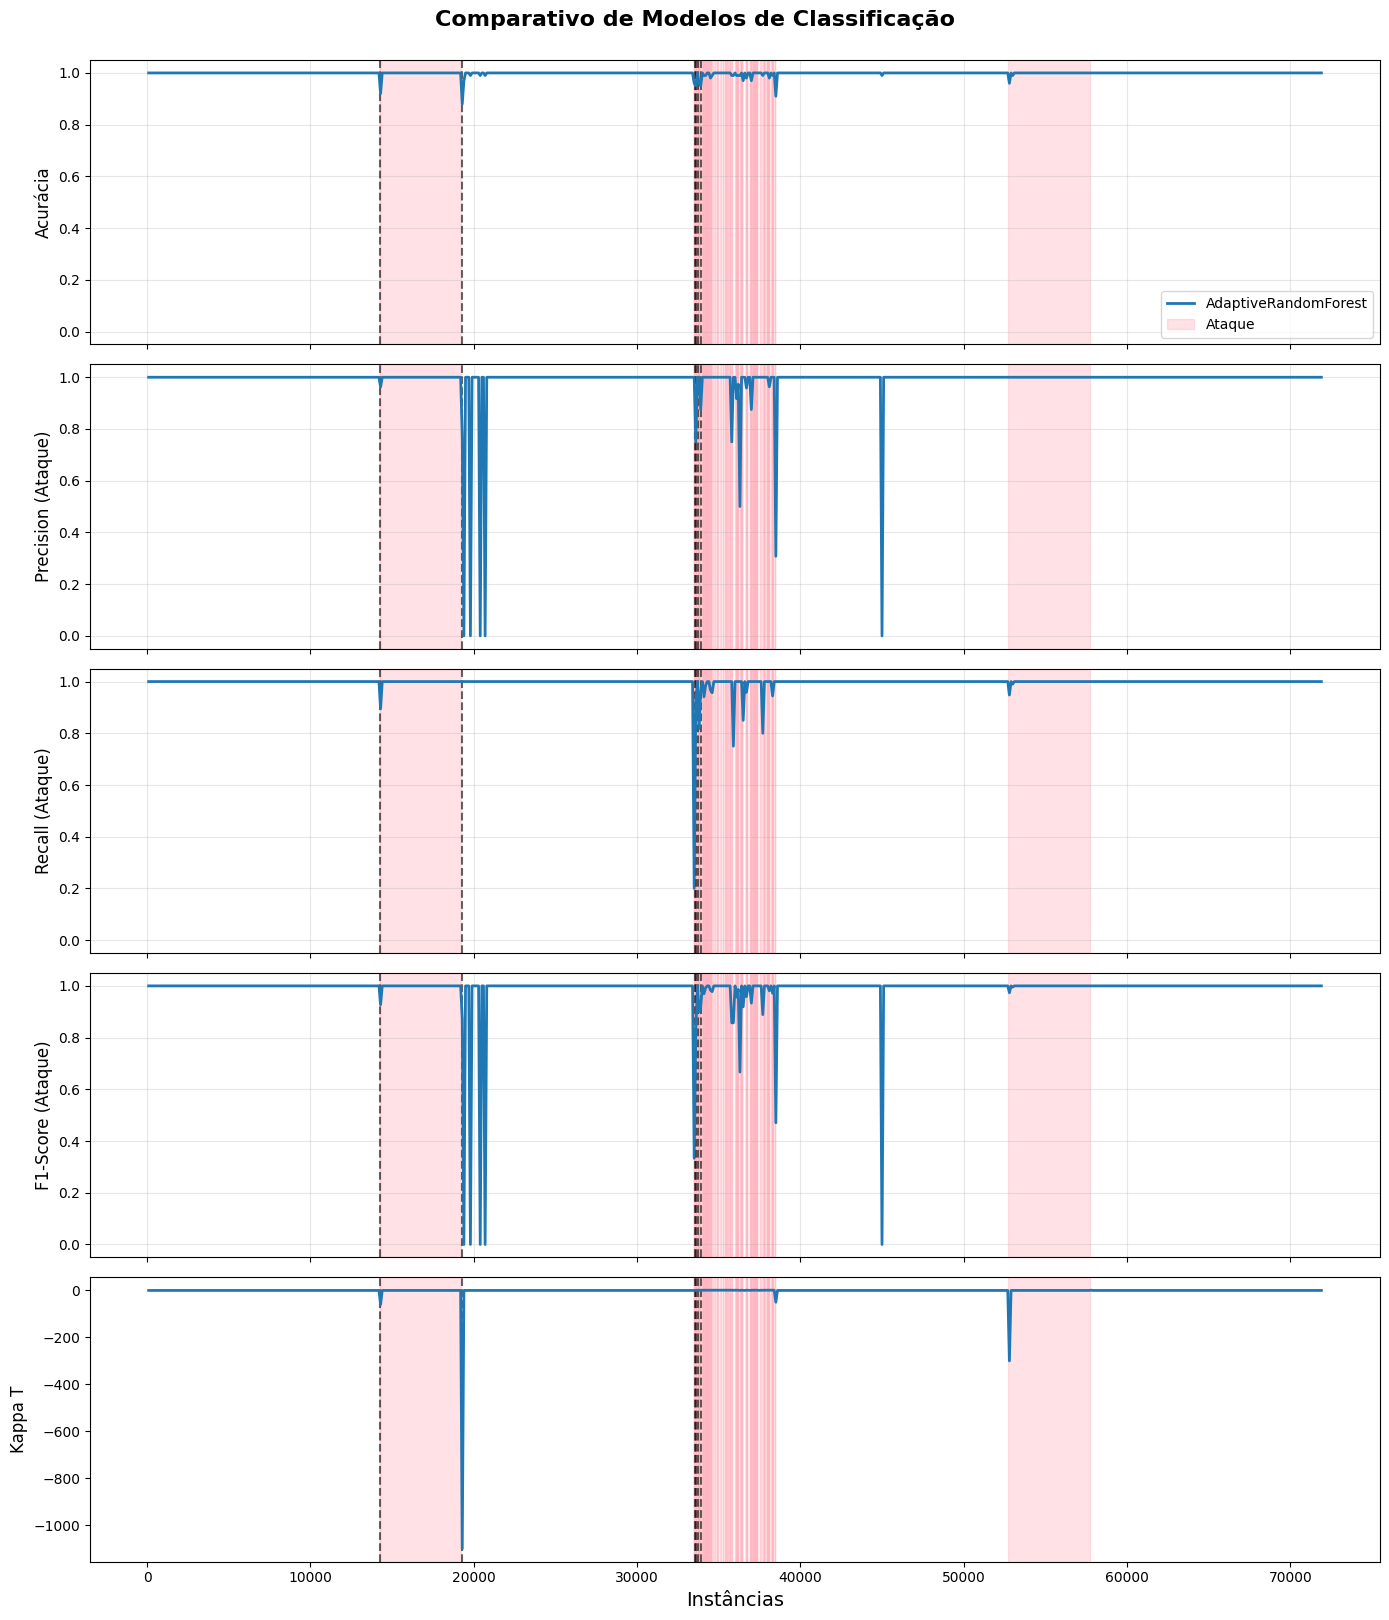

In [5]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['ARF'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Leveraging Bagging


                                    RELATÓRIO FINAL ACUMULATIVO                                     
NOTA: Precision, Recall e F1-Score são calculados para CLASSE ATAQUE (Binary, pos_label=1)
      zero_division=1.0: Em janelas sem ataques e sem erros, métrica = 1.0 (perfeito)
      Kappa T: Kappa Temporal - concordância ponderada por tempo (apenas Kappa T ativo)
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
LeveragingBagging         | 0.9979   | 0.9907   | 0.9954   | 0.9930   | 0.6717
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  61,189 (85.03%)
  - Ataques: 10,776 (14.97%)
  - Razão Benign/Ataque: 5.68:1 



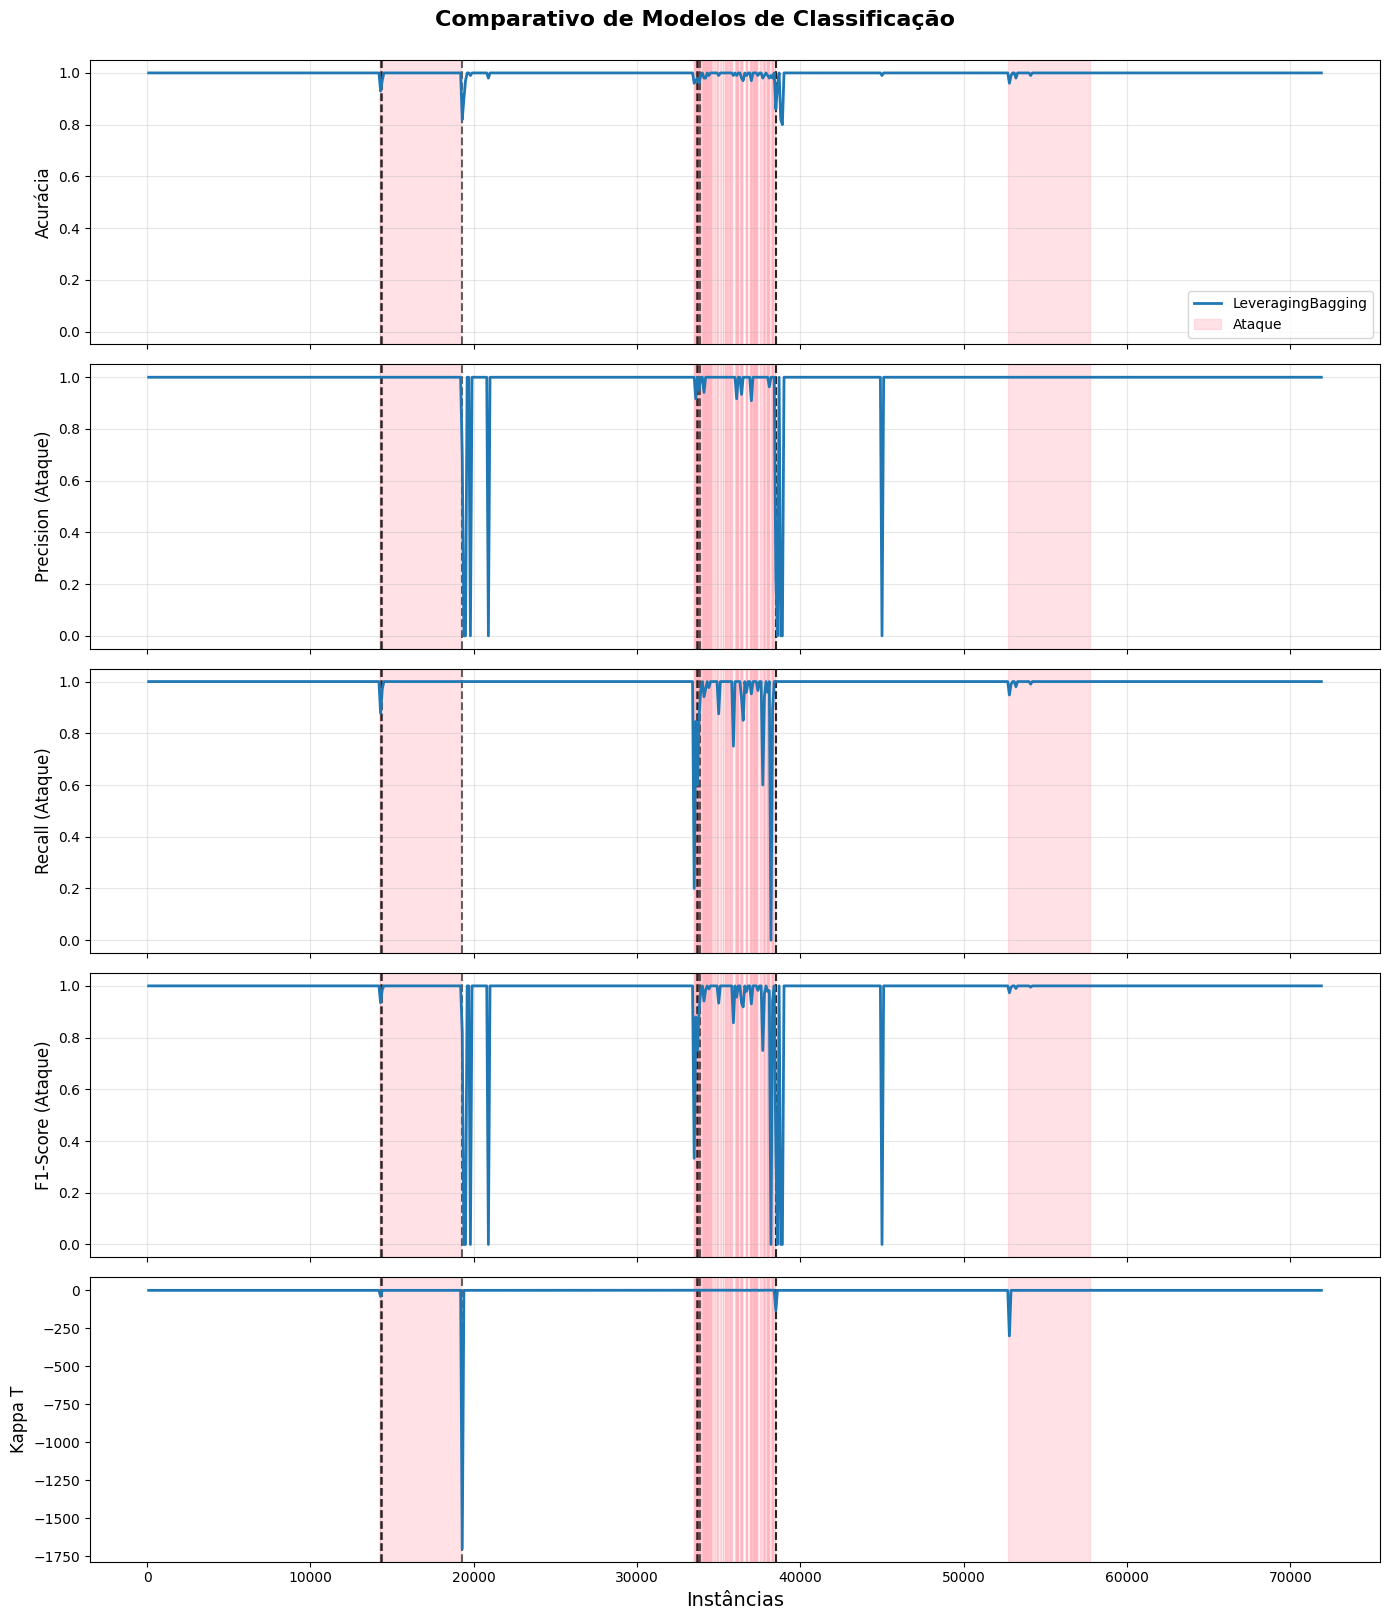

In [6]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['LB'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Hoeffding Adaptive Tree


                                    RELATÓRIO FINAL ACUMULATIVO                                     
NOTA: Precision, Recall e F1-Score são calculados para CLASSE ATAQUE (Binary, pos_label=1)
      zero_division=1.0: Em janelas sem ataques e sem erros, métrica = 1.0 (perfeito)
      Kappa T: Kappa Temporal - concordância ponderada por tempo (apenas Kappa T ativo)
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
HoeffdingAdaptiveTree     | 0.9945   | 0.9813   | 0.9818   | 0.9815   | 0.1348
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  61,189 (85.03%)
  - Ataques: 10,776 (14.97%)
  - Razão Benign/Ataque: 5.68:1 



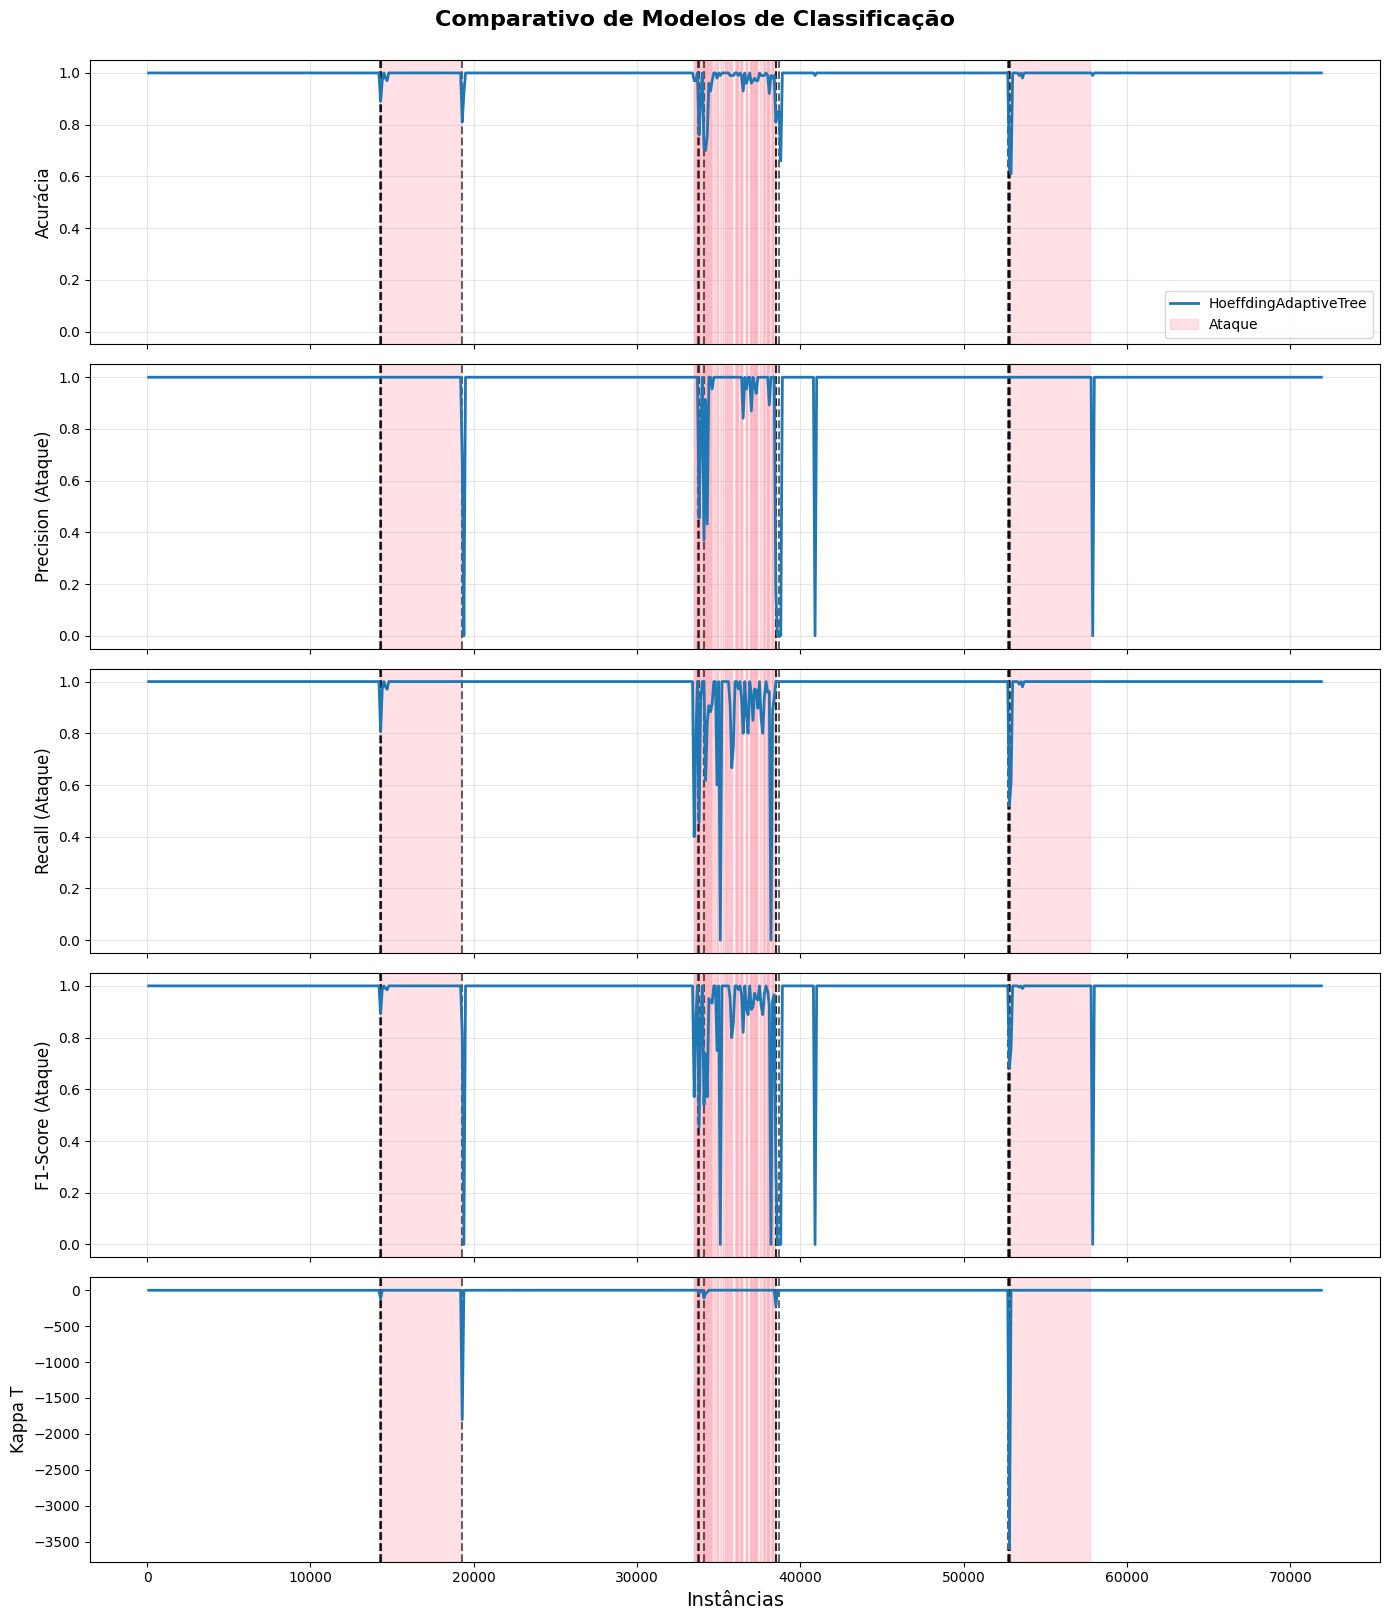

In [7]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['HAT'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Hoeffding Tree


                                    RELATÓRIO FINAL ACUMULATIVO                                     
NOTA: Precision, Recall e F1-Score são calculados para CLASSE ATAQUE (Binary, pos_label=1)
      zero_division=1.0: Em janelas sem ataques e sem erros, métrica = 1.0 (perfeito)
      Kappa T: Kappa Temporal - concordância ponderada por tempo (apenas Kappa T ativo)
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
HoeffdingTree             | 0.9943   | 0.9784   | 0.9835   | 0.9809   | 0.1043
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  61,189 (85.03%)
  - Ataques: 10,776 (14.97%)
  - Razão Benign/Ataque: 5.68:1 



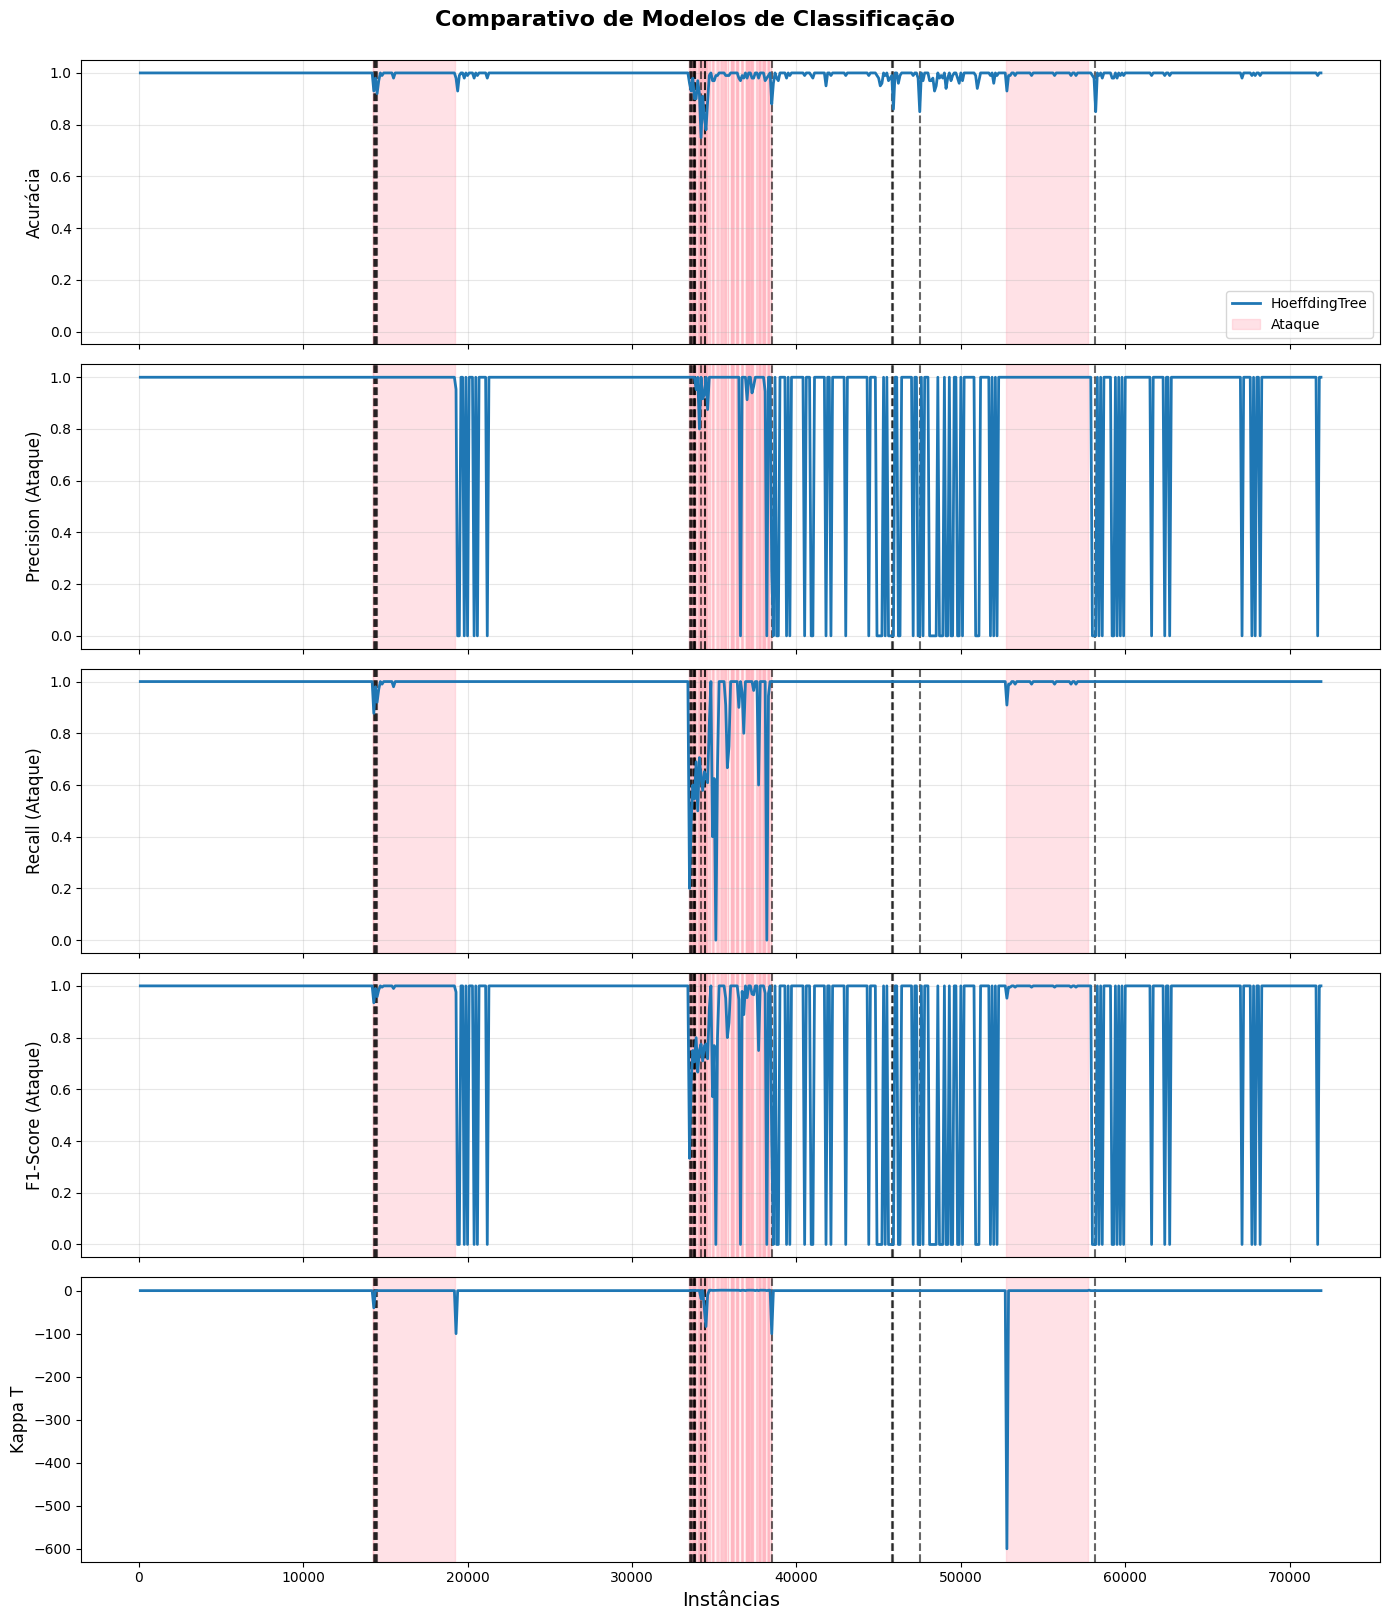

In [8]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['HT'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

### Cenário B

#### Inicialização

In [9]:
from py.ClassificationModels import get_classification_models
from py.ClassificationPipeline import ClassificationExperimentRunner
# from py.streams import newStream
from py.functions import criar_stream
import pandas as pd

INICIO = 0
FIM = 112965
TOTAL_AMOSTRAS = FIM - INICIO
MAX_INSTANCES = TOTAL_AMOSTRAS

df = pd.read_csv(
    'datasets/CICDDoS2019/data/01-12/Classification/CenarioB.csv',
)

# stream, target_names, feature_names = newStream(
#     df=df,
#     target_label_col='Label',  ## coluna de rótulo
#     binary_label=True, # transformar em binário (benigno vs ataque)
#     normalize_method="MinMaxScaler", # pode escoler entre "MinMaxScaler" (features entre 0 e 1), "StandardScaler", "RobustScaler" 
#     threshold_var=0.75, # variança de cada de coluna # os tres reduz a dimensionalidade do dataset (corta colunas com baixa variância, colunas altamente correlacionadas e seleciona as mais importantes)
#     threshold_corr=0.95, # semelhança entre as features
#     top_n_features=15, # random forest importance para selecionar as top n features mais importantes entre 15 e 20
#     stream=True
# ) # essa stream é um gerador que vai entregar os dados em tempo real, ou seja, ele vai entregar os dados em blocos, e a cada bloco ele vai atualizar o modelo e calcular as métricas de desempenho.

stream, target_names, feature_names = criar_stream(
    df=df,
    target_label_col='Label',
    binary_label=True,
    selected_features=None  # ou lista de features específicas
)

# Configurar Stream
schema = stream.get_schema()
# schema é o que vai entrar no modelo, ou seja, as colunas do dataset que vão ser usadas para treinar o modelo. Ele é criado a partir do DataFrame original, mas com as colunas selecionadas e normalizadas.


#### Adaptive Random Forest


                                    RELATÓRIO FINAL ACUMULATIVO                                     
NOTA: Precision, Recall e F1-Score são calculados para CLASSE ATAQUE (Binary, pos_label=1)
      zero_division=1.0: Em janelas sem ataques e sem erros, métrica = 1.0 (perfeito)
      Kappa T: Kappa Temporal - concordância ponderada por tempo (apenas Kappa T ativo)
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
AdaptiveRandomForest      | 0.9986   | 0.9941   | 0.9913   | 0.9927   | 0.8986
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  64,963 (90.27%)
  - Ataques: 7,002 (9.73%)
  - Razão Benign/Ataque: 9.28:1 



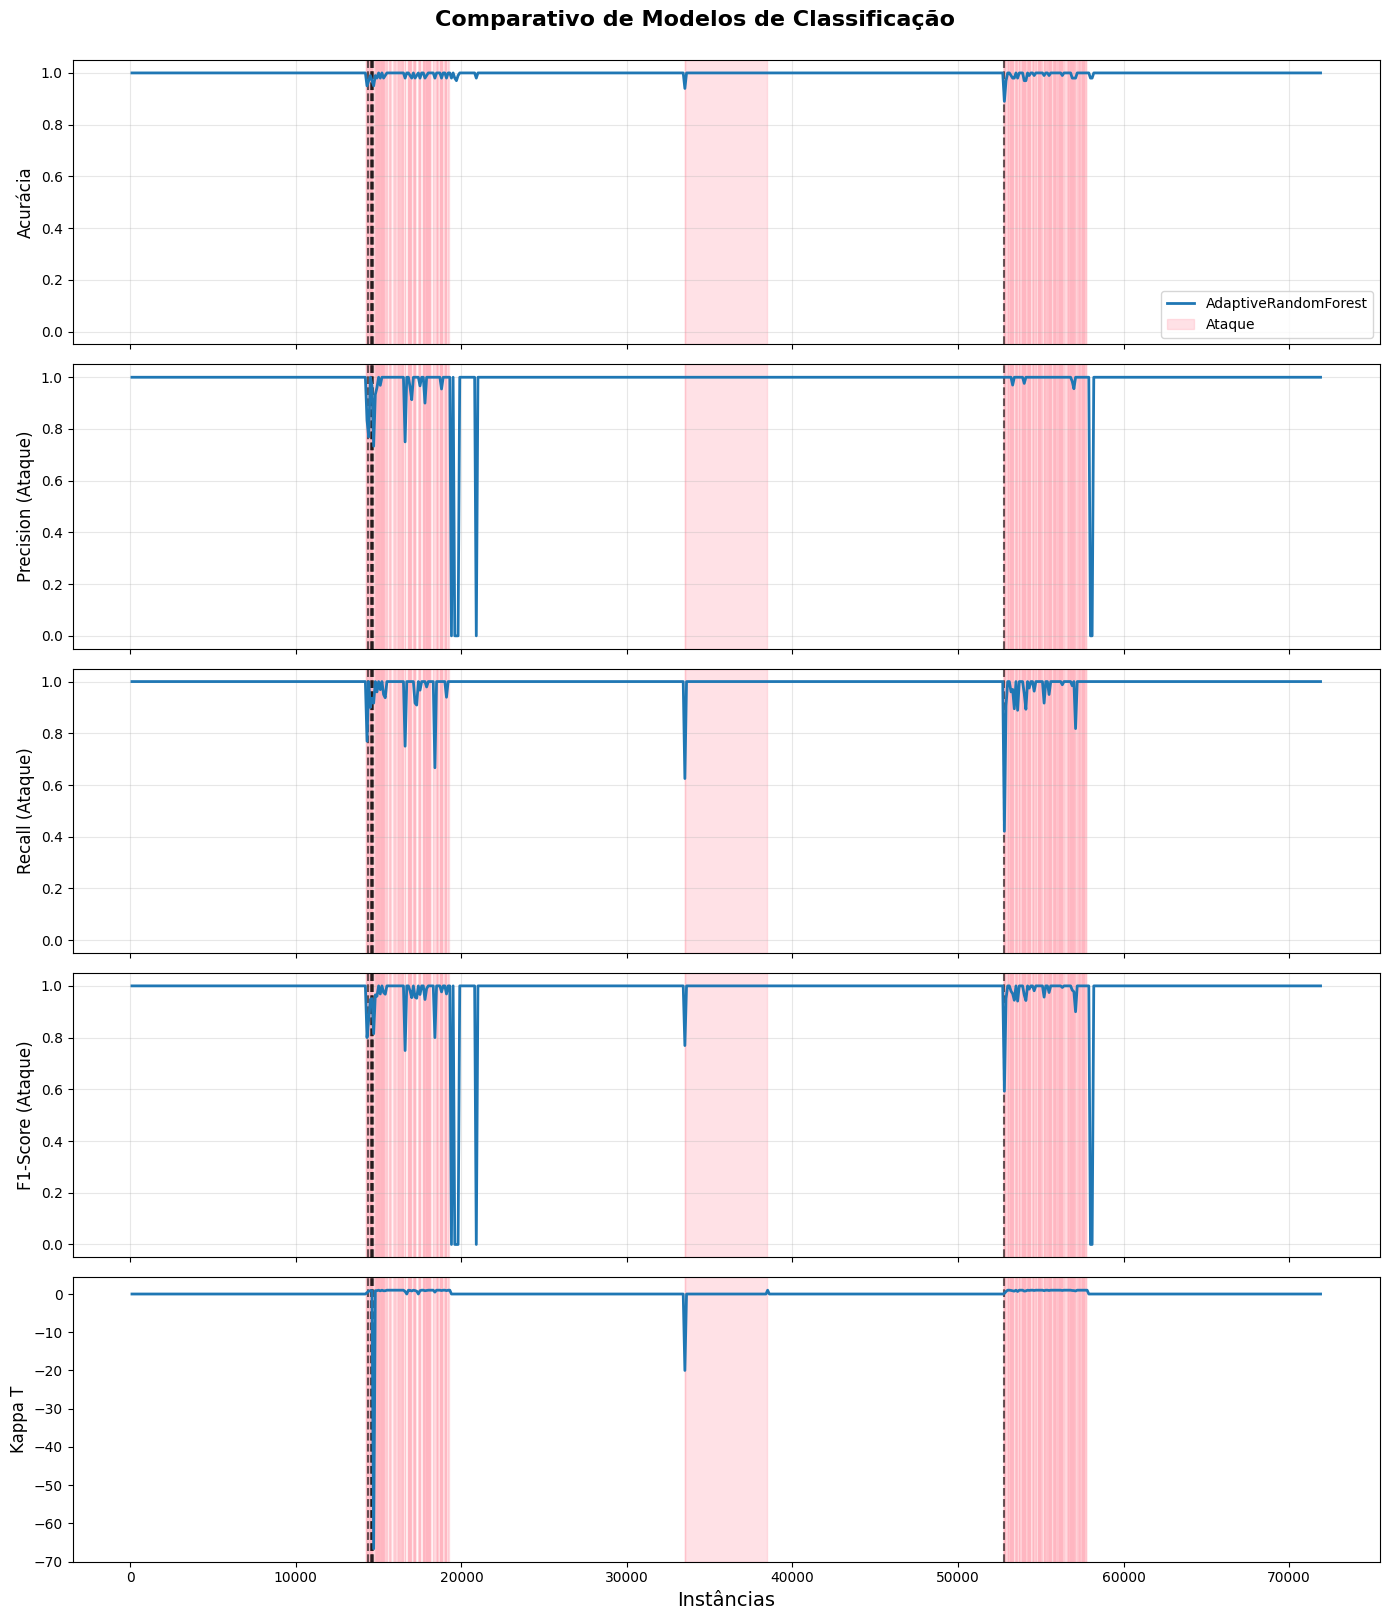

In [10]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['ARF'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Leveraging Bagging


                                    RELATÓRIO FINAL ACUMULATIVO                                     
NOTA: Precision, Recall e F1-Score são calculados para CLASSE ATAQUE (Binary, pos_label=1)
      zero_division=1.0: Em janelas sem ataques e sem erros, métrica = 1.0 (perfeito)
      Kappa T: Kappa Temporal - concordância ponderada por tempo (apenas Kappa T ativo)
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
LeveragingBagging         | 0.9980   | 0.9904   | 0.9887   | 0.9896   | 0.8549
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  64,963 (90.27%)
  - Ataques: 7,002 (9.73%)
  - Razão Benign/Ataque: 9.28:1 



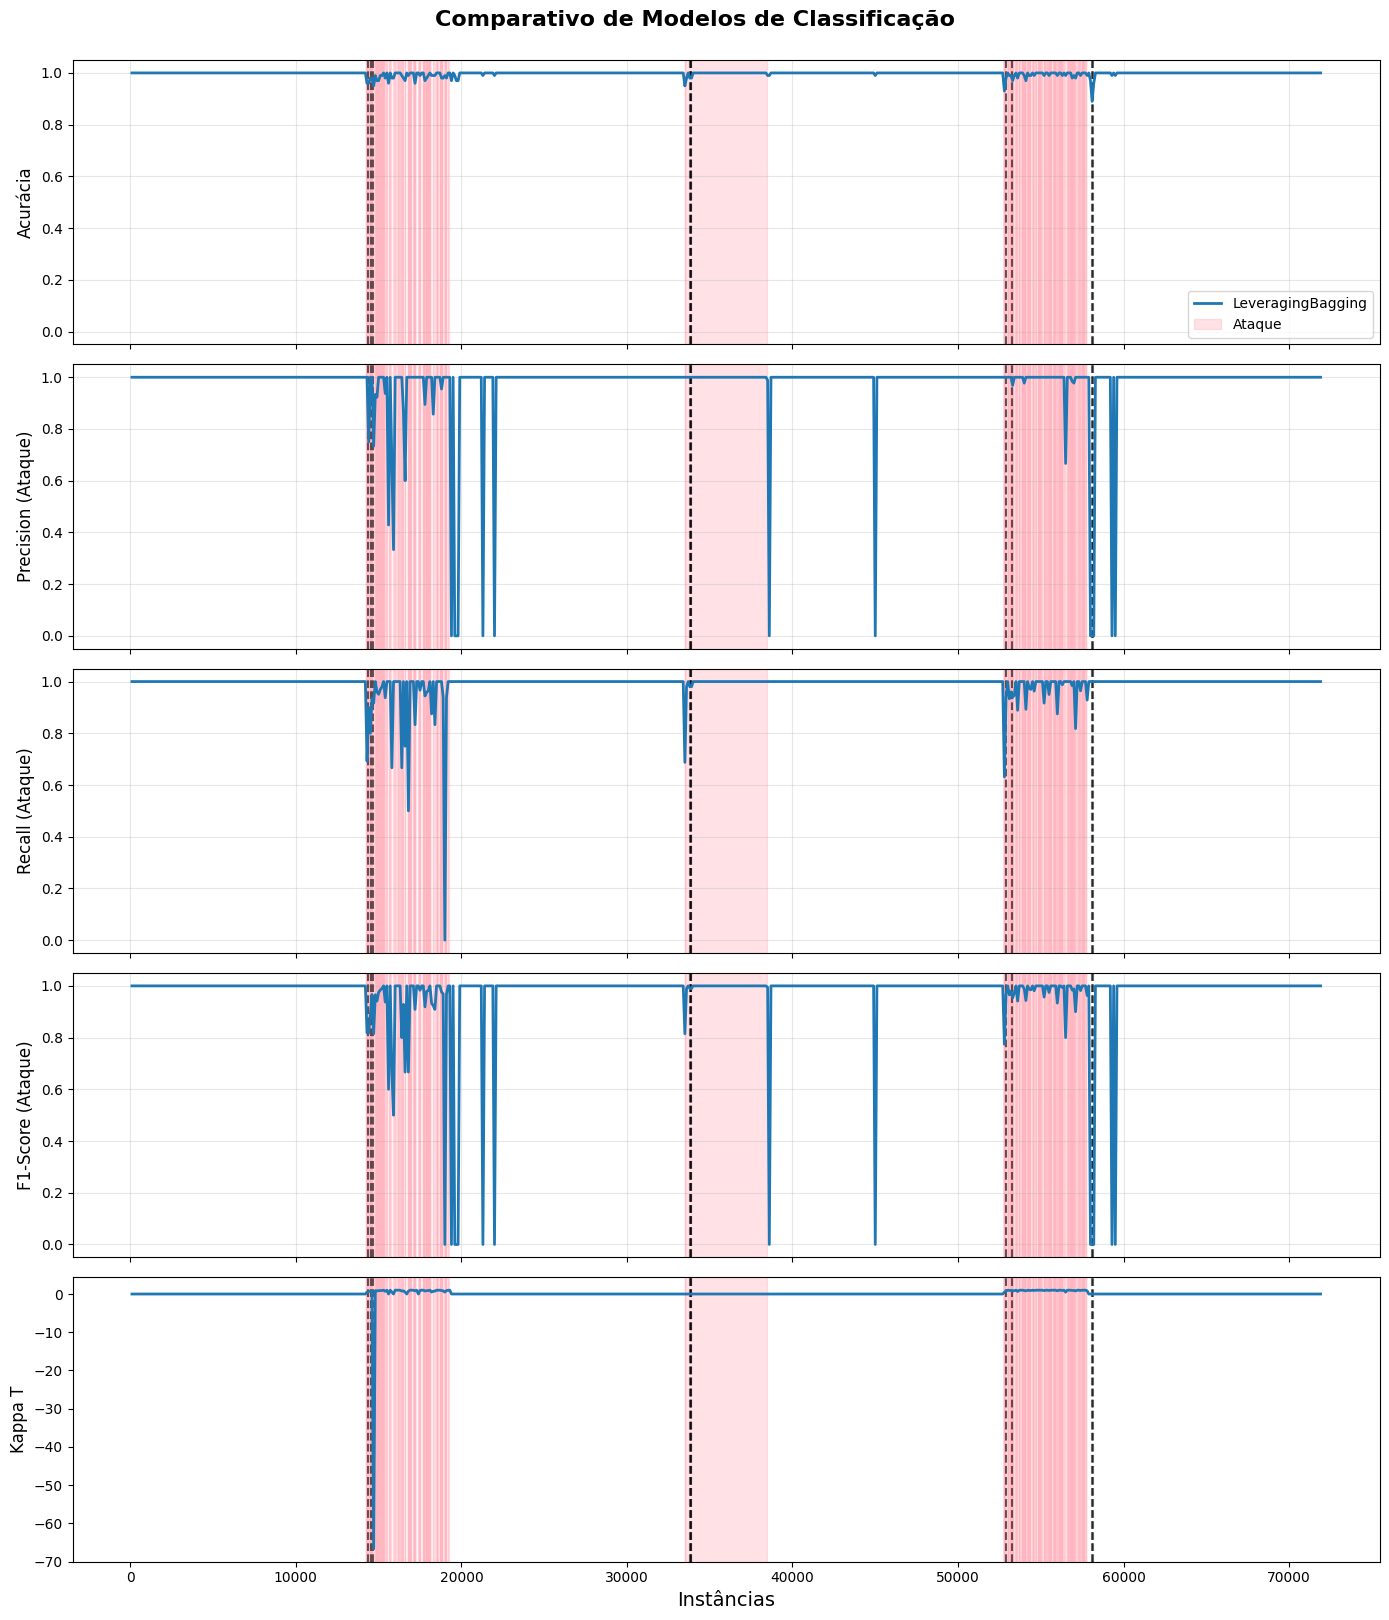

In [11]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['LB'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Hoeffding Adaptive Tree


                                    RELATÓRIO FINAL ACUMULATIVO                                     
NOTA: Precision, Recall e F1-Score são calculados para CLASSE ATAQUE (Binary, pos_label=1)
      zero_division=1.0: Em janelas sem ataques e sem erros, métrica = 1.0 (perfeito)
      Kappa T: Kappa Temporal - concordância ponderada por tempo (apenas Kappa T ativo)
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
HoeffdingAdaptiveTree     | 0.9938   | 0.9656   | 0.9709   | 0.9682   | 0.5567
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  64,963 (90.27%)
  - Ataques: 7,002 (9.73%)
  - Razão Benign/Ataque: 9.28:1 



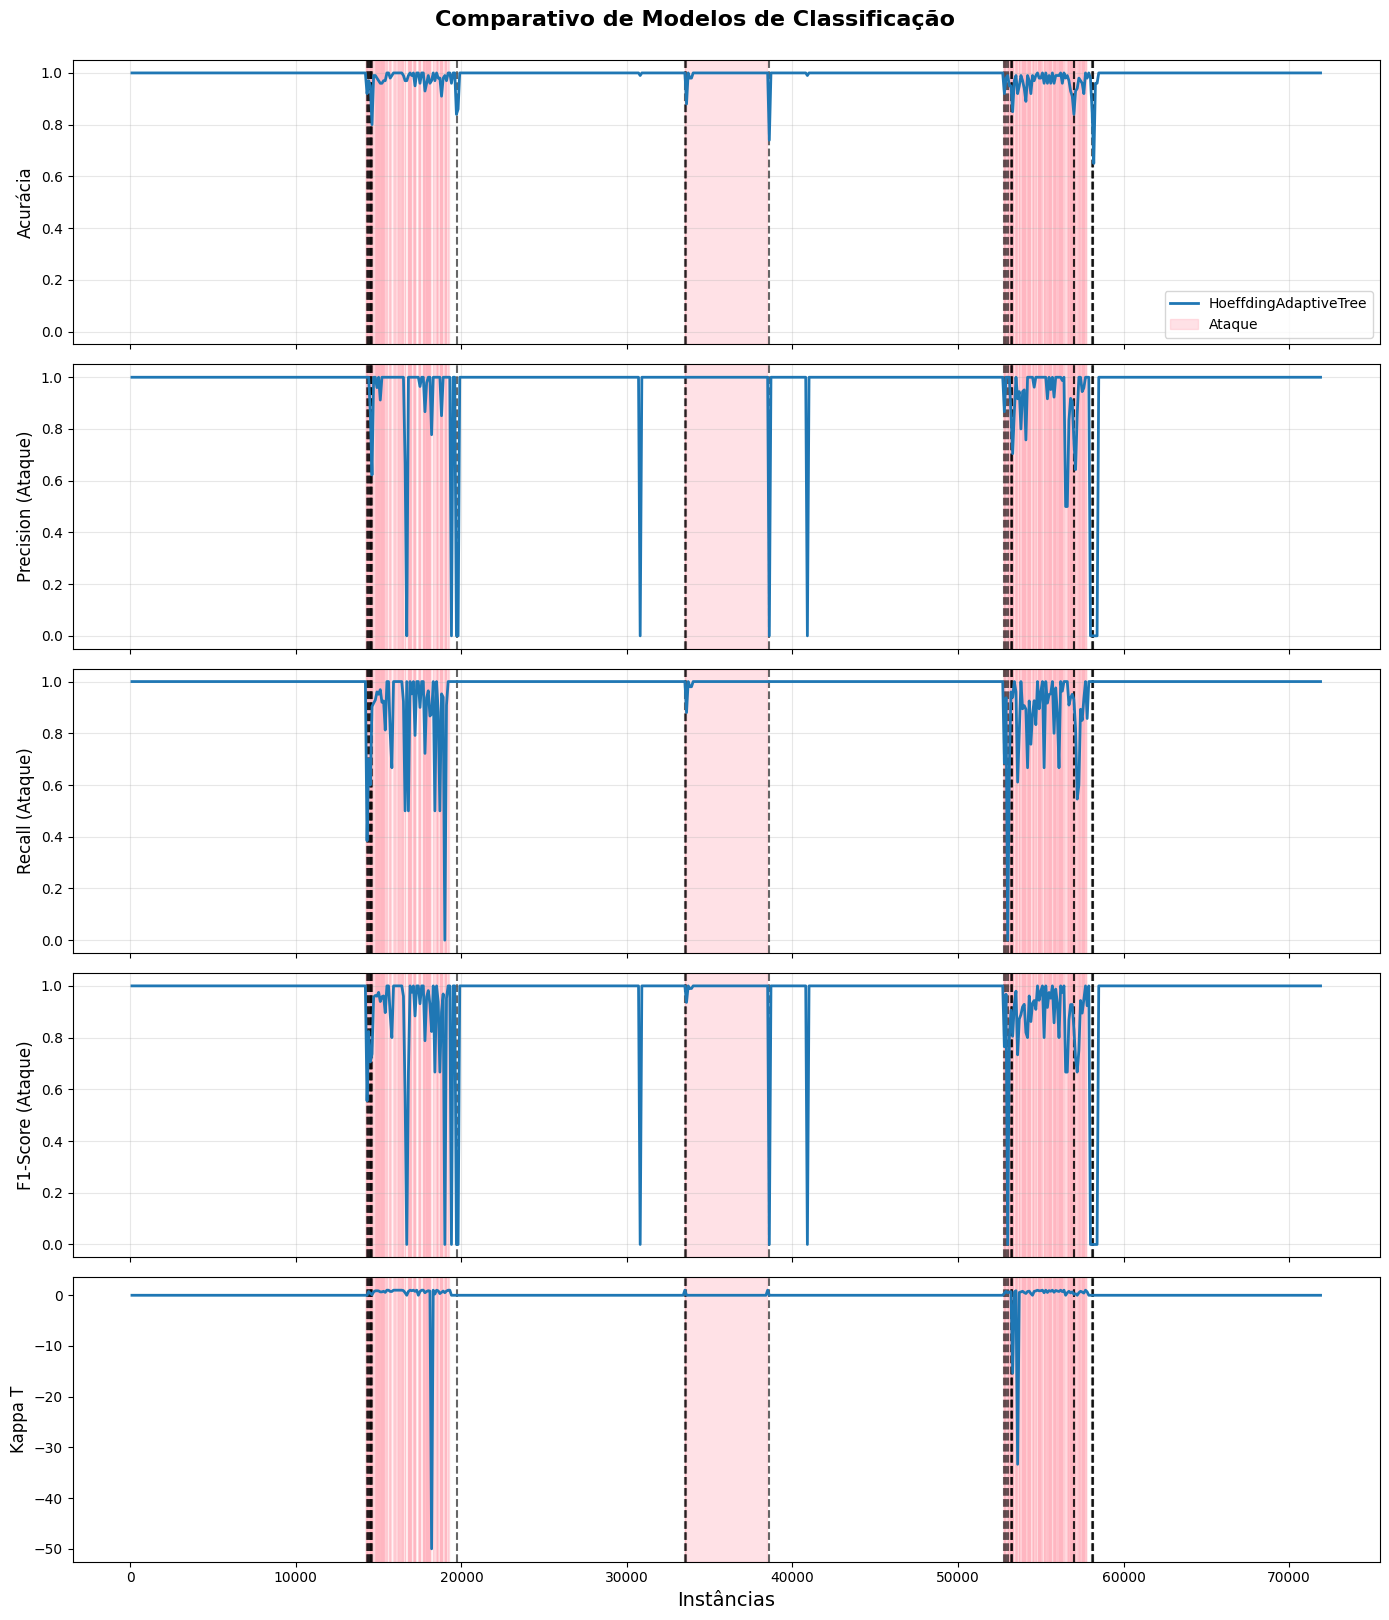

In [12]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['HAT'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Hoeffding Tree


                                    RELATÓRIO FINAL ACUMULATIVO                                     
NOTA: Precision, Recall e F1-Score são calculados para CLASSE ATAQUE (Binary, pos_label=1)
      zero_division=1.0: Em janelas sem ataques e sem erros, métrica = 1.0 (perfeito)
      Kappa T: Kappa Temporal - concordância ponderada por tempo (apenas Kappa T ativo)
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
HoeffdingTree             | 0.9919   | 0.9426   | 0.9757   | 0.9589   | 0.4175
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  64,963 (90.27%)
  - Ataques: 7,002 (9.73%)
  - Razão Benign/Ataque: 9.28:1 



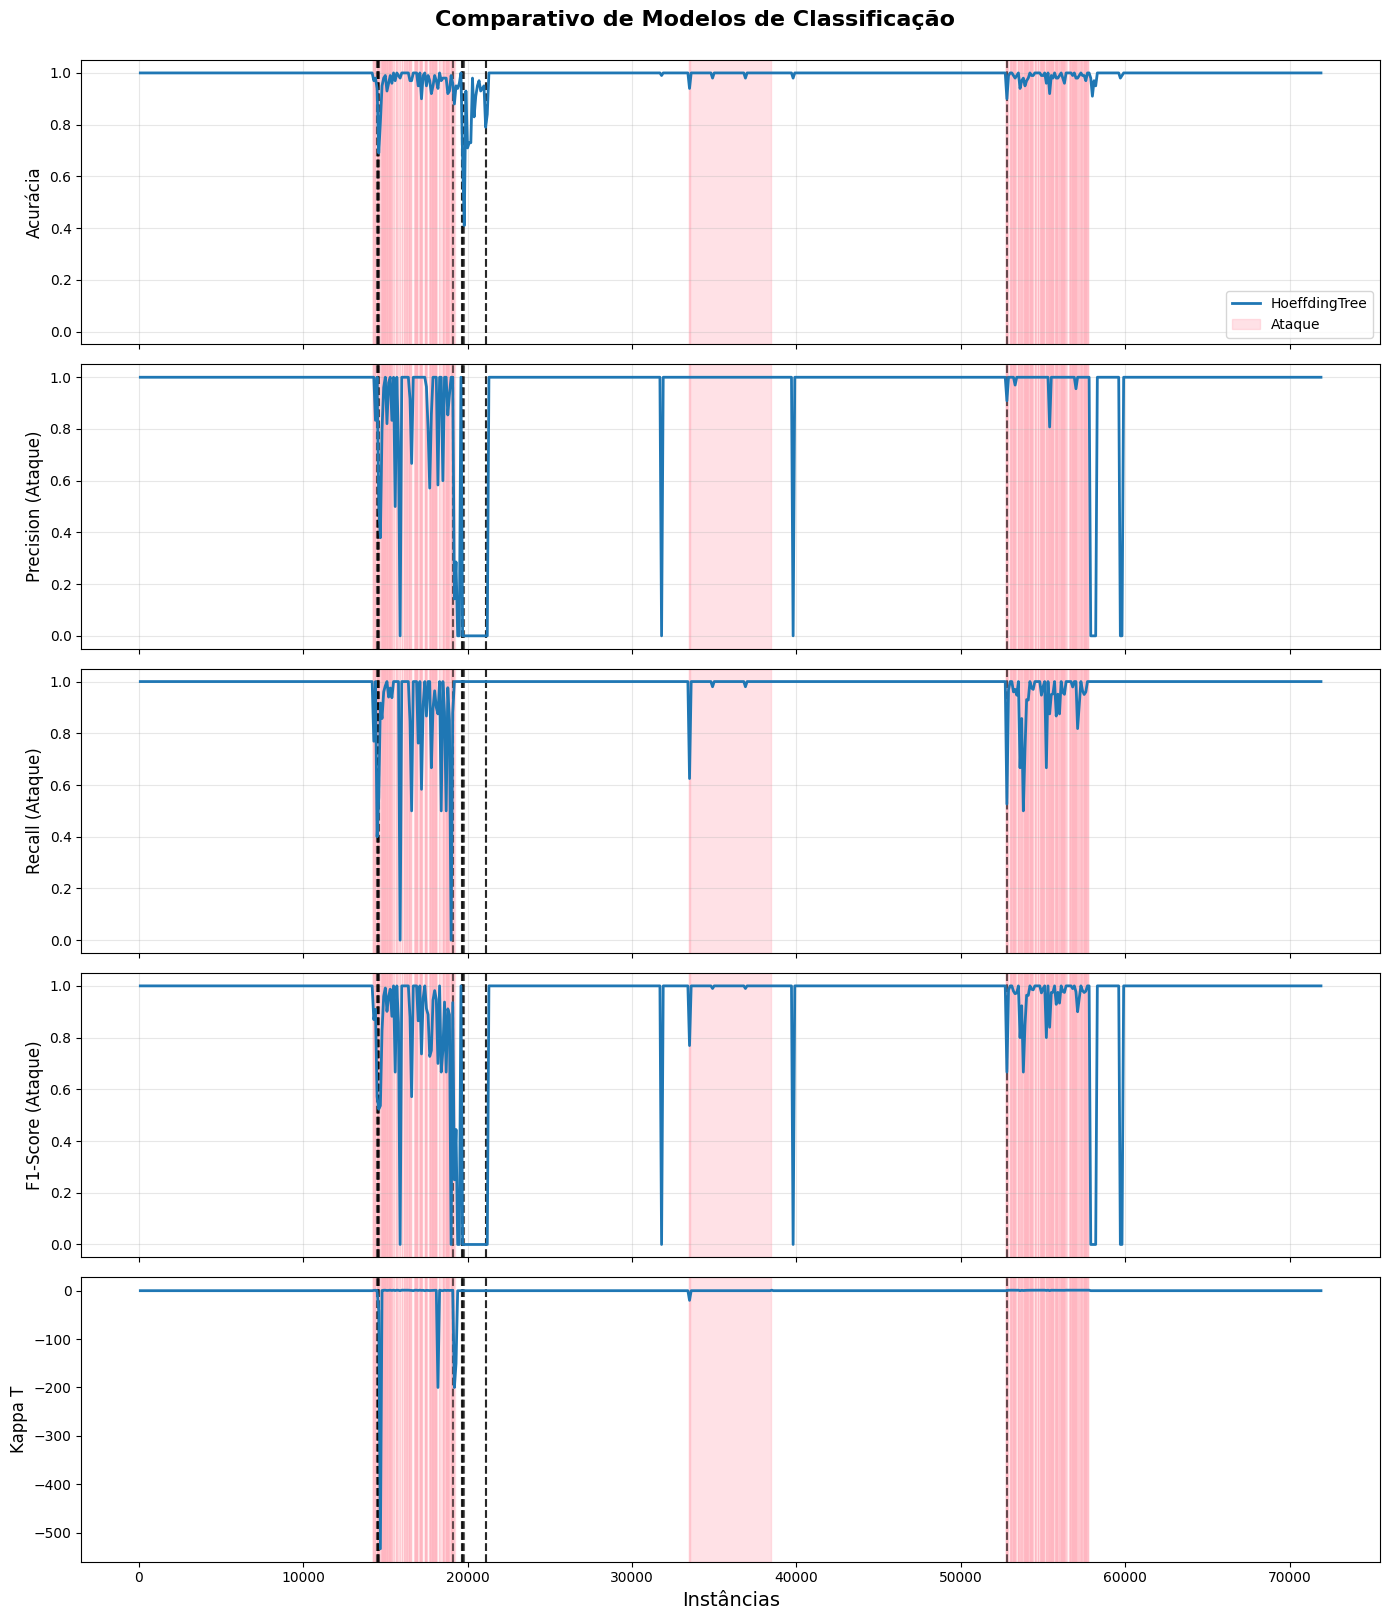

In [13]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['HT'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

## Cenário Generalização 3

- Ataques: SSDP (A) e UDP (B)
    - Ataques com características muito semelhantes.
- Cenários:
    - Cenário D: A -> B -> A
    - Cenário E: A -> A -> B
    - Cenário F: B -> A -> B
- Objetivo: Testar a capacidade de adaptação dos modelos quando encontram sequências de ataques muito parecidos; verificar se encontrar A A antes de B ajuda na adaptação.

### Cenário D

#### Inicialização

In [1]:
from py.ClassificationModels import get_classification_models
from py.ClassificationPipeline import ClassificationExperimentRunner
# from py.streams import newStream
from py.functions import criar_stream
import pandas as pd

INICIO = 0
FIM = 112965
TOTAL_AMOSTRAS = FIM - INICIO
MAX_INSTANCES = TOTAL_AMOSTRAS

df = pd.read_csv(
    'datasets/CICDDoS2019/data/01-12/Classification/CenarioD.csv',
)

# stream, target_names, feature_names = newStream(
#     df=df,
#     target_label_col='Label',  ## coluna de rótulo
#     binary_label=True, # transformar em binário (benigno vs ataque)
#     normalize_method="MinMaxScaler", # pode escoler entre "MinMaxScaler" (features entre 0 e 1), "StandardScaler", "RobustScaler" 
#     threshold_var=0.75, # variança de cada de coluna # os tres reduz a dimensionalidade do dataset (corta colunas com baixa variância, colunas altamente correlacionadas e seleciona as mais importantes)
#     threshold_corr=0.95, # semelhança entre as features
#     top_n_features=15, # random forest importance para selecionar as top n features mais importantes entre 15 e 20
#     stream=True
# ) # essa stream é um gerador que vai entregar os dados em tempo real, ou seja, ele vai entregar os dados em blocos, e a cada bloco ele vai atualizar o modelo e calcular as métricas de desempenho.

stream, target_names, feature_names = criar_stream(
    df=df,
    target_label_col='Label',
    binary_label=True,
    selected_features=None  # ou lista de features específicas
)

# Configurar Stream
schema = stream.get_schema()
# schema é o que vai entrar no modelo, ou seja, as colunas do dataset que vão ser usadas para treinar o modelo. Ele é criado a partir do DataFrame original, mas com as colunas selecionadas e normalizadas.


#### Adaptive Random Forest


                                    RELATÓRIO FINAL ACUMULATIVO                                     
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
AdaptiveRandomForest      | 0.9995   | 0.9984   | 0.9993   | 0.9988   | 0.6196
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  57,014 (79.22%)
  - Ataques: 14,951 (20.78%)
  - Razão Benign/Ataque: 3.81:1 



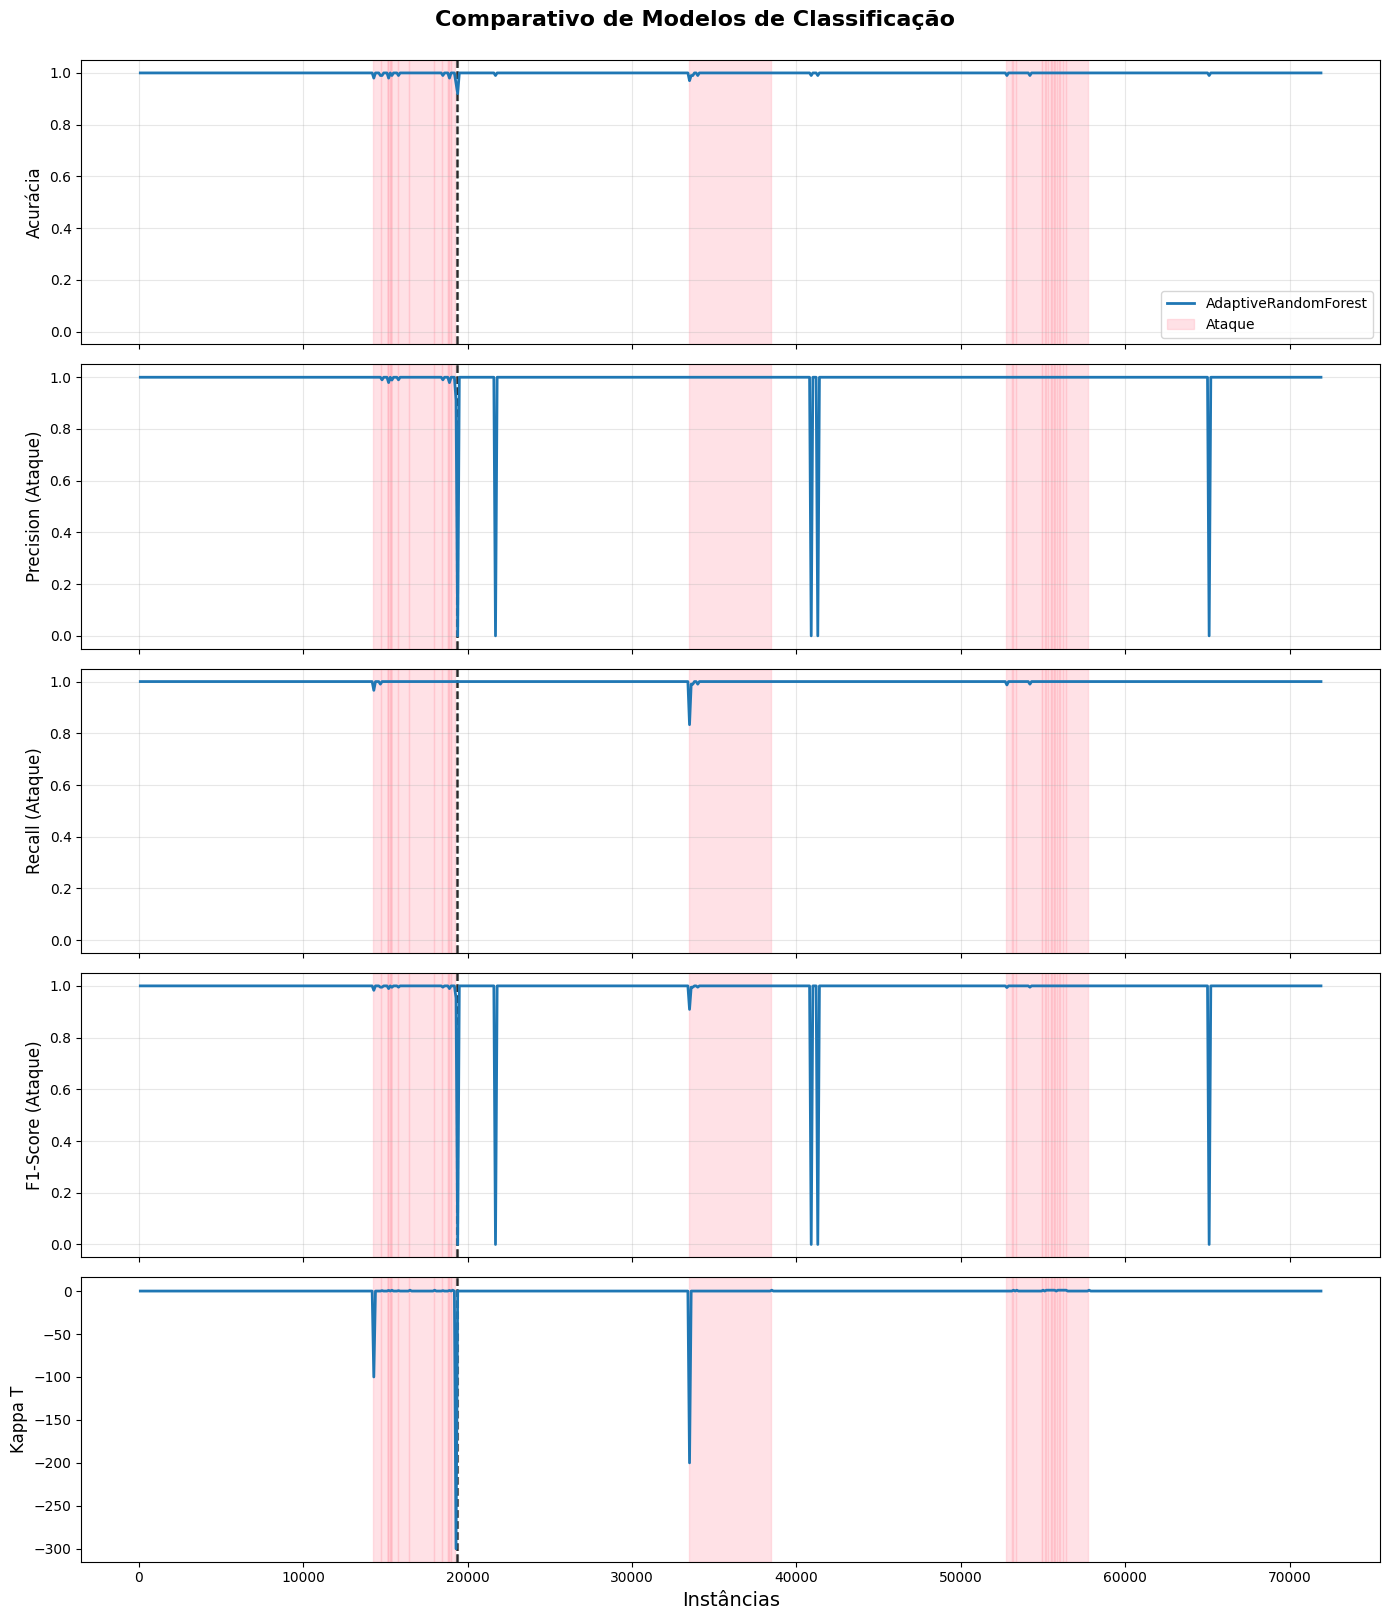

In [2]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['ARF'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Leveraging Bagging


                                    RELATÓRIO FINAL ACUMULATIVO                                     
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
LeveragingBagging         | 0.9992   | 0.9975   | 0.9986   | 0.9981   | 0.3696
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  57,014 (79.22%)
  - Ataques: 14,951 (20.78%)
  - Razão Benign/Ataque: 3.81:1 



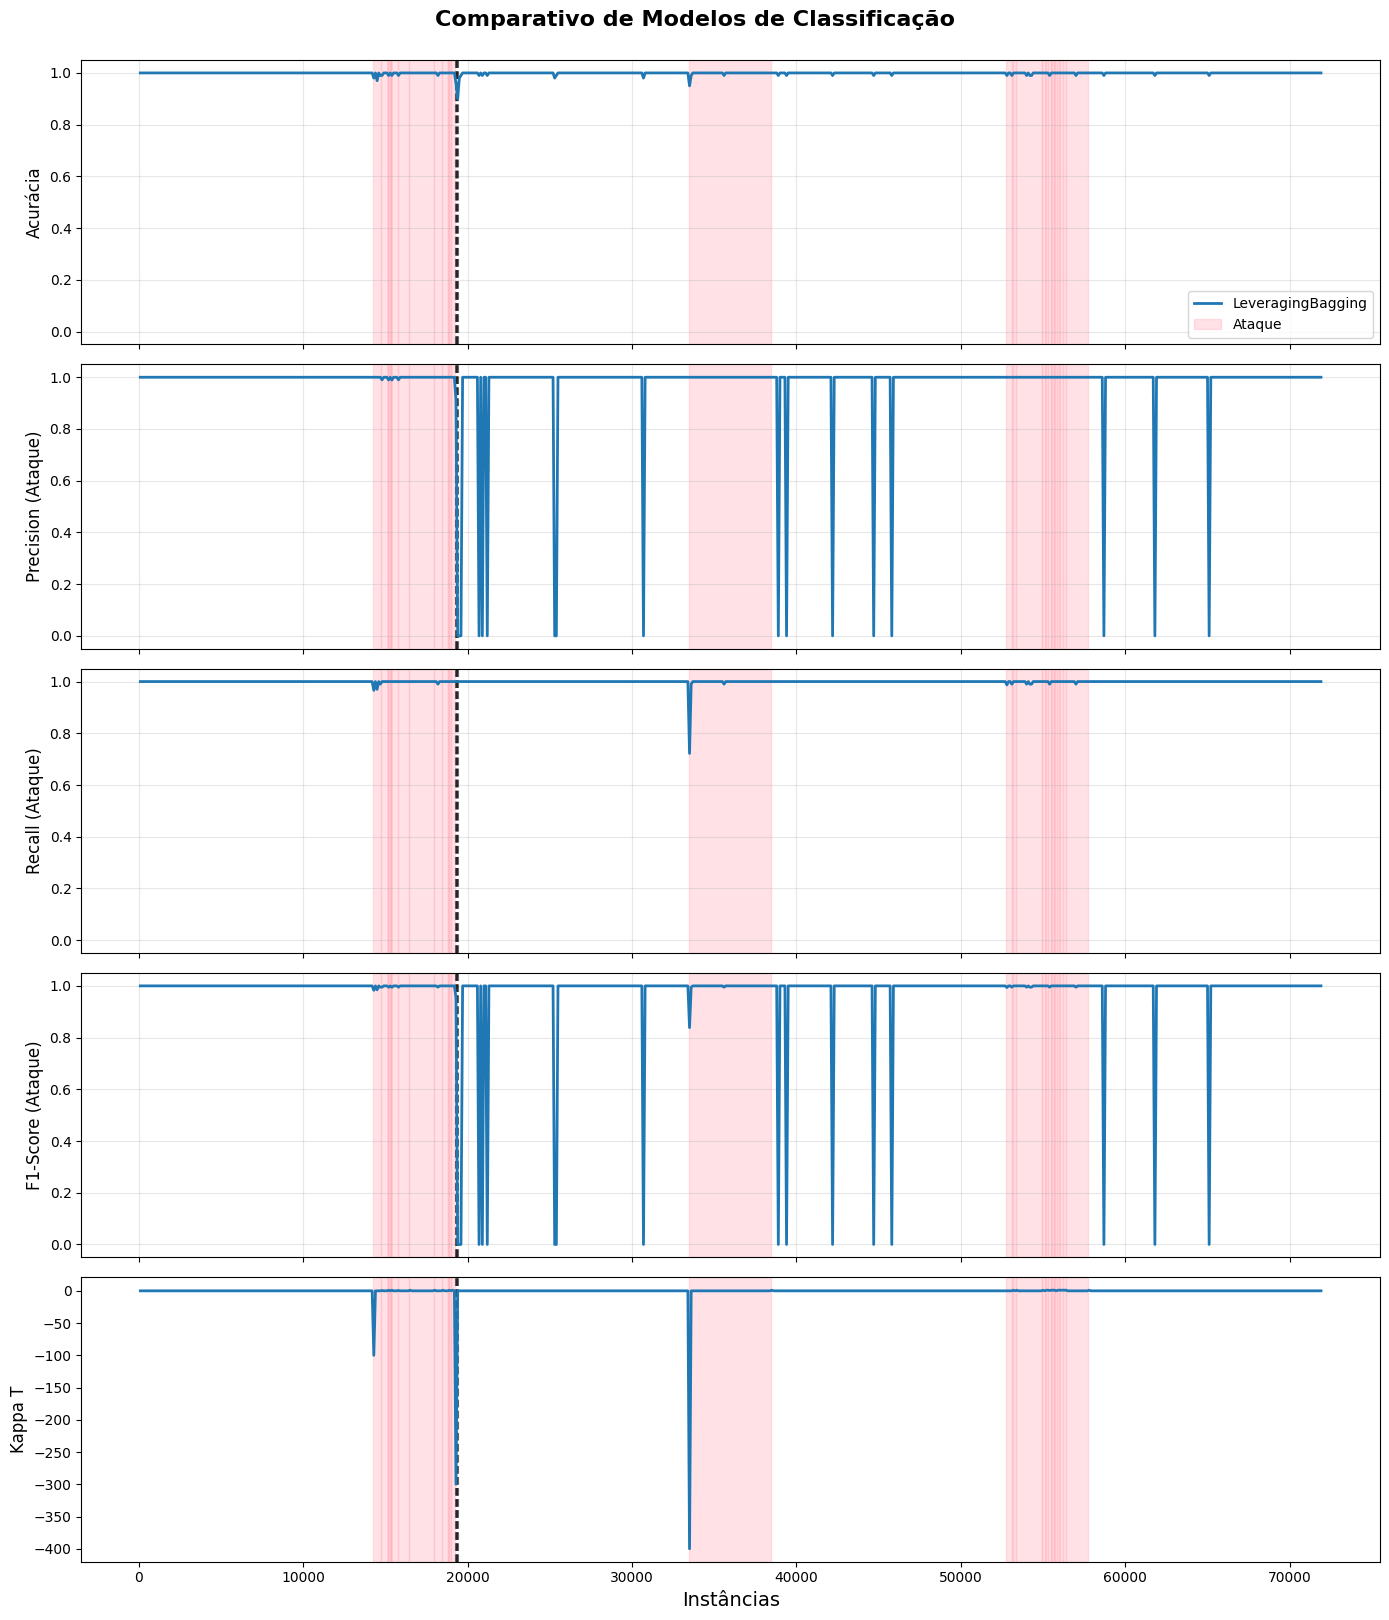

In [3]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['LB'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Hoeffding Adaptive Tree


                                    RELATÓRIO FINAL ACUMULATIVO                                     
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
HoeffdingAdaptiveTree     | 0.9991   | 0.9983   | 0.9973   | 0.9978   | 0.2935
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  57,014 (79.22%)
  - Ataques: 14,951 (20.78%)
  - Razão Benign/Ataque: 3.81:1 



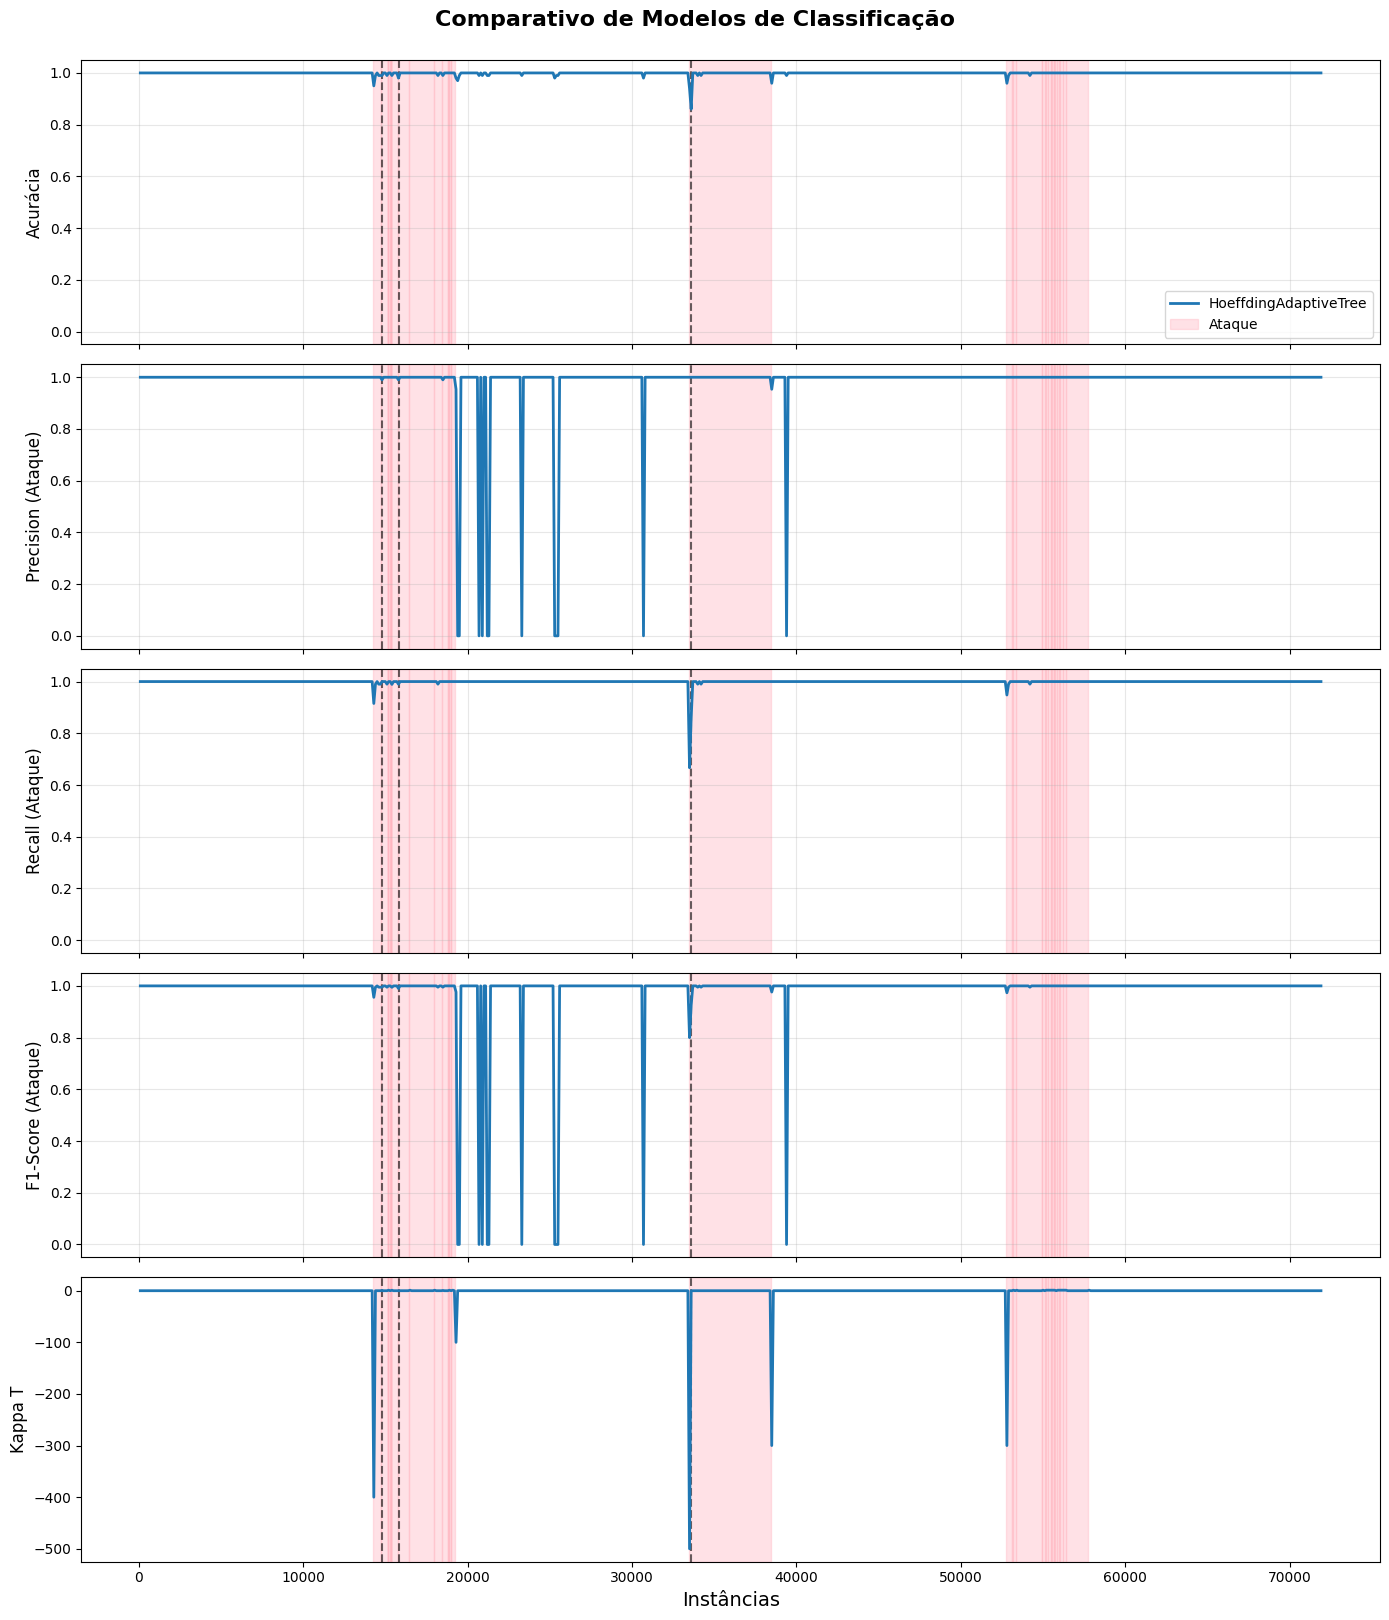

In [4]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['HAT'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Hoeffding Tree


                                    RELATÓRIO FINAL ACUMULATIVO                                     
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
HoeffdingTree             | 0.9990   | 0.9982   | 0.9971   | 0.9976   | 0.2283
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  57,014 (79.22%)
  - Ataques: 14,951 (20.78%)
  - Razão Benign/Ataque: 3.81:1 



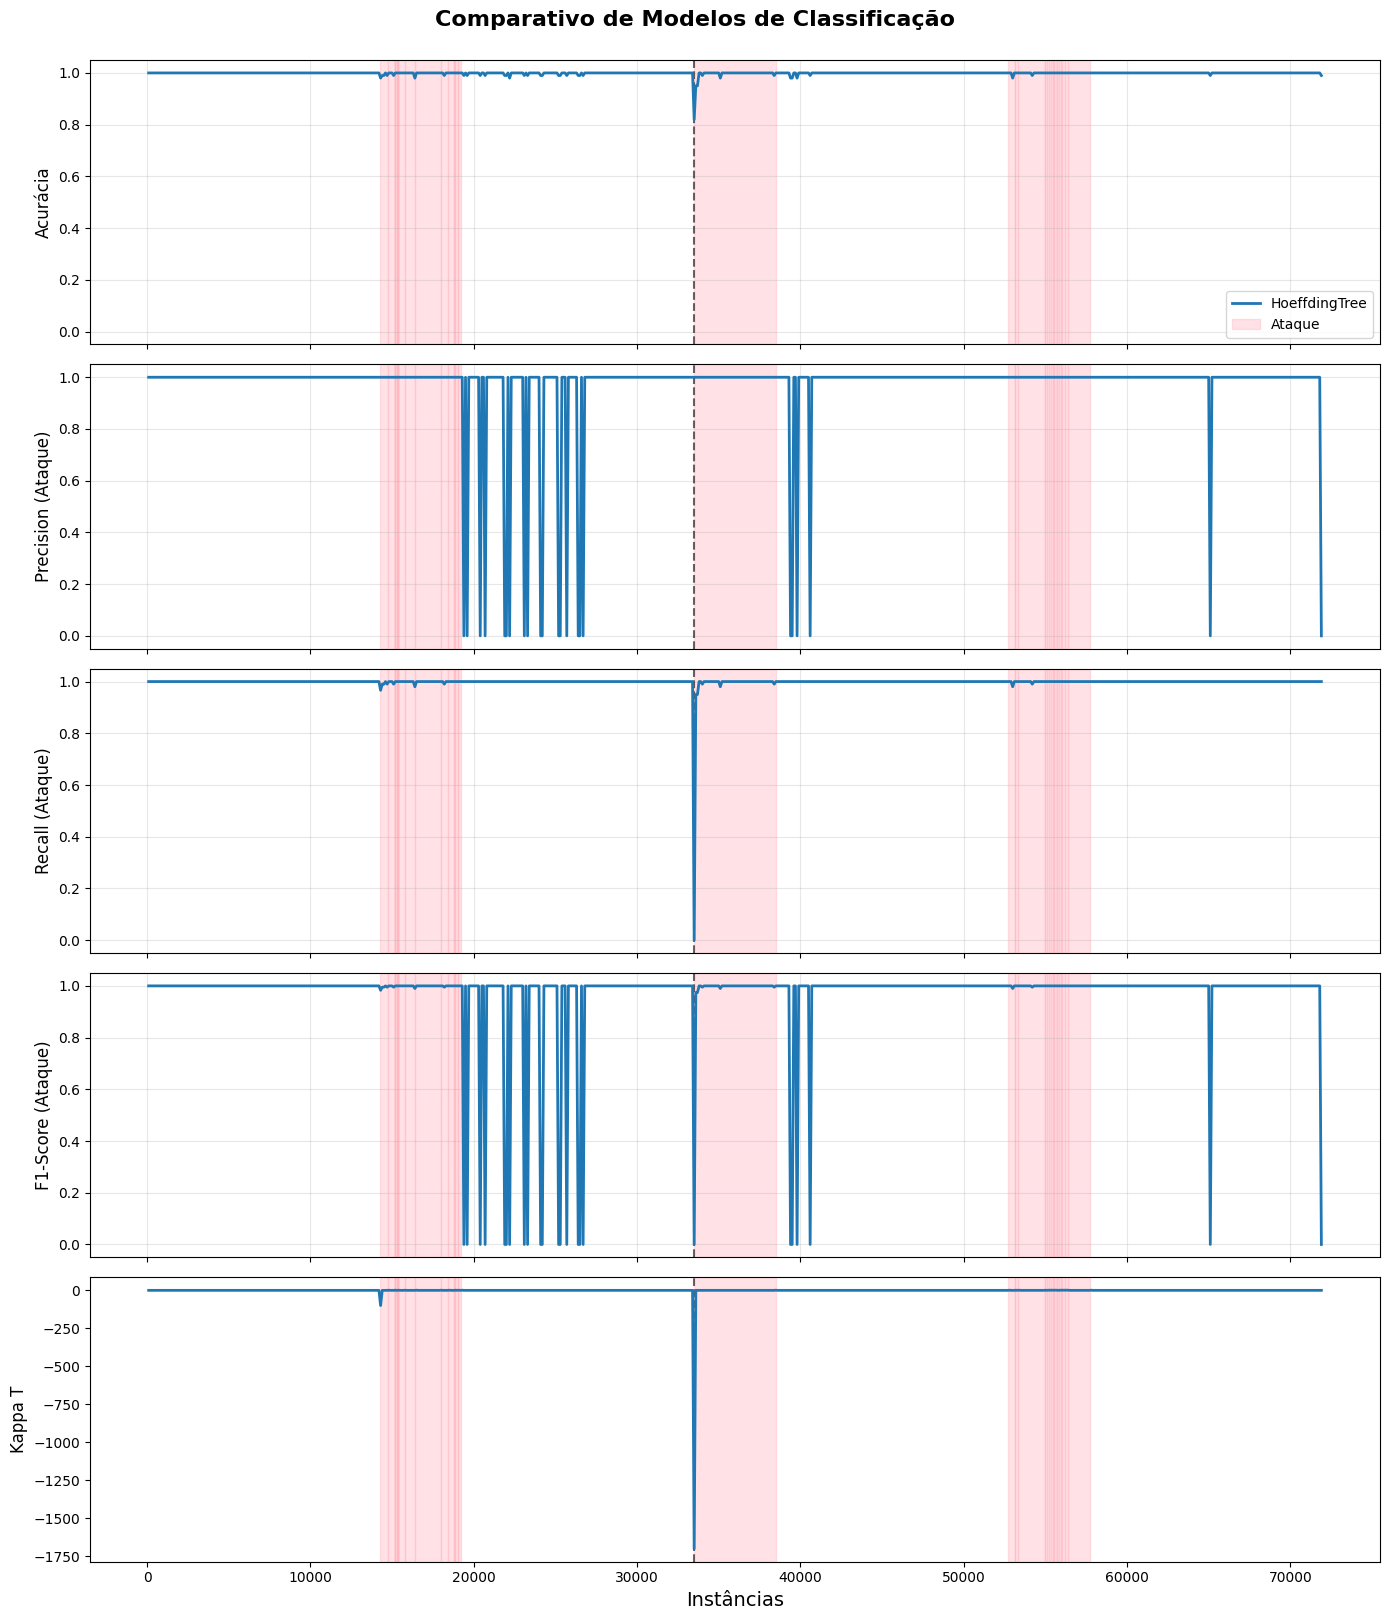

In [5]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['HT'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

### Cenário E

#### Inicialização

In [6]:
from py.ClassificationModels import get_classification_models
from py.ClassificationPipeline import ClassificationExperimentRunner
# from py.streams import newStream
from py.functions import criar_stream
import pandas as pd

INICIO = 0
FIM = 112965
TOTAL_AMOSTRAS = FIM - INICIO
MAX_INSTANCES = TOTAL_AMOSTRAS

df = pd.read_csv(
    'datasets/CICDDoS2019/data/01-12/Classification/CenarioE.csv',
)

# stream, target_names, feature_names = newStream(
#     df=df,
#     target_label_col='Label',  ## coluna de rótulo
#     binary_label=True, # transformar em binário (benigno vs ataque)
#     normalize_method="MinMaxScaler", # pode escoler entre "MinMaxScaler" (features entre 0 e 1), "StandardScaler", "RobustScaler" 
#     threshold_var=0.75, # variança de cada de coluna # os tres reduz a dimensionalidade do dataset (corta colunas com baixa variância, colunas altamente correlacionadas e seleciona as mais importantes)
#     threshold_corr=0.95, # semelhança entre as features
#     top_n_features=15, # random forest importance para selecionar as top n features mais importantes entre 15 e 20
#     stream=True
# ) # essa stream é um gerador que vai entregar os dados em tempo real, ou seja, ele vai entregar os dados em blocos, e a cada bloco ele vai atualizar o modelo e calcular as métricas de desempenho.

stream, target_names, feature_names = criar_stream(
    df=df,
    target_label_col='Label',
    binary_label=True,
    selected_features=None  # ou lista de features específicas
)

# Configurar Stream
schema = stream.get_schema()
# schema é o que vai entrar no modelo, ou seja, as colunas do dataset que vão ser usadas para treinar o modelo. Ele é criado a partir do DataFrame original, mas com as colunas selecionadas e normalizadas.


#### Adaptive Random Forest


                                    RELATÓRIO FINAL ACUMULATIVO                                     
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
AdaptiveRandomForest      | 0.9996   | 0.9985   | 0.9996   | 0.9990   | 0.6848
                            Muitos FALSOS POSITIVOS: FP=23 vs FN=6
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  57,014 (79.22%)
  - Ataques: 14,951 (20.78%)
  - Razão Benign/Ataque: 3.81:1 



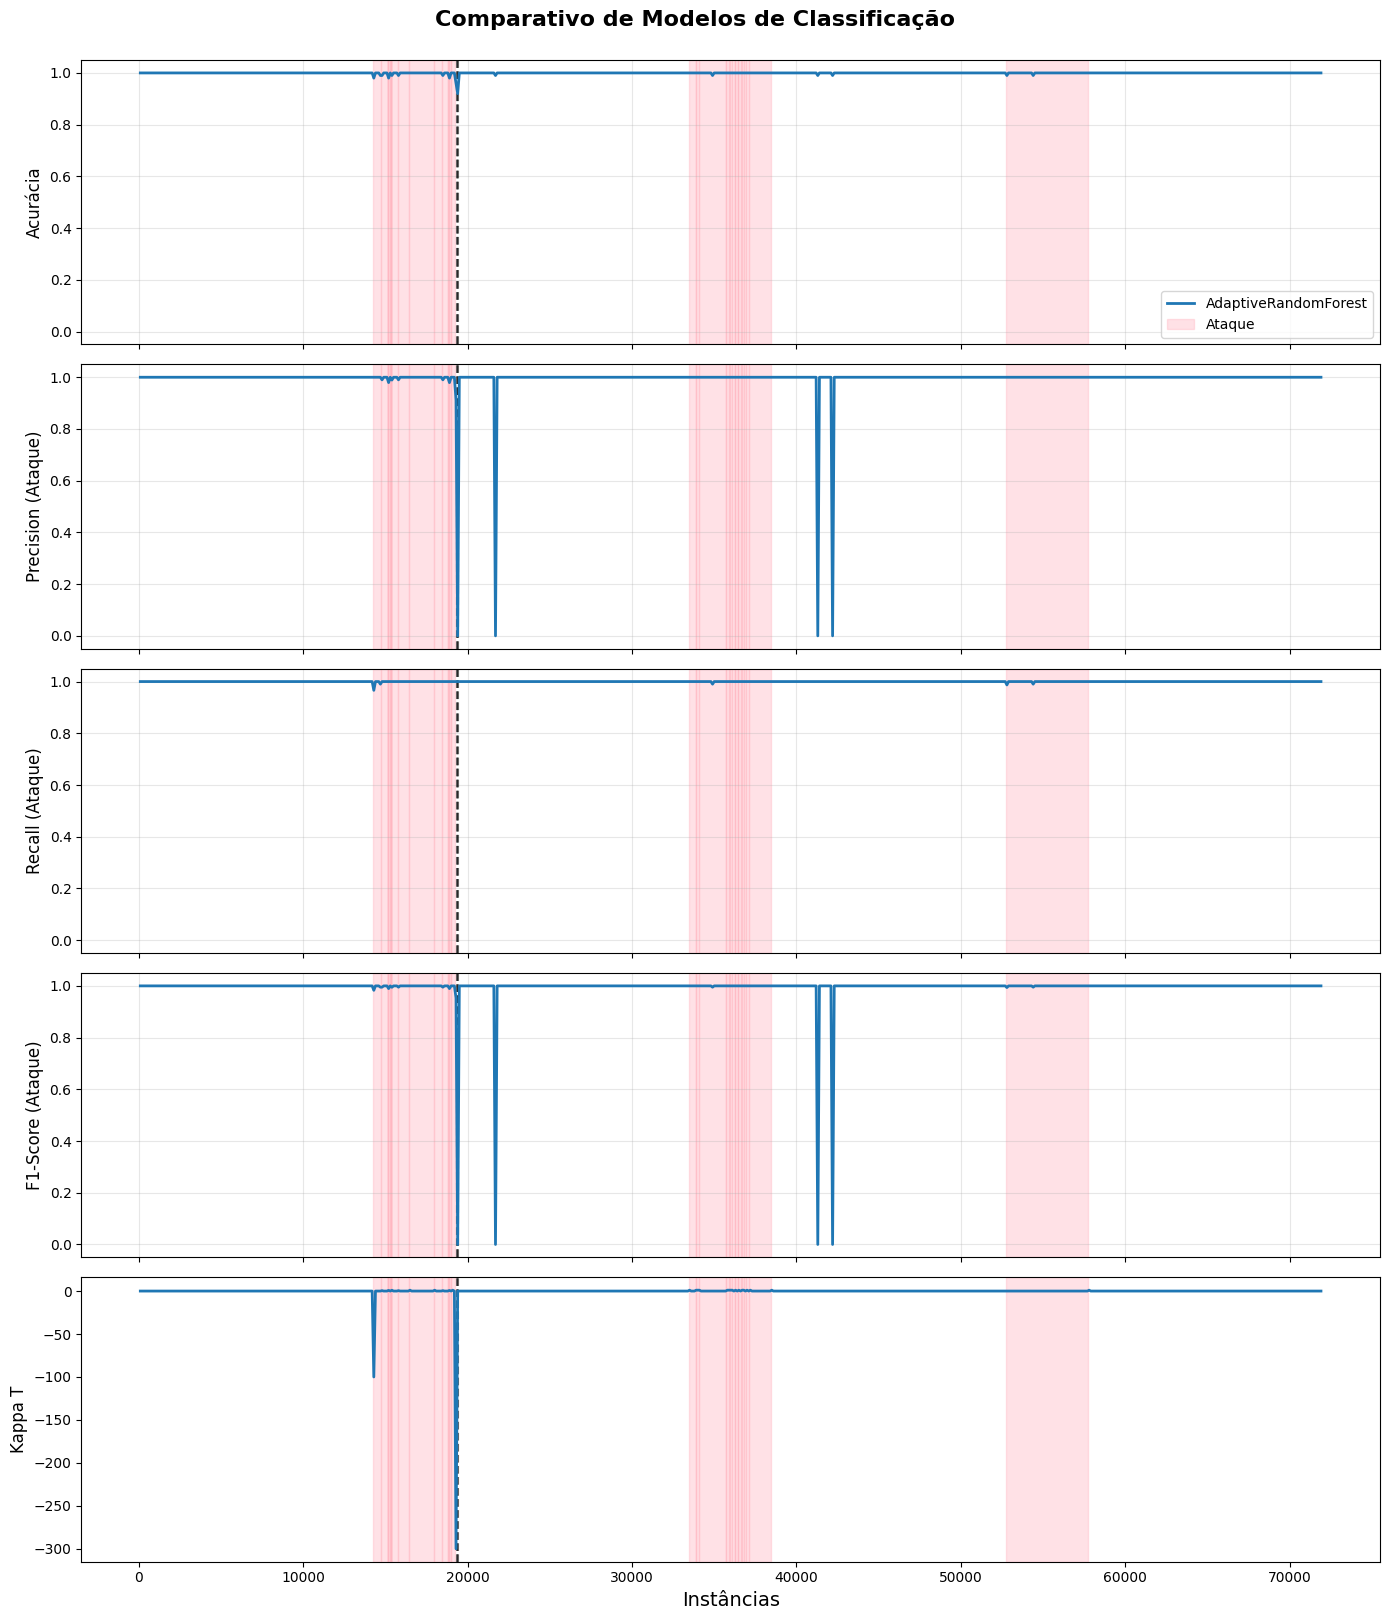

In [7]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['ARF'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Leveraging Bagging


                                    RELATÓRIO FINAL ACUMULATIVO                                     
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
LeveragingBagging         | 0.9992   | 0.9977   | 0.9987   | 0.9982   | 0.4022
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  57,014 (79.22%)
  - Ataques: 14,951 (20.78%)
  - Razão Benign/Ataque: 3.81:1 



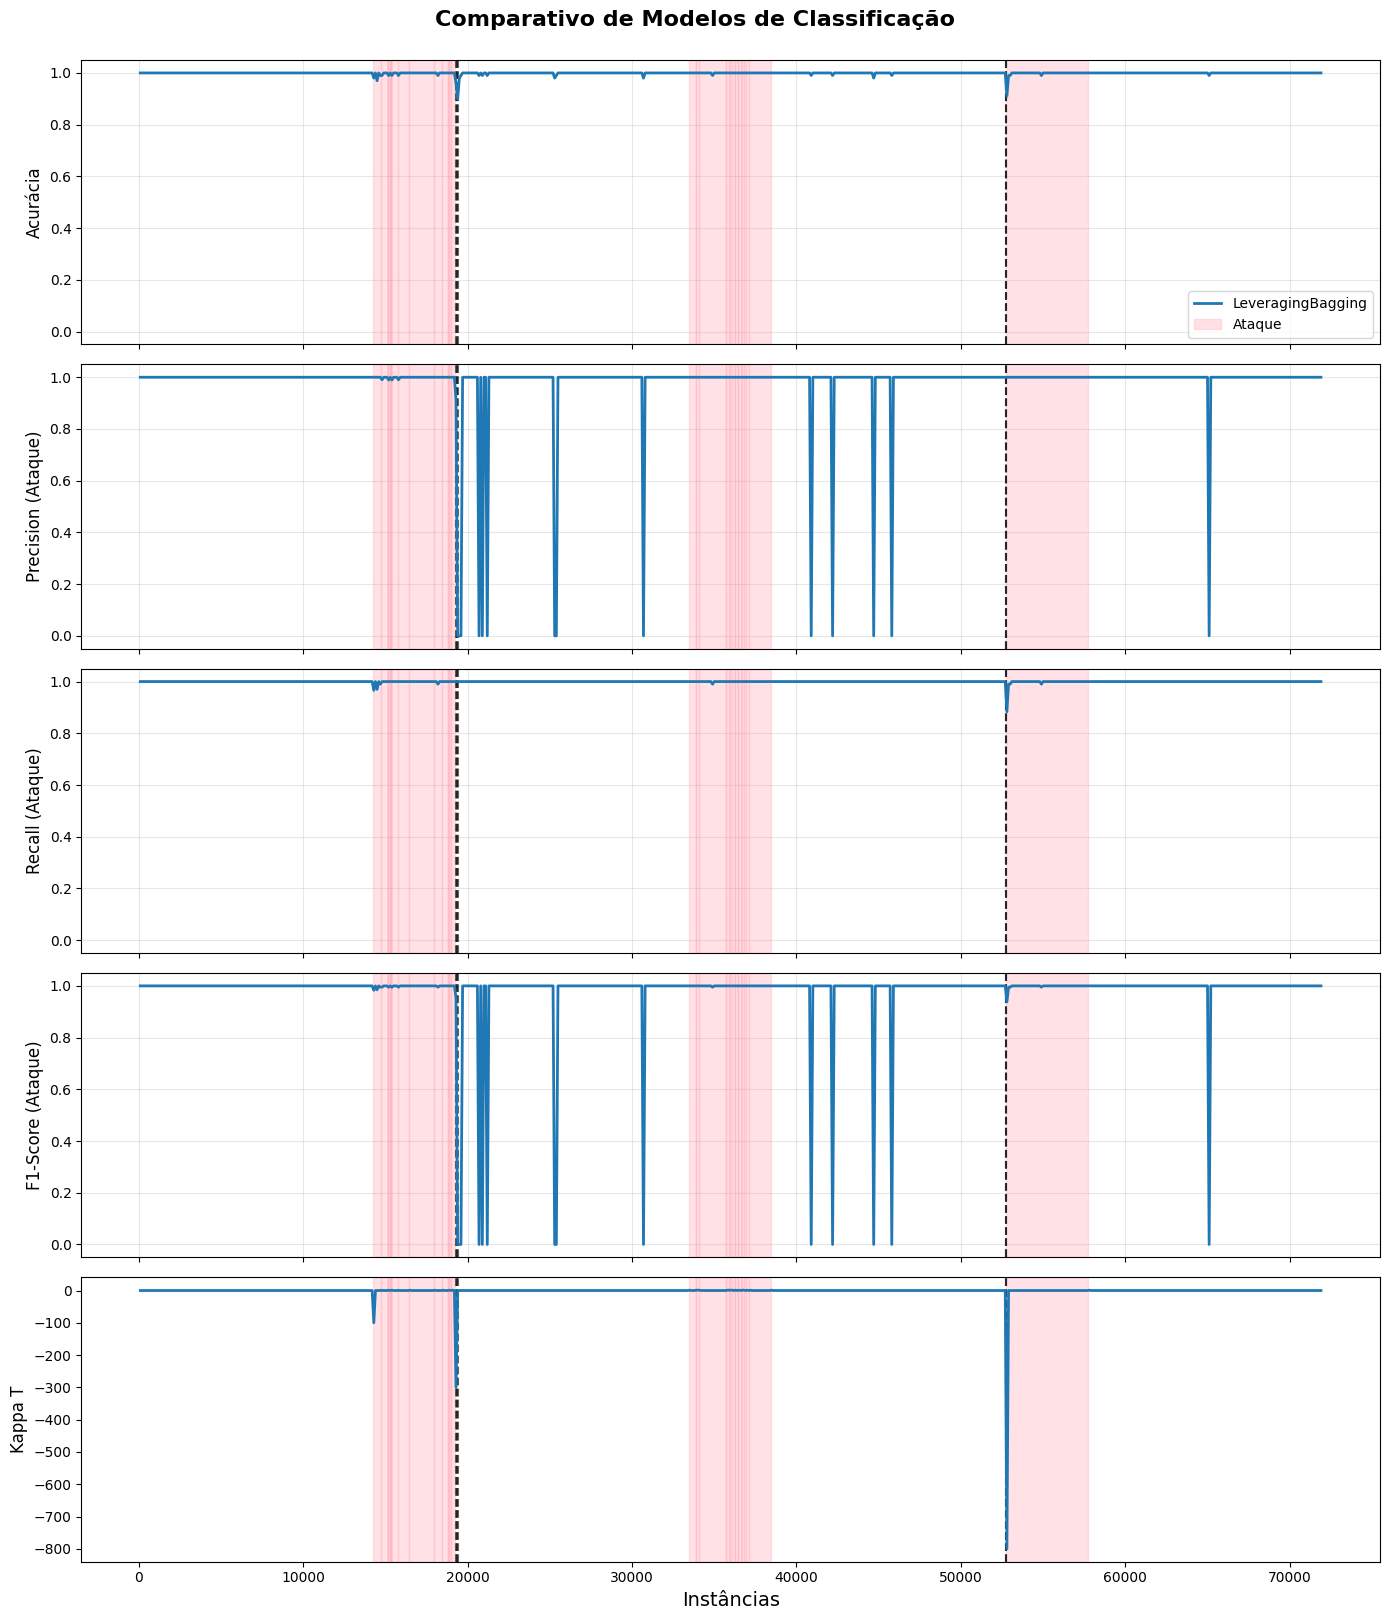

In [8]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['LB'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Hoeffding Adaptive Tree


                                    RELATÓRIO FINAL ACUMULATIVO                                     
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
HoeffdingAdaptiveTree     | 0.9989   | 0.9983   | 0.9962   | 0.9973   | 0.1087
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  57,014 (79.22%)
  - Ataques: 14,951 (20.78%)
  - Razão Benign/Ataque: 3.81:1 



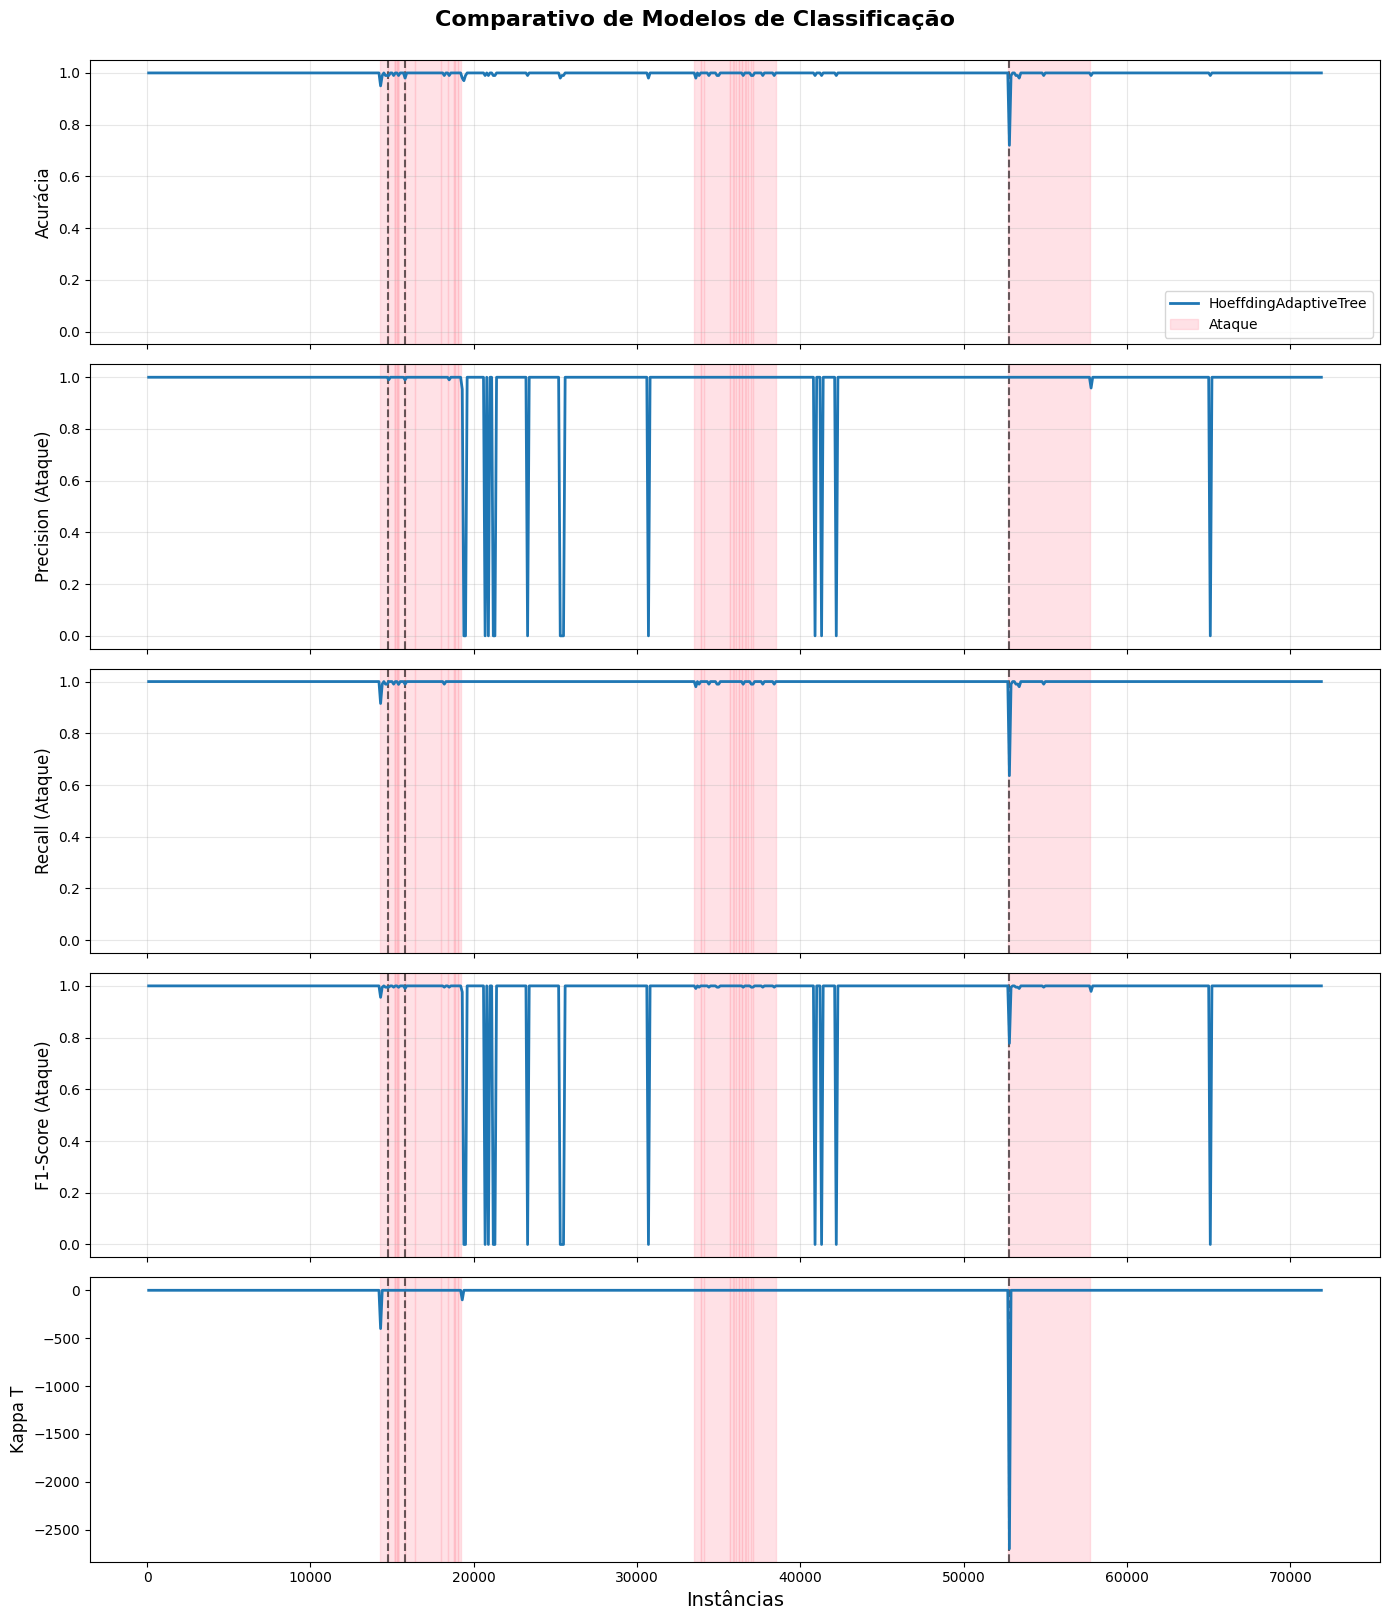

In [9]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['HAT'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Hoeffding Tree


                                    RELATÓRIO FINAL ACUMULATIVO                                     
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
HoeffdingTree             | 0.9993   | 0.9987   | 0.9982   | 0.9984   | 0.4891
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  57,014 (79.22%)
  - Ataques: 14,951 (20.78%)
  - Razão Benign/Ataque: 3.81:1 



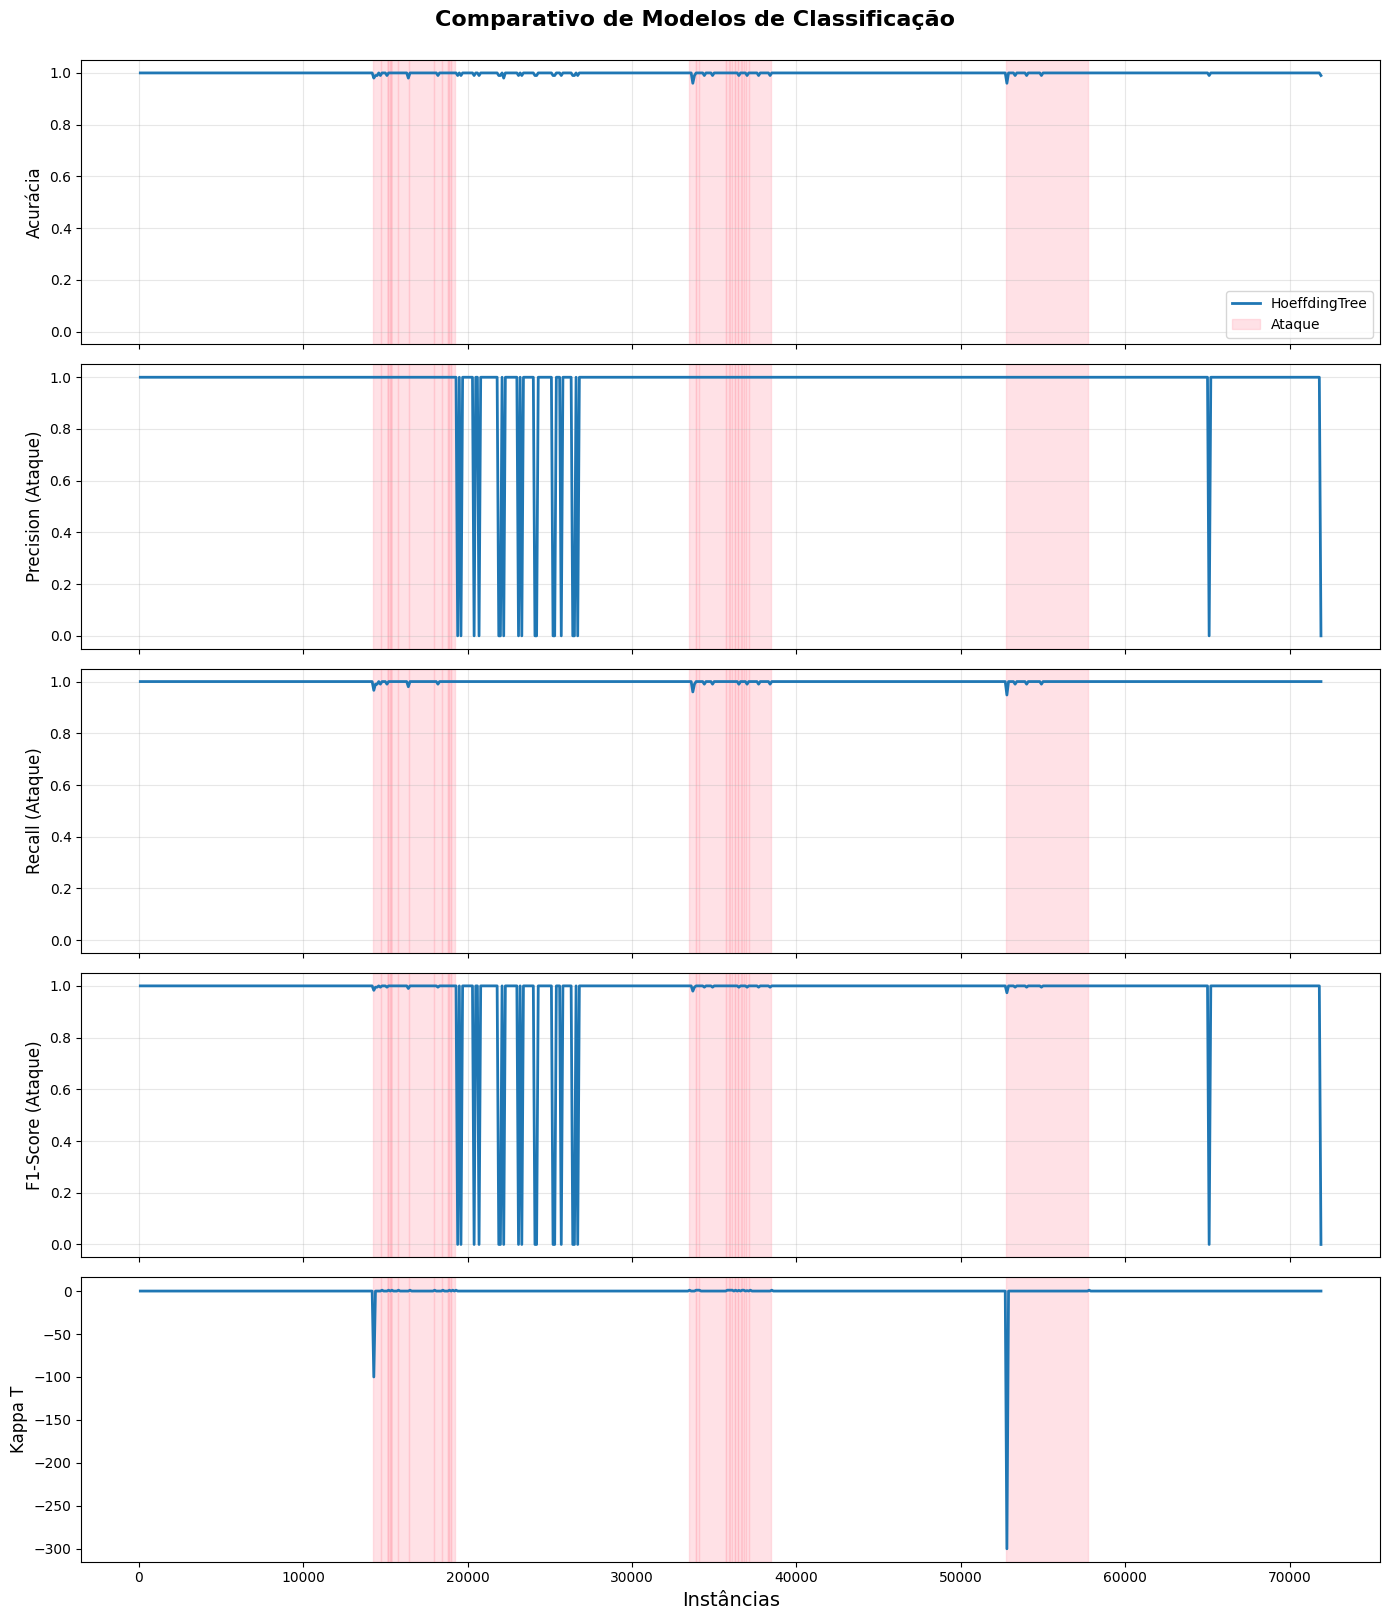

In [10]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['HT'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

### Cenário F

#### Inicialização

In [27]:
from py.ClassificationModels import get_classification_models
from py.ClassificationPipeline import ClassificationExperimentRunner
# from py.streams import newStream
from py.functions import criar_stream
import pandas as pd

INICIO = 0
FIM = 112965
TOTAL_AMOSTRAS = FIM - INICIO
MAX_INSTANCES = TOTAL_AMOSTRAS

df = pd.read_csv(
    'datasets/CICDDoS2019/data/01-12/Classification/CenarioF.csv',
)

# stream, target_names, feature_names = newStream(
#     df=df,
#     target_label_col='Label',  ## coluna de rótulo
#     binary_label=True, # transformar em binário (benigno vs ataque)
#     normalize_method="MinMaxScaler", # pode escoler entre "MinMaxScaler" (features entre 0 e 1), "StandardScaler", "RobustScaler" 
#     threshold_var=0.75, # variança de cada de coluna # os tres reduz a dimensionalidade do dataset (corta colunas com baixa variância, colunas altamente correlacionadas e seleciona as mais importantes)
#     threshold_corr=0.95, # semelhança entre as features
#     top_n_features=15, # random forest importance para selecionar as top n features mais importantes entre 15 e 20
#     stream=True
# ) # essa stream é um gerador que vai entregar os dados em tempo real, ou seja, ele vai entregar os dados em blocos, e a cada bloco ele vai atualizar o modelo e calcular as métricas de desempenho.

stream, target_names, feature_names = criar_stream(
    df=df,
    target_label_col='Label',
    binary_label=True,
    selected_features=None  # ou lista de features específicas
)

# Configurar Stream
schema = stream.get_schema()
# schema é o que vai entrar no modelo, ou seja, as colunas do dataset que vão ser usadas para treinar o modelo. Ele é criado a partir do DataFrame original, mas com as colunas selecionadas e normalizadas.


#### Adaptive Random Forest


                                    RELATÓRIO FINAL ACUMULATIVO                                     
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
AdaptiveRandomForest      | 0.9993   | 0.9975   | 0.9992   | 0.9984   | 0.0926
                            Muitos FALSOS POSITIVOS: FP=37 vs FN=12
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  56,992 (79.19%)
  - Ataques: 14,973 (20.81%)
  - Razão Benign/Ataque: 3.81:1 



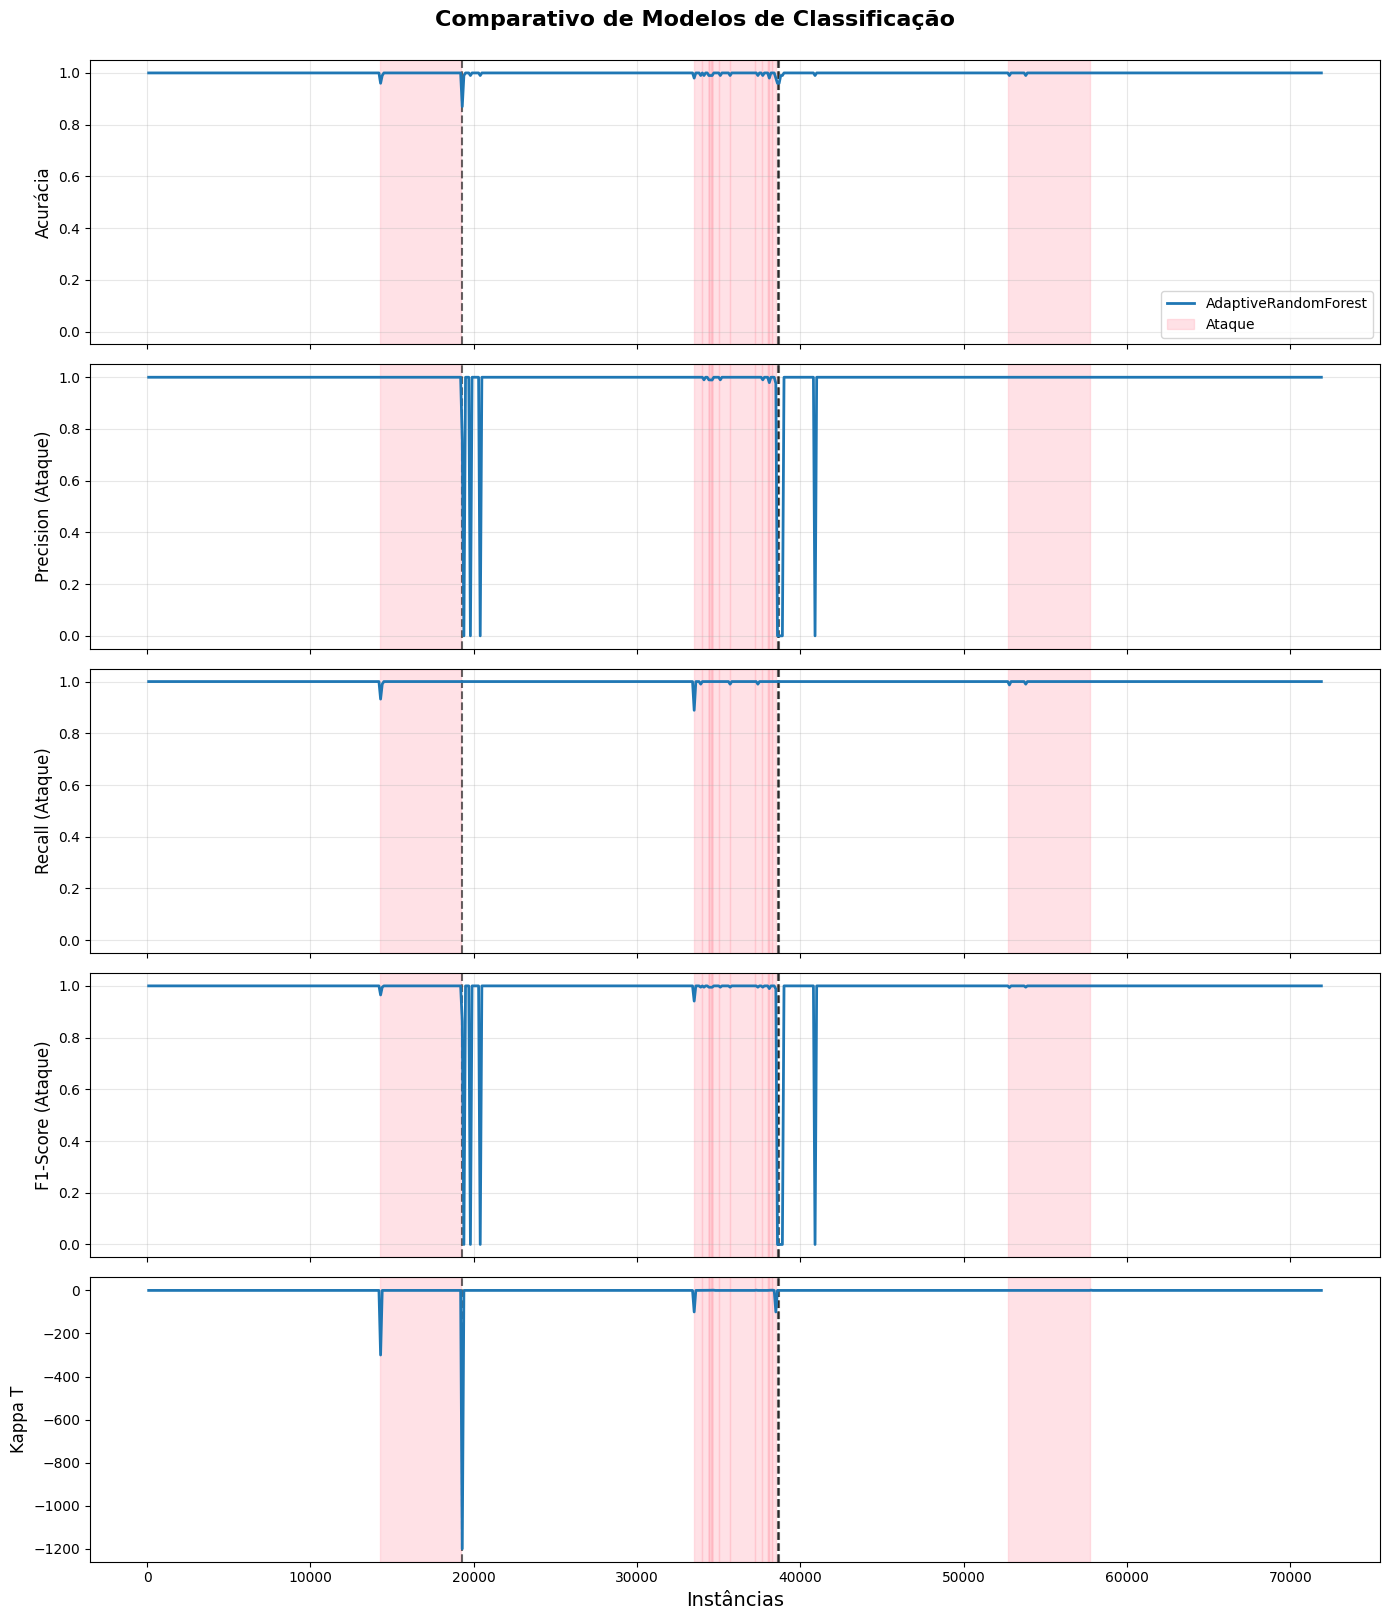

In [28]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['ARF'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Leveraging Bagging


                                    RELATÓRIO FINAL ACUMULATIVO                                     
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
LeveragingBagging         | 0.9992   | 0.9974   | 0.9987   | 0.9981   | -7.4074
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  56,992 (79.19%)
  - Ataques: 14,973 (20.81%)
  - Razão Benign/Ataque: 3.81:1 



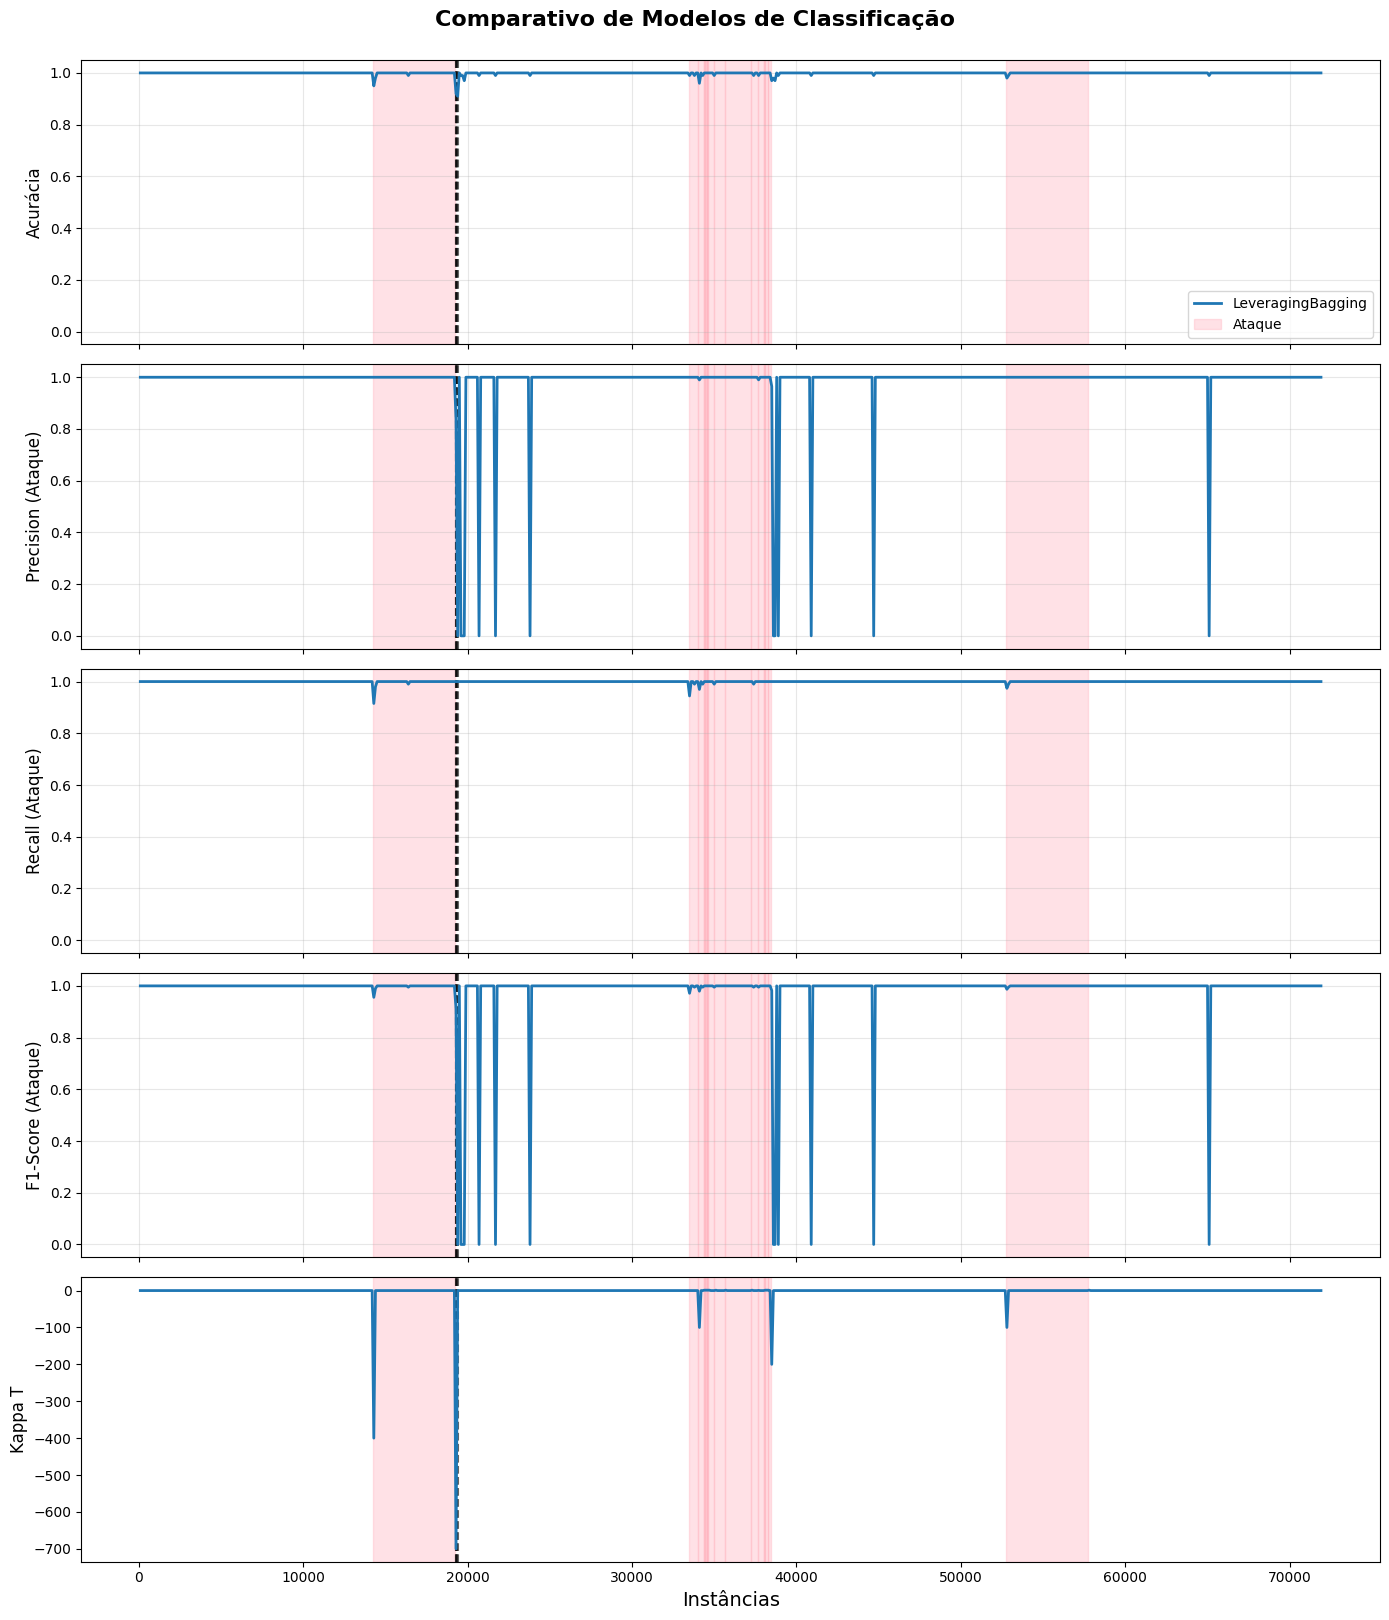

In [13]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['LB'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Hoeffding Adaptive Tree


                                    RELATÓRIO FINAL ACUMULATIVO                                     
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
HoeffdingAdaptiveTree     | 0.9993   | 0.9981   | 0.9983   | 0.9982   | 0.0185
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  56,992 (79.19%)
  - Ataques: 14,973 (20.81%)
  - Razão Benign/Ataque: 3.81:1 



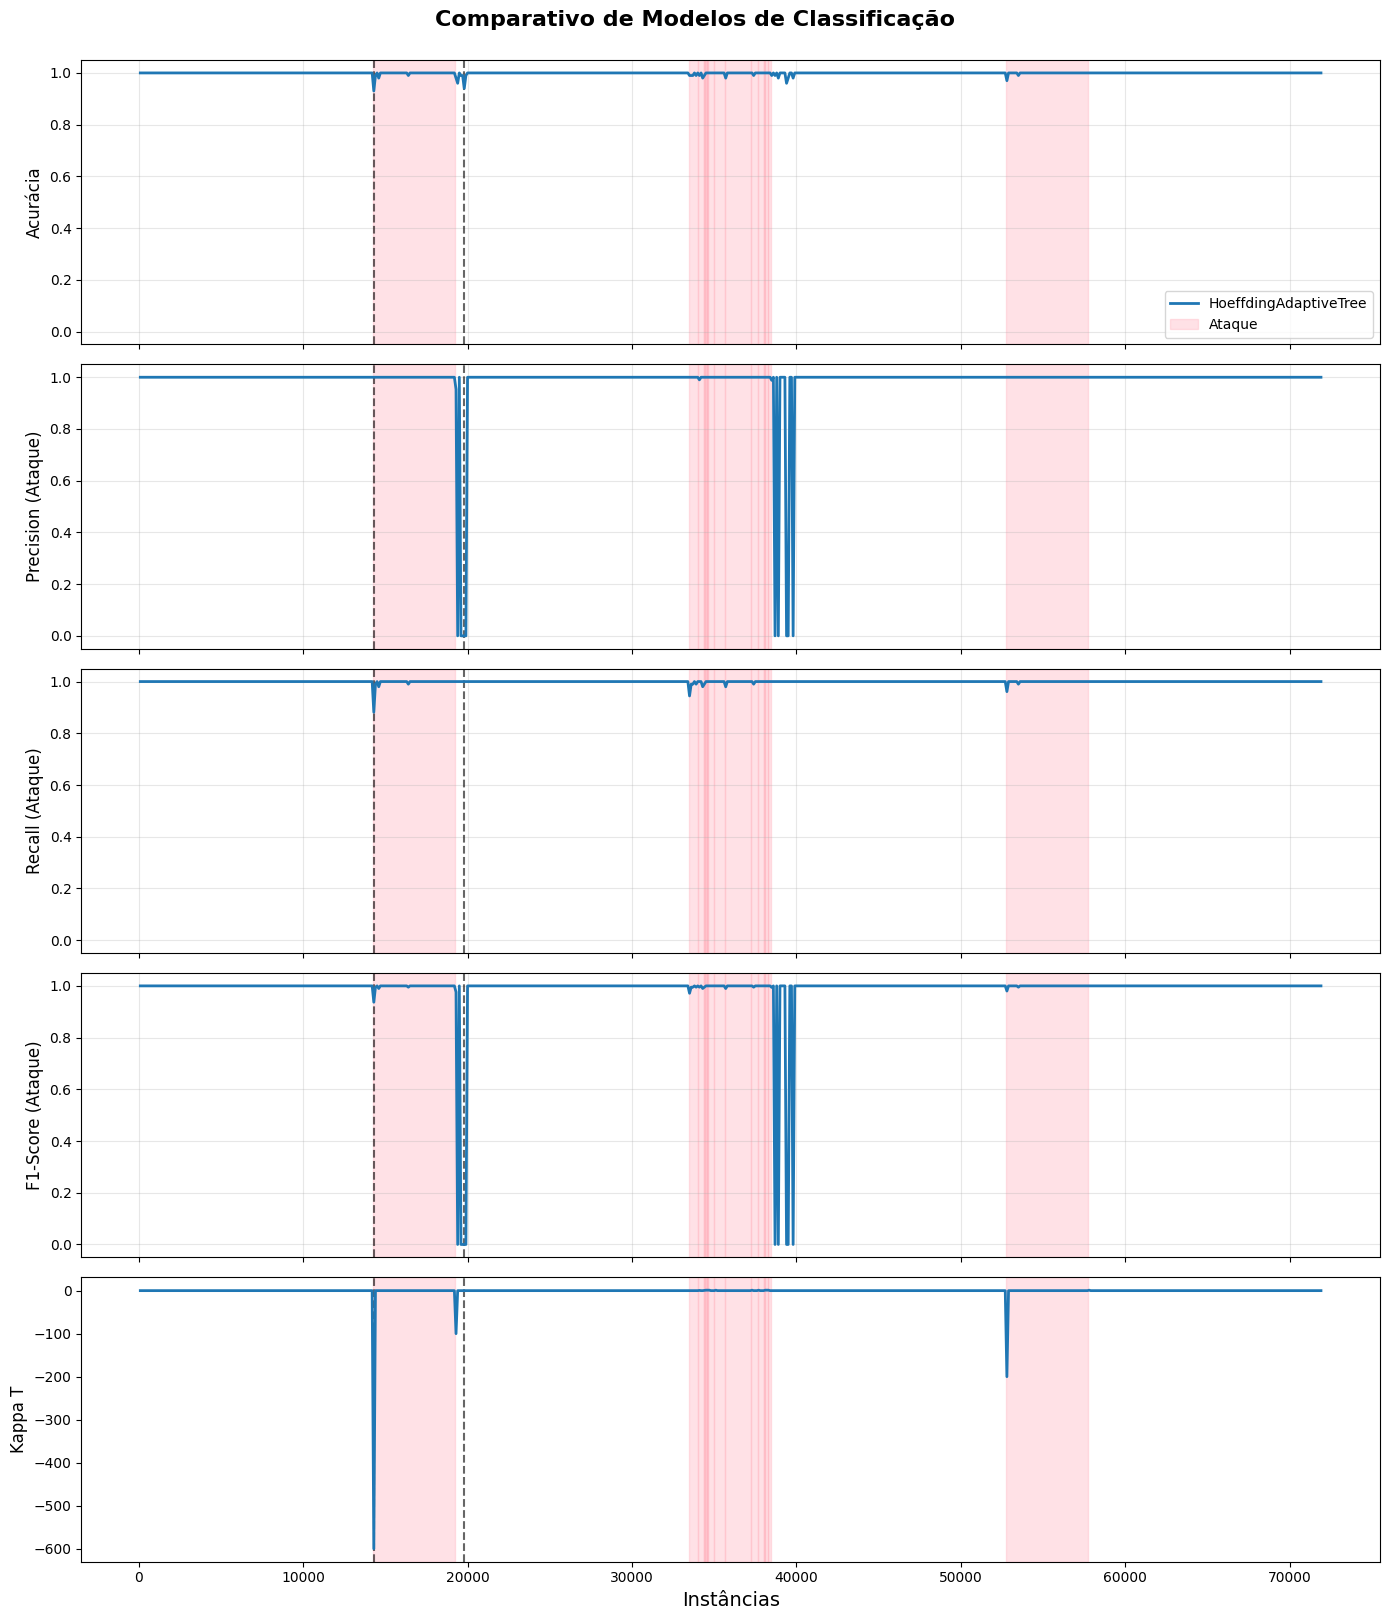

In [14]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['HAT'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Hoeffding Tree


                                    RELATÓRIO FINAL ACUMULATIVO                                     
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
HoeffdingTree             | 0.9990   | 0.9988   | 0.9963   | 0.9975   | -37.0370
                            Muitos FALSOS NEGATIVOS: FN=56 vs FP=18
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  56,992 (79.19%)
  - Ataques: 14,973 (20.81%)
  - Razão Benign/Ataque: 3.81:1 



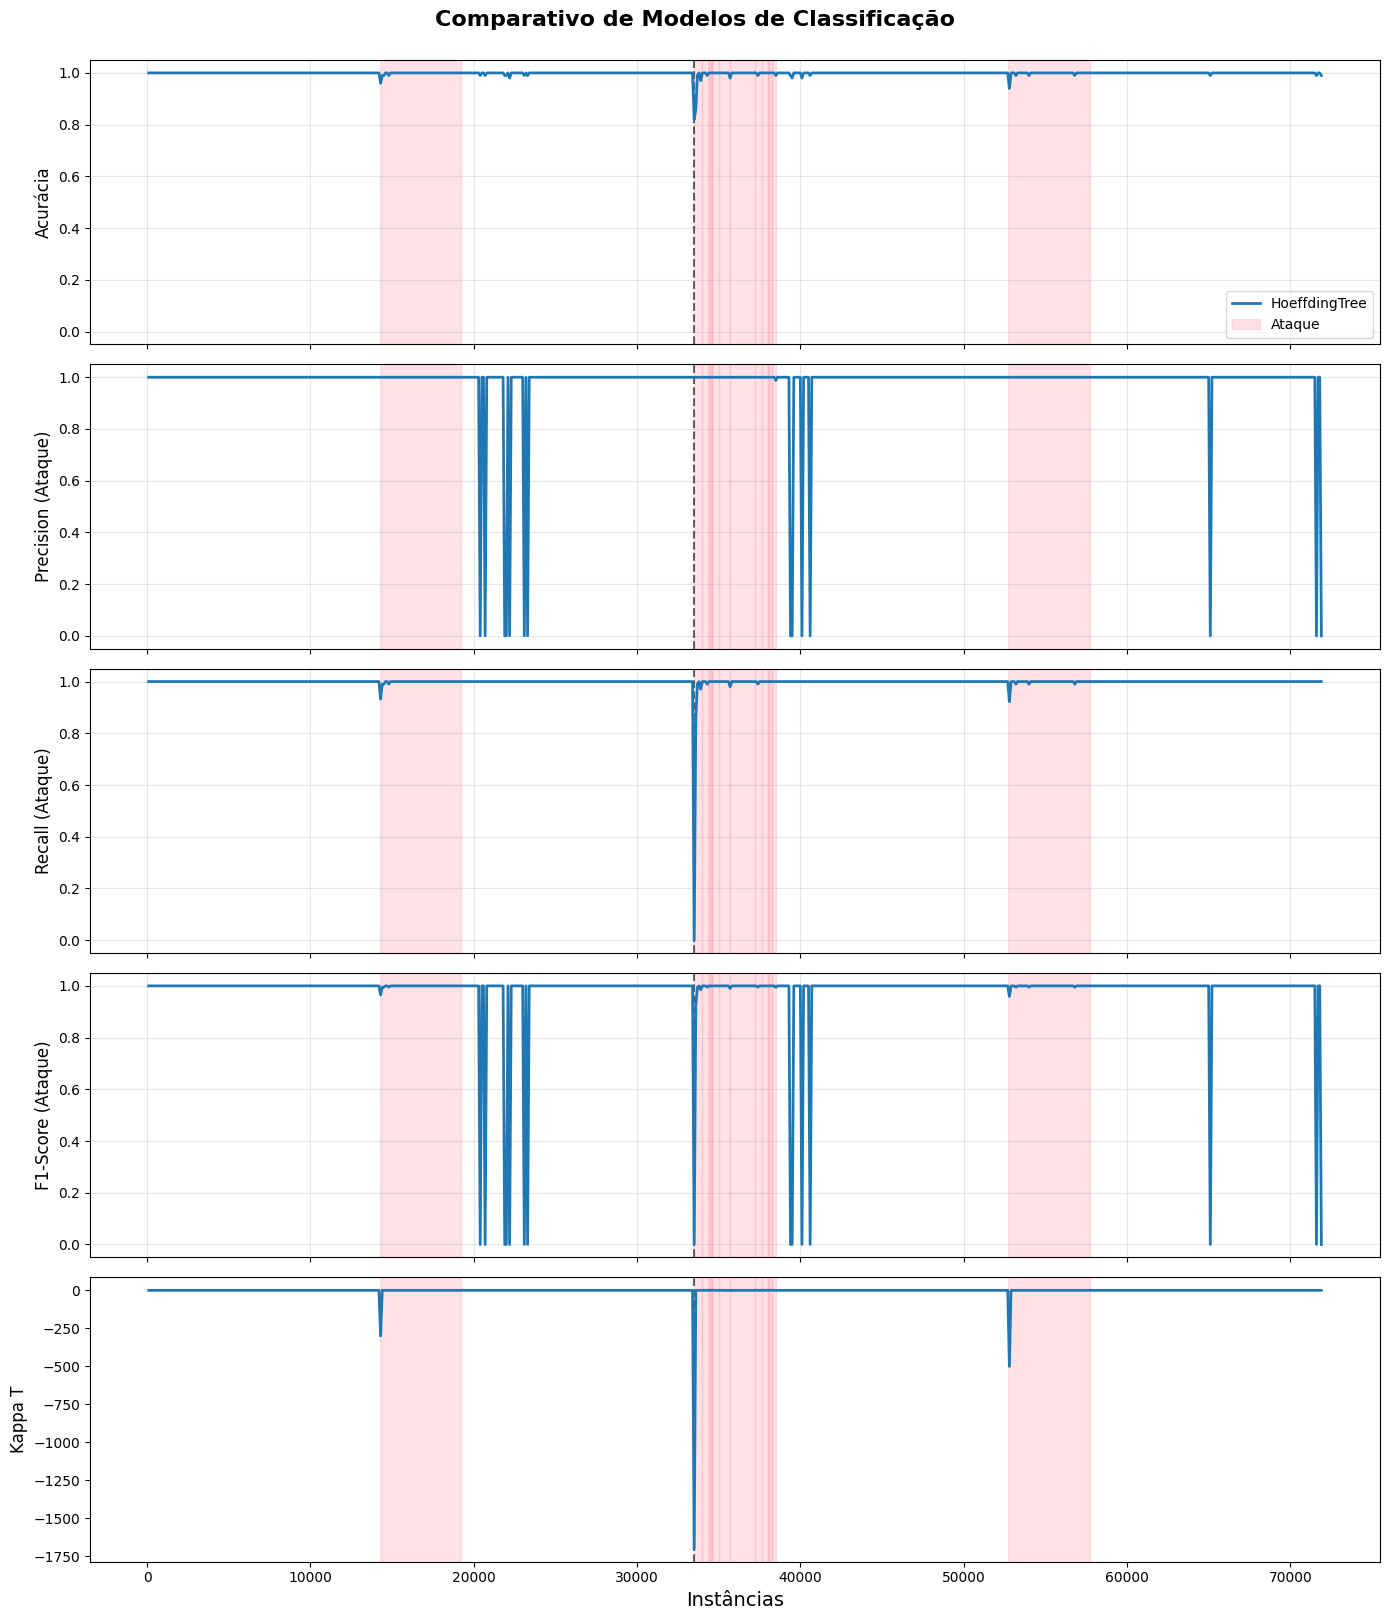

In [15]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['HT'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

## Cenário Generalização 4

- Ataques: SSDP (A); UDP (B); TFTP (C).
    - A e B são muito parecidos; C está no mesmo grupo de similaridade mas difere um pouco mais.
- Cenários:
    - Cenário G: A -> B -> C -> A.
    - Cenário H: C -> B -> A -> C.
    - Cenário  I: B -> C -> A -> B.
- Objetivo: Analizar como os modelos respondem diante de três ataques semelhantes, mas agora com um deles não tão parecido; ver como o C influencia quando a ocorrencia é entre A e B.


### Cenário G

#### Inicialização

In [16]:
from py.ClassificationModels import get_classification_models
from py.ClassificationPipeline import ClassificationExperimentRunner
# from py.streams import newStream
from py.functions import criar_stream
import pandas as pd

INICIO = 0
FIM = 112965
TOTAL_AMOSTRAS = FIM - INICIO
MAX_INSTANCES = TOTAL_AMOSTRAS

df = pd.read_csv(
    'datasets/CICDDoS2019/data/01-12/Classification/CenarioG.csv',
)

# stream, target_names, feature_names = newStream(
#     df=df,
#     target_label_col='Label',  ## coluna de rótulo
#     binary_label=True, # transformar em binário (benigno vs ataque)
#     normalize_method="MinMaxScaler", # pode escoler entre "MinMaxScaler" (features entre 0 e 1), "StandardScaler", "RobustScaler" 
#     threshold_var=0.75, # variança de cada de coluna # os tres reduz a dimensionalidade do dataset (corta colunas com baixa variância, colunas altamente correlacionadas e seleciona as mais importantes)
#     threshold_corr=0.95, # semelhança entre as features
#     top_n_features=15, # random forest importance para selecionar as top n features mais importantes entre 15 e 20
#     stream=True
# ) # essa stream é um gerador que vai entregar os dados em tempo real, ou seja, ele vai entregar os dados em blocos, e a cada bloco ele vai atualizar o modelo e calcular as métricas de desempenho.

stream, target_names, feature_names = criar_stream(
    df=df,
    target_label_col='Label',
    binary_label=True,
    selected_features=None  # ou lista de features específicas
)

# Configurar Stream
schema = stream.get_schema()
# schema é o que vai entrar no modelo, ou seja, as colunas do dataset que vão ser usadas para treinar o modelo. Ele é criado a partir do DataFrame original, mas com as colunas selecionadas e normalizadas.


#### Adaptive Random Forest


                                    RELATÓRIO FINAL ACUMULATIVO                                     
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
AdaptiveRandomForest      | 0.9992   | 0.9982   | 0.9987   | 0.9984   | 0.3404
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 76,965
  - Benign:  57,014 (74.08%)
  - Ataques: 19,951 (25.92%)
  - Razão Benign/Ataque: 2.86:1 



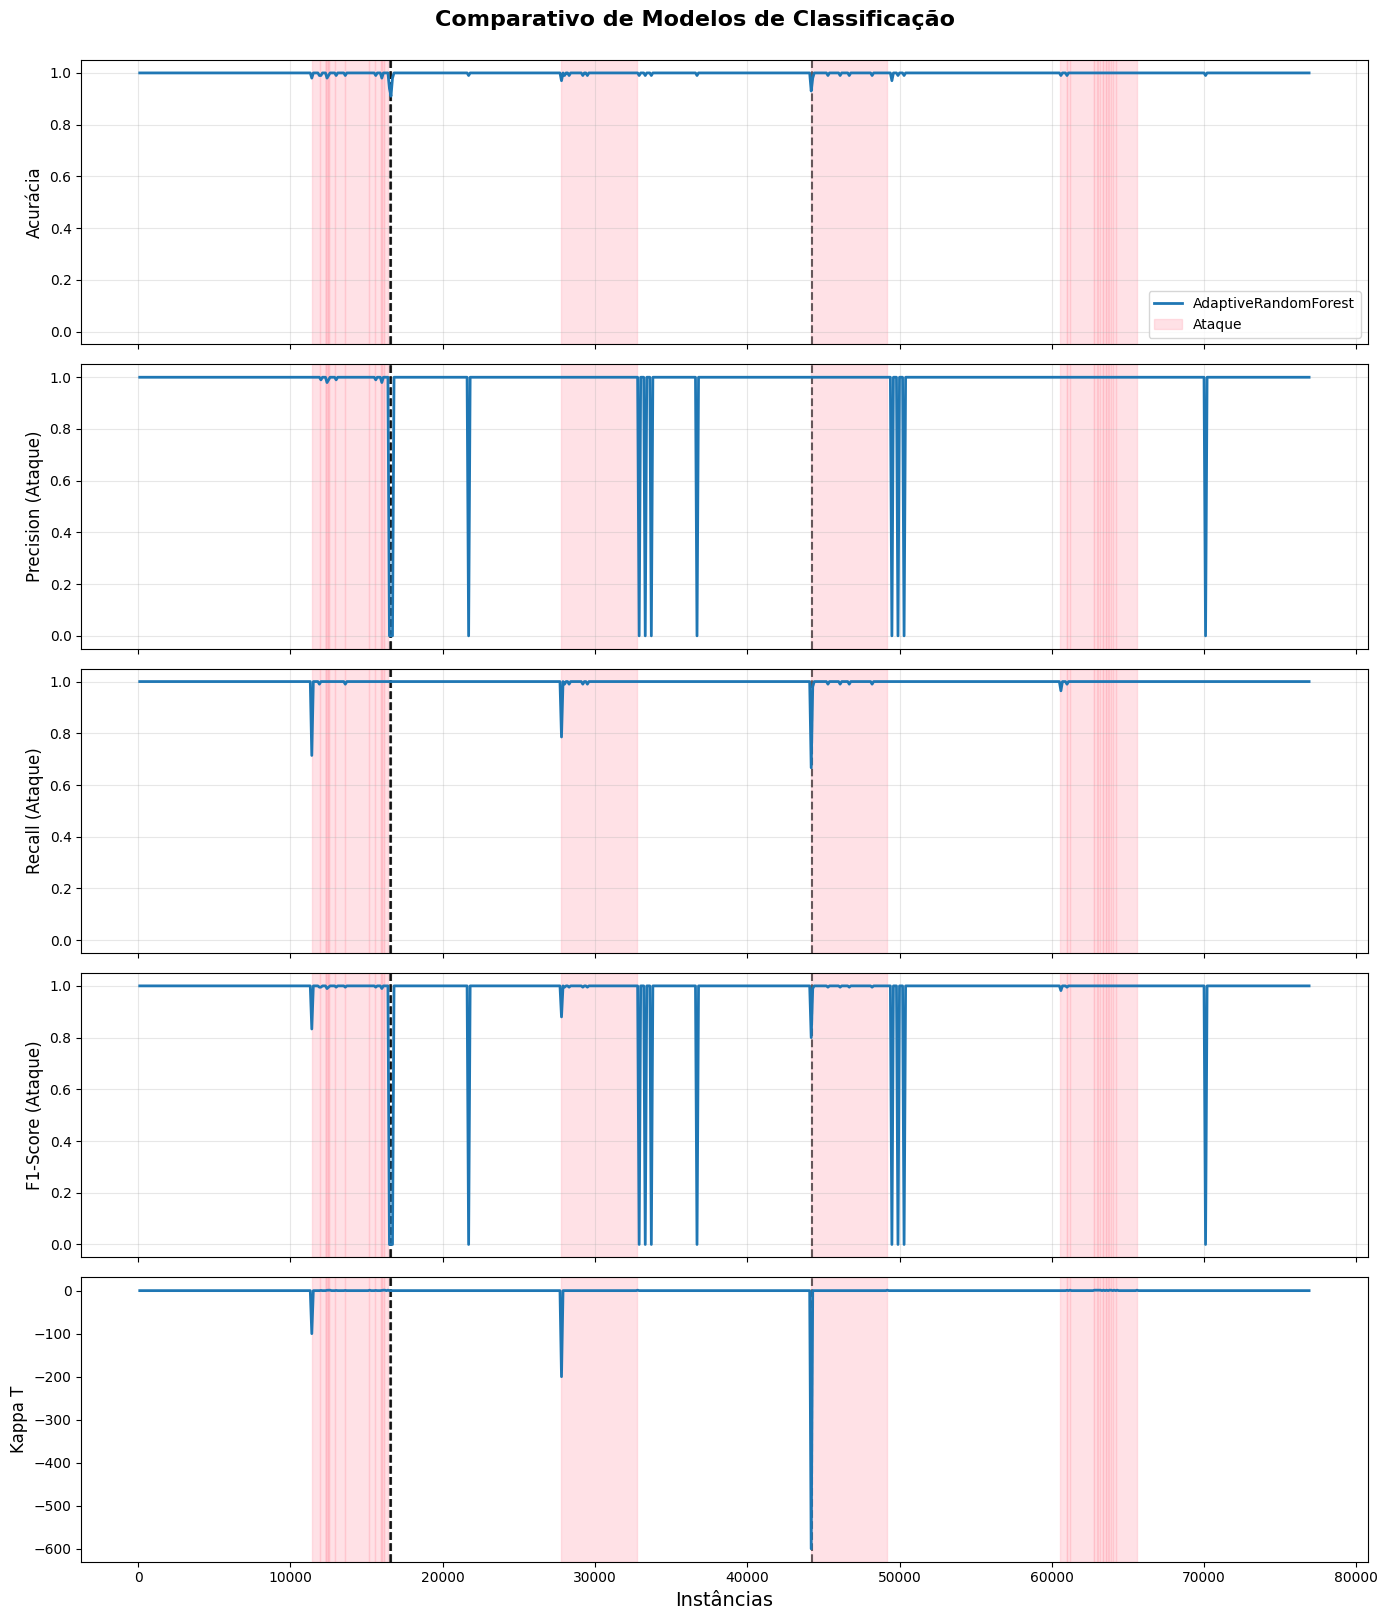

In [17]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['ARF'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Leveraging Bagging


                                    RELATÓRIO FINAL ACUMULATIVO                                     
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
LeveragingBagging         | 0.9990   | 0.9981   | 0.9981   | 0.9981   | 0.2021
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 76,965
  - Benign:  57,014 (74.08%)
  - Ataques: 19,951 (25.92%)
  - Razão Benign/Ataque: 2.86:1 



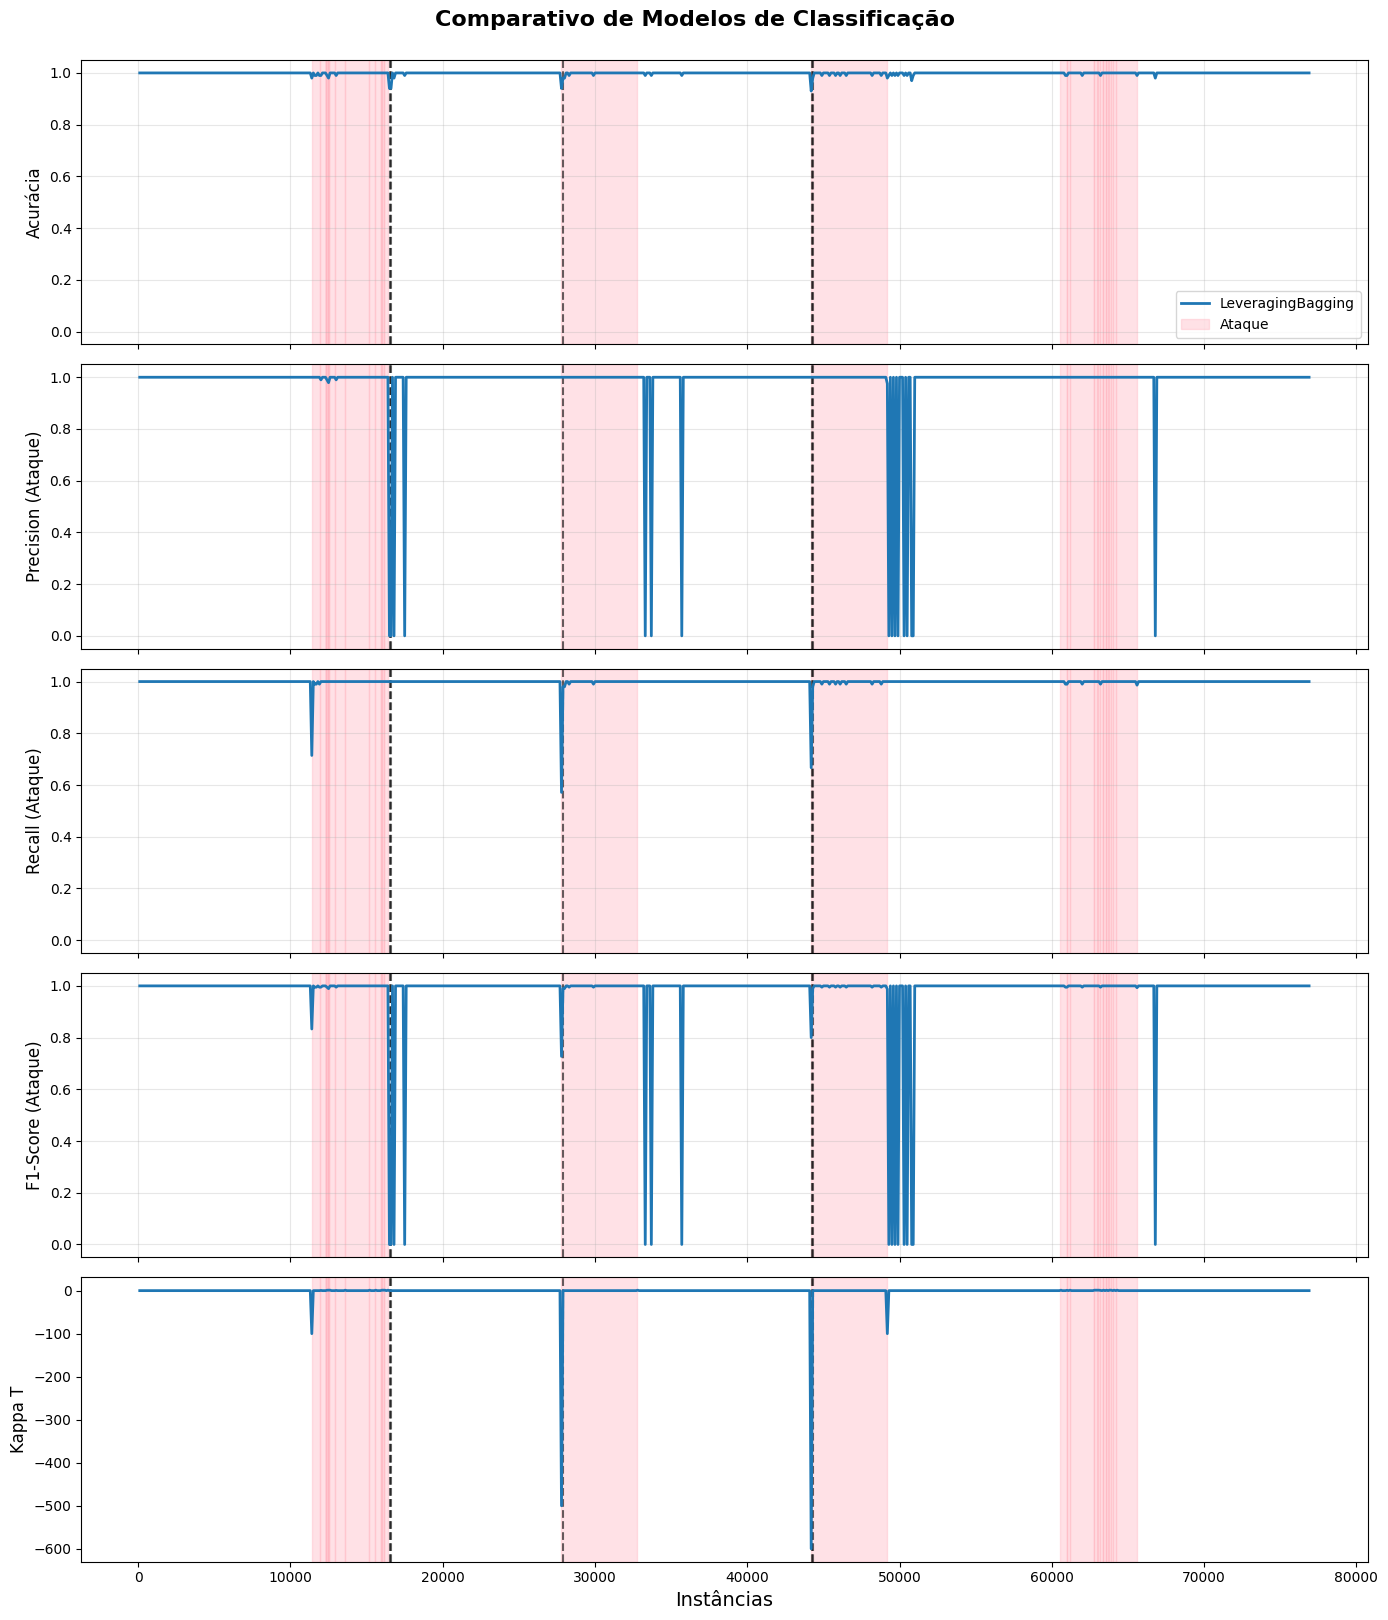

In [18]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['LB'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Hoeffding Adaptive Tree


                                    RELATÓRIO FINAL ACUMULATIVO                                     
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
HoeffdingAdaptiveTree     | 0.9982   | 0.9963   | 0.9969   | 0.9966   | -44.6809
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 76,965
  - Benign:  57,014 (74.08%)
  - Ataques: 19,951 (25.92%)
  - Razão Benign/Ataque: 2.86:1 



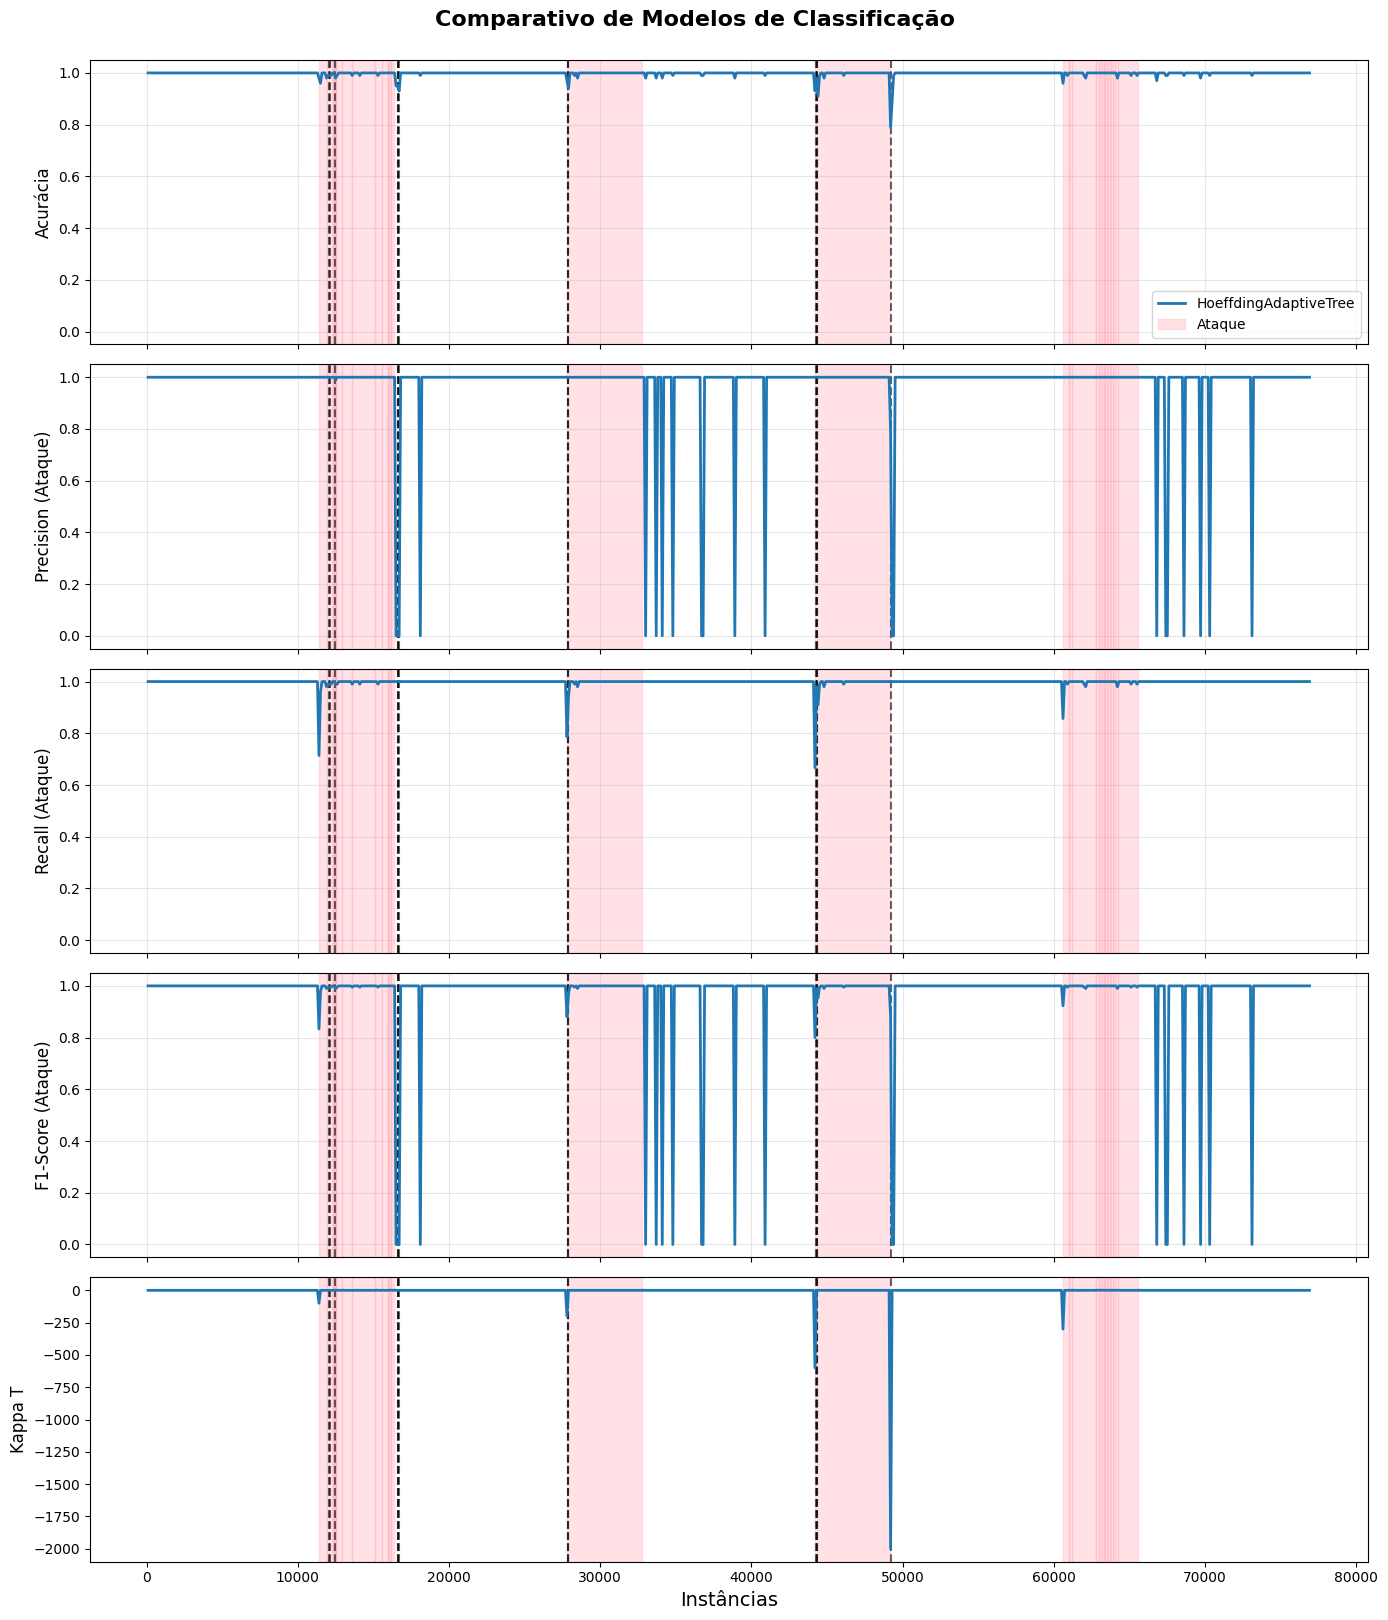

In [19]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['HAT'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Hoeffding Tree


                                    RELATÓRIO FINAL ACUMULATIVO                                     
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
HoeffdingTree             | 0.9981   | 0.9989   | 0.9939   | 0.9964   | -52.1277
                            Muitos FALSOS NEGATIVOS: FN=121 vs FP=22
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 76,965
  - Benign:  57,014 (74.08%)
  - Ataques: 19,951 (25.92%)
  - Razão Benign/Ataque: 2.86:1 



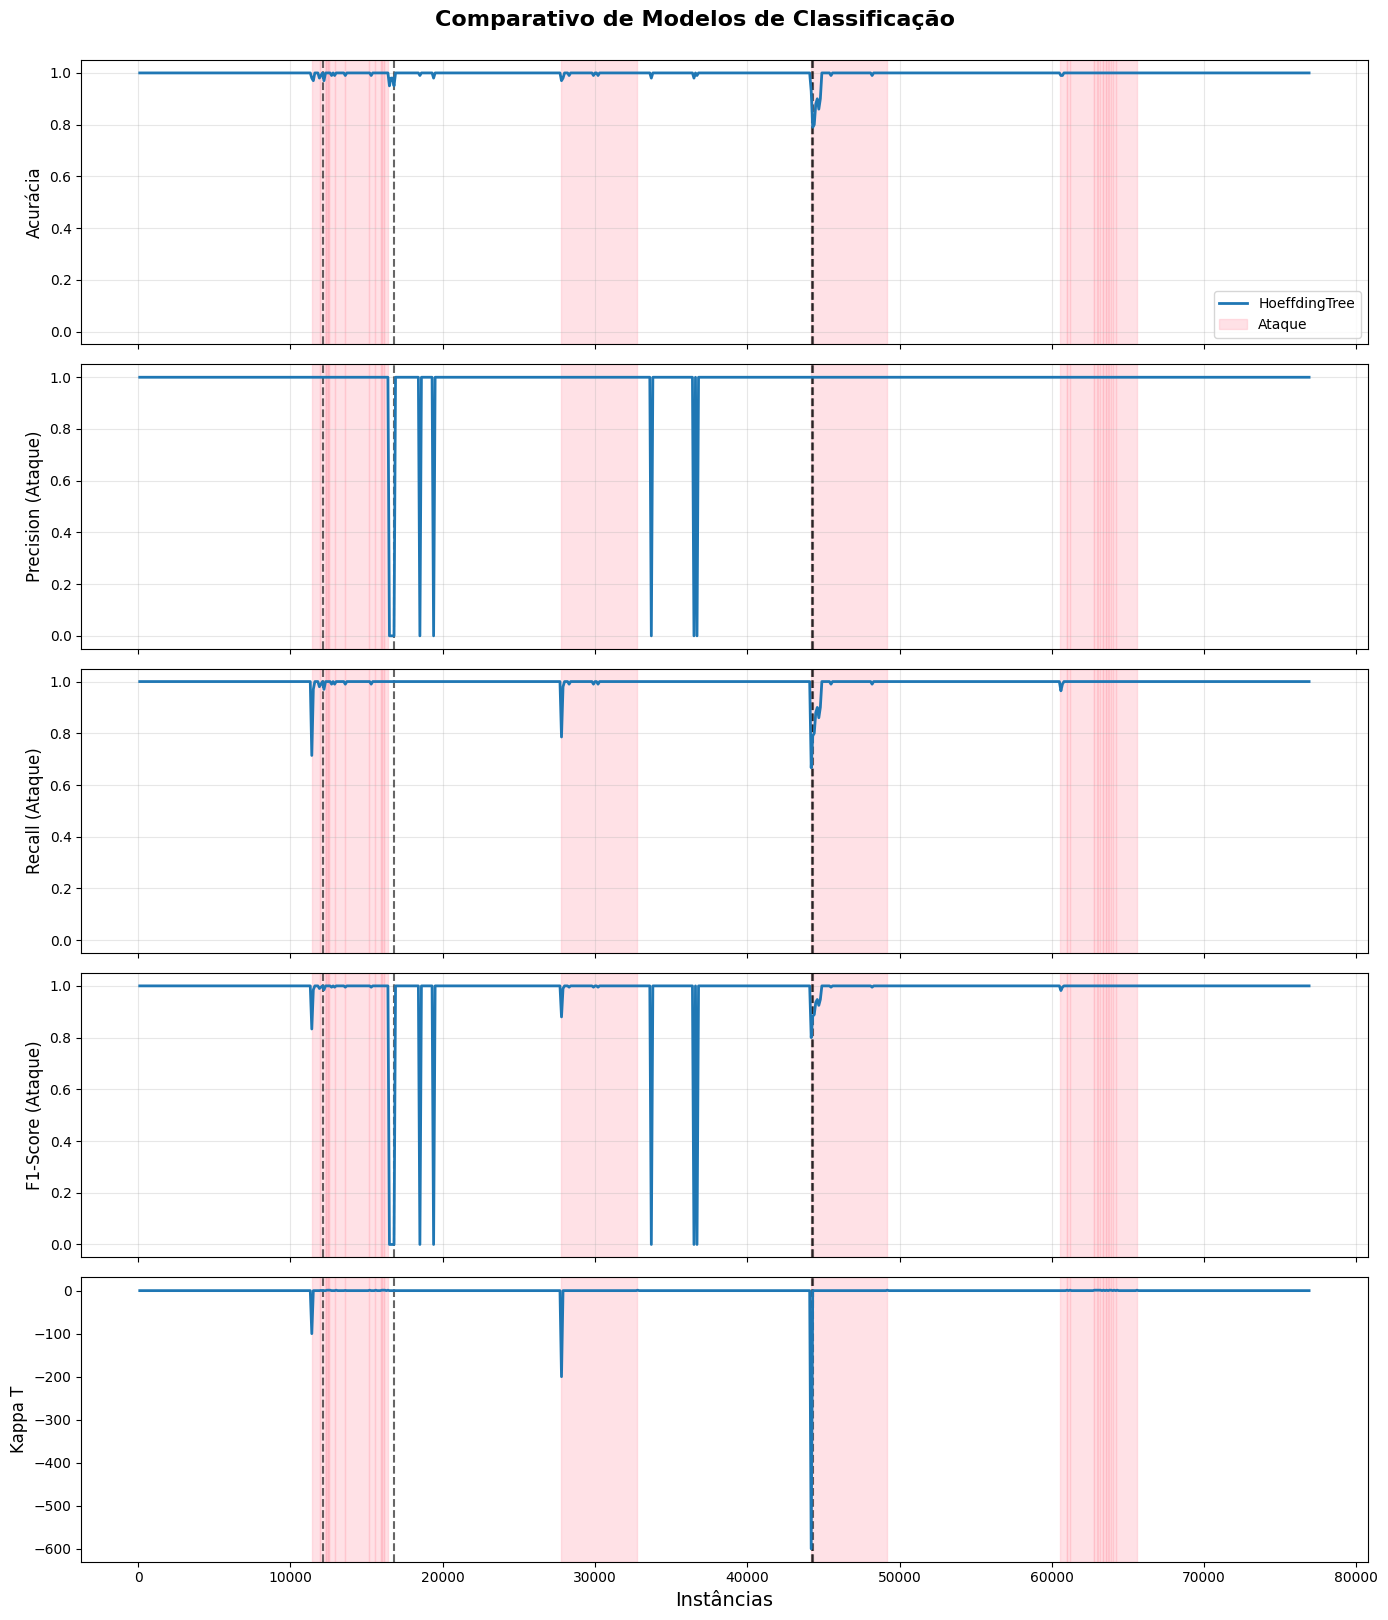

In [20]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['HT'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

### Cenário H

#### Inicialização

In [21]:
from py.ClassificationModels import get_classification_models
from py.ClassificationPipeline import ClassificationExperimentRunner
# from py.streams import newStream
from py.functions import criar_stream
import pandas as pd

INICIO = 0
FIM = 112965
TOTAL_AMOSTRAS = FIM - INICIO
MAX_INSTANCES = TOTAL_AMOSTRAS

df = pd.read_csv(
    'datasets/CICDDoS2019/data/01-12/Classification/CenarioH.csv',
)

# stream, target_names, feature_names = newStream(
#     df=df,
#     target_label_col='Label',  ## coluna de rótulo
#     binary_label=True, # transformar em binário (benigno vs ataque)
#     normalize_method="MinMaxScaler", # pode escoler entre "MinMaxScaler" (features entre 0 e 1), "StandardScaler", "RobustScaler" 
#     threshold_var=0.75, # variança de cada de coluna # os tres reduz a dimensionalidade do dataset (corta colunas com baixa variância, colunas altamente correlacionadas e seleciona as mais importantes)
#     threshold_corr=0.95, # semelhança entre as features
#     top_n_features=15, # random forest importance para selecionar as top n features mais importantes entre 15 e 20
#     stream=True
# ) # essa stream é um gerador que vai entregar os dados em tempo real, ou seja, ele vai entregar os dados em blocos, e a cada bloco ele vai atualizar o modelo e calcular as métricas de desempenho.

stream, target_names, feature_names = criar_stream(
    df=df,
    target_label_col='Label',
    binary_label=True,
    selected_features=None  # ou lista de features específicas
)

# Configurar Stream
schema = stream.get_schema()
# schema é o que vai entrar no modelo, ou seja, as colunas do dataset que vão ser usadas para treinar o modelo. Ele é criado a partir do DataFrame original, mas com as colunas selecionadas e normalizadas.


#### Adaptive Random Forest


                                    RELATÓRIO FINAL ACUMULATIVO                                     
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
AdaptiveRandomForest      | 0.9993   | 0.9983   | 0.9990   | 0.9986   | 0.0357
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 76,965
  - Benign:  56,992 (74.05%)
  - Ataques: 19,973 (25.95%)
  - Razão Benign/Ataque: 2.85:1 



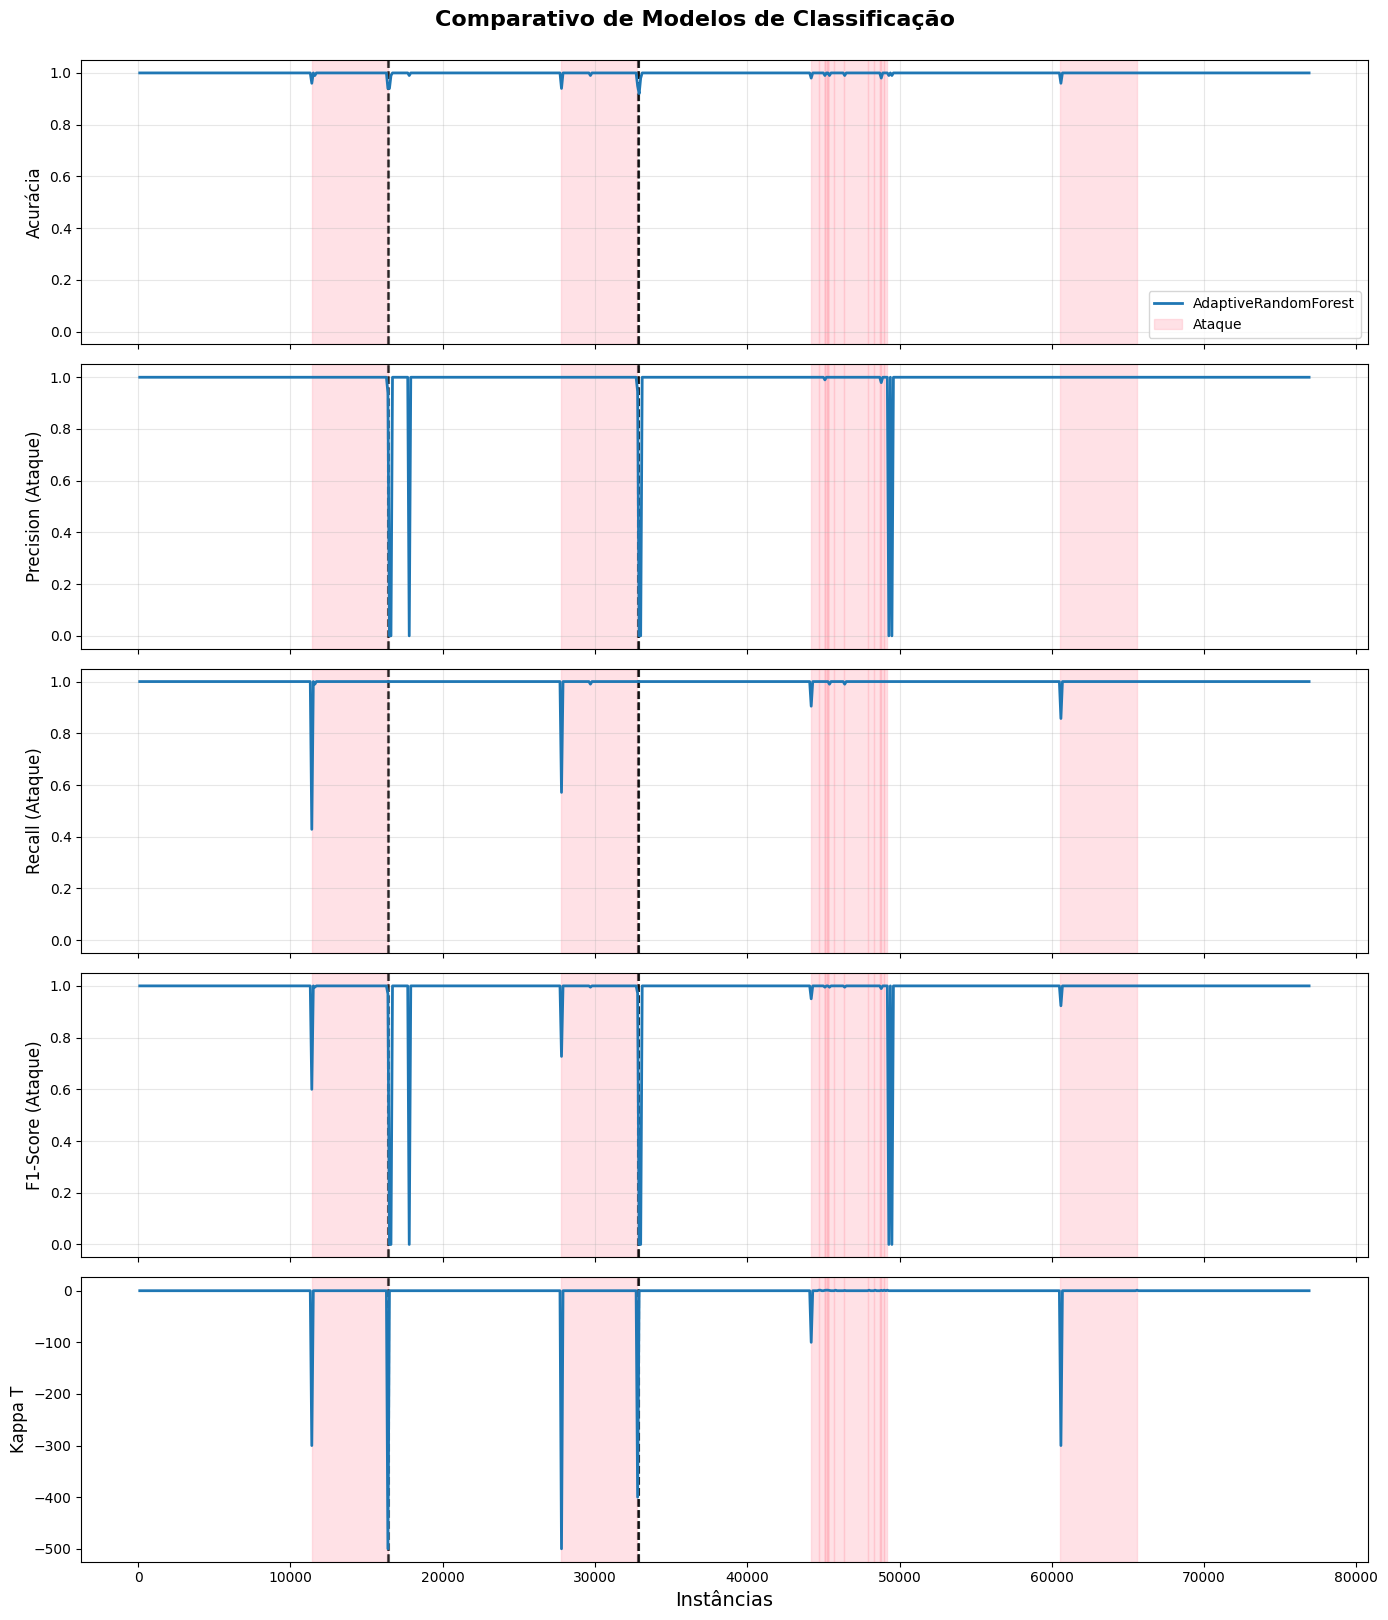

In [22]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['ARF'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Leveraging Bagging


                                    RELATÓRIO FINAL ACUMULATIVO                                     
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
LeveragingBagging         | 0.9990   | 0.9980   | 0.9983   | 0.9981   | -32.1429
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 76,965
  - Benign:  56,992 (74.05%)
  - Ataques: 19,973 (25.95%)
  - Razão Benign/Ataque: 2.85:1 



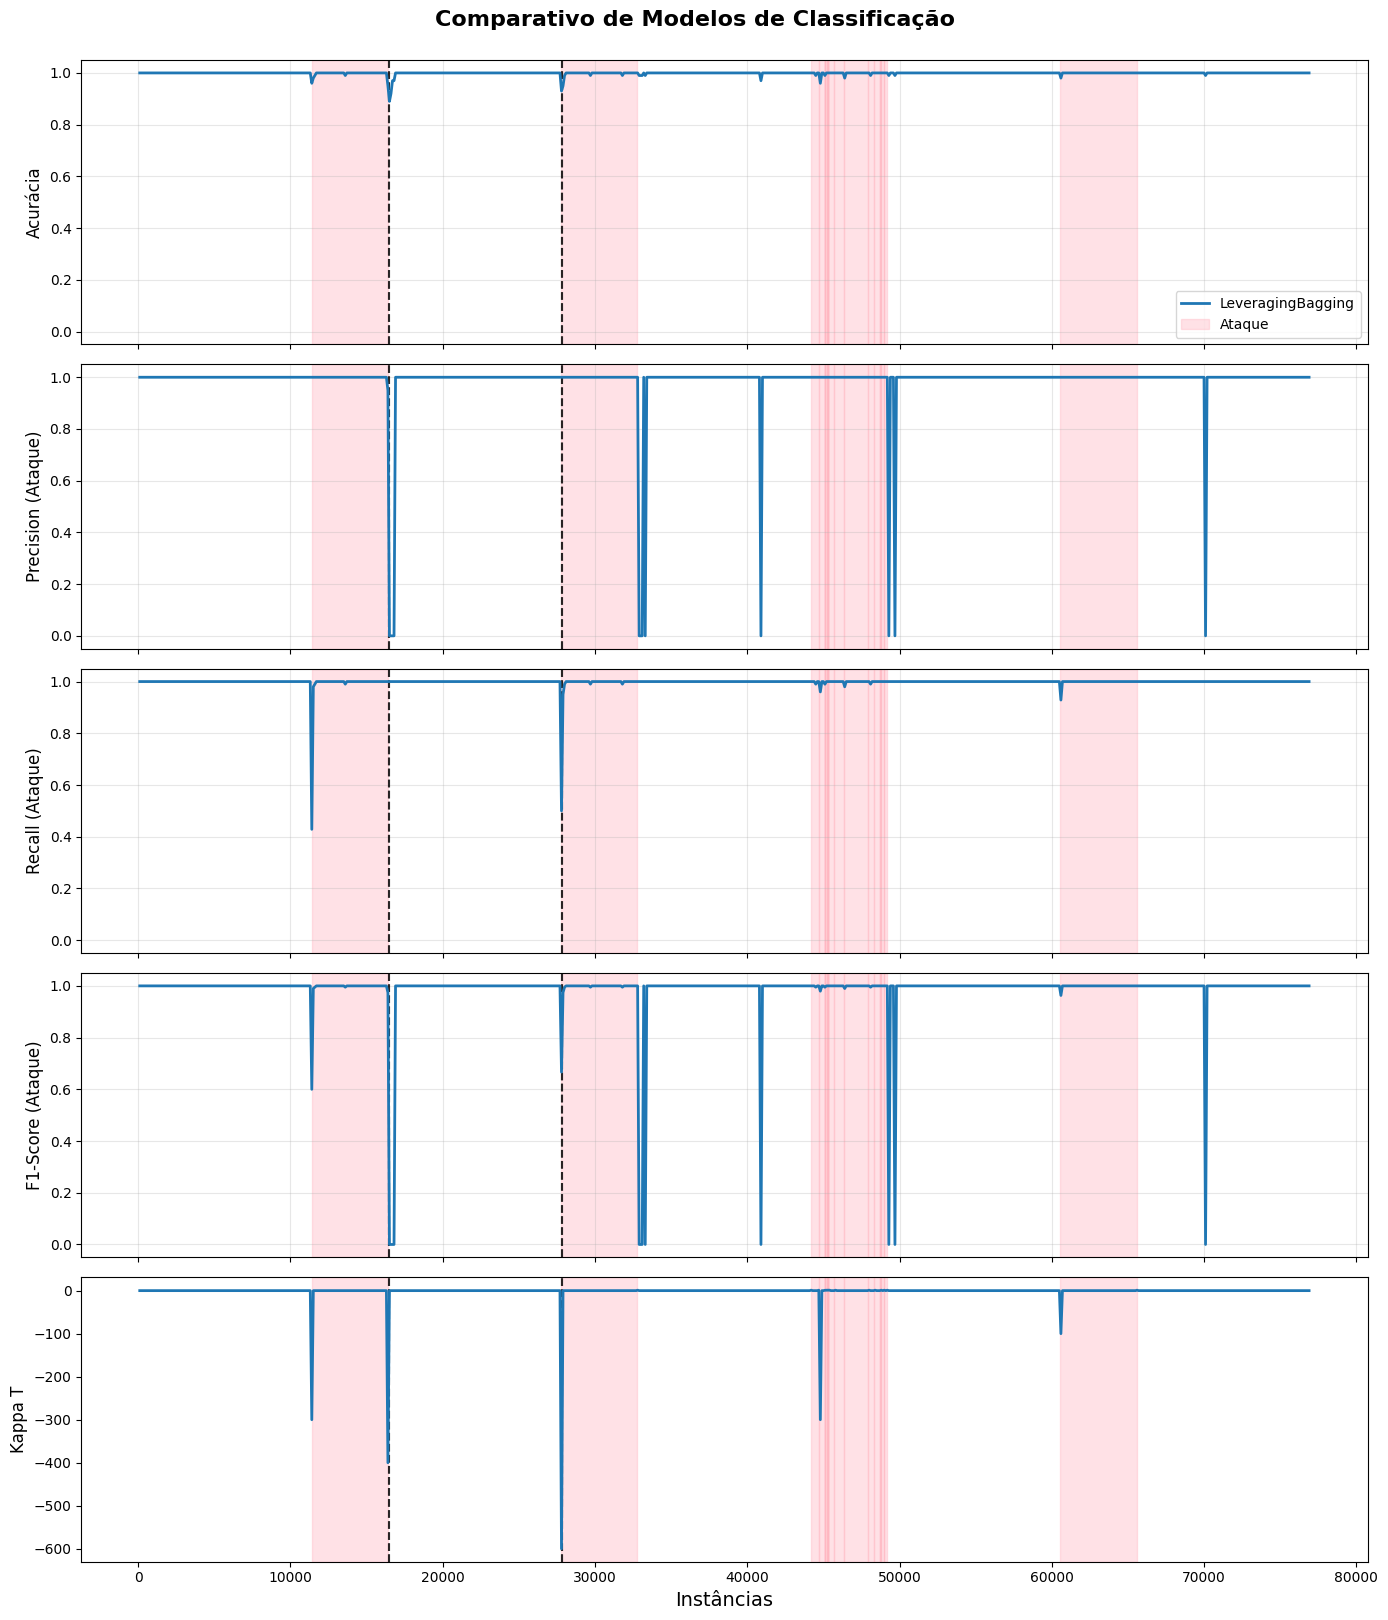

In [23]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['LB'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Hoeffding Adaptive Tree


                                    RELATÓRIO FINAL ACUMULATIVO                                     
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
HoeffdingAdaptiveTree     | 0.9982   | 0.9958   | 0.9972   | 0.9965   | -151.7857
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 76,965
  - Benign:  56,992 (74.05%)
  - Ataques: 19,973 (25.95%)
  - Razão Benign/Ataque: 2.85:1 



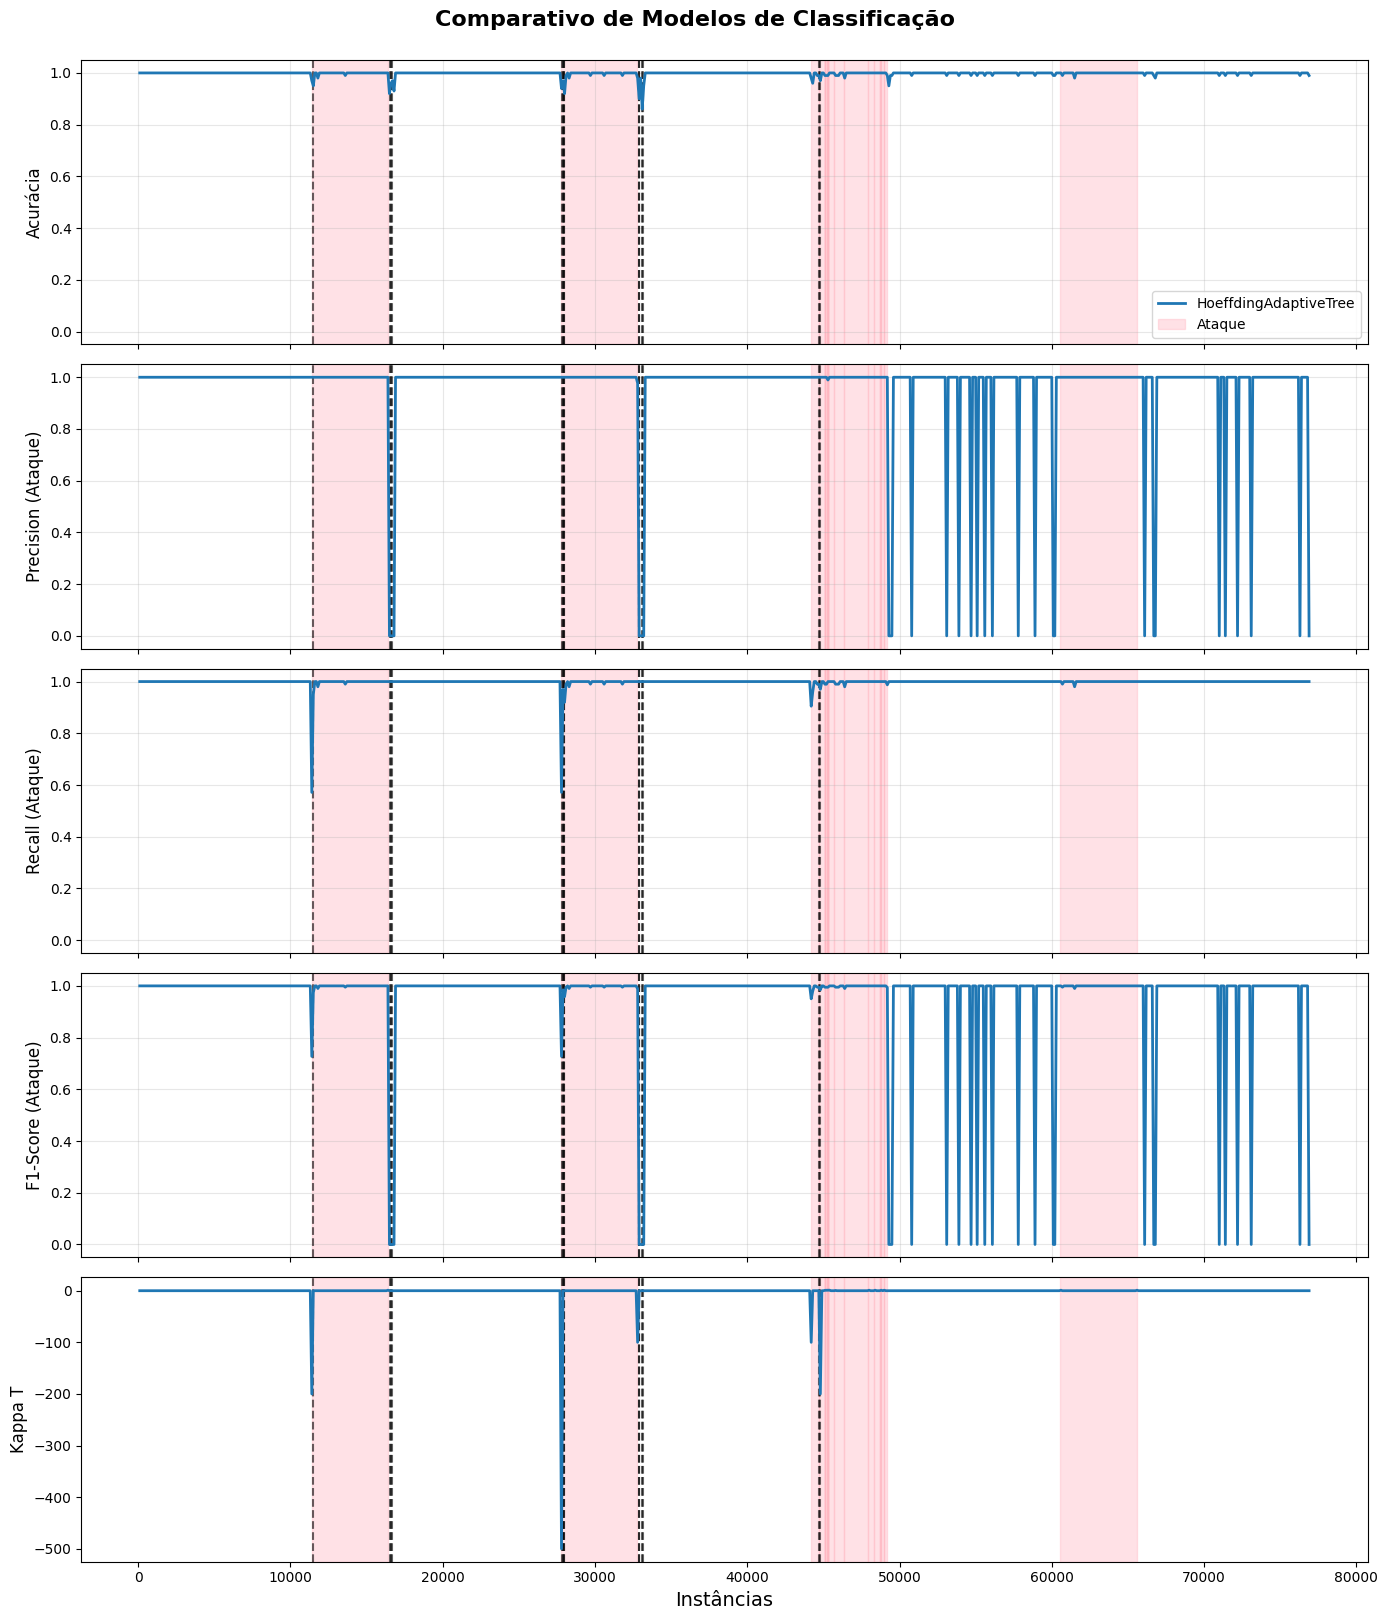

In [24]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['HAT'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Hoeffding Tree


                                    RELATÓRIO FINAL ACUMULATIVO                                     
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
HoeffdingTree             | 0.9988   | 0.9983   | 0.9970   | 0.9977   | -66.0714
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 76,965
  - Benign:  56,992 (74.05%)
  - Ataques: 19,973 (25.95%)
  - Razão Benign/Ataque: 2.85:1 



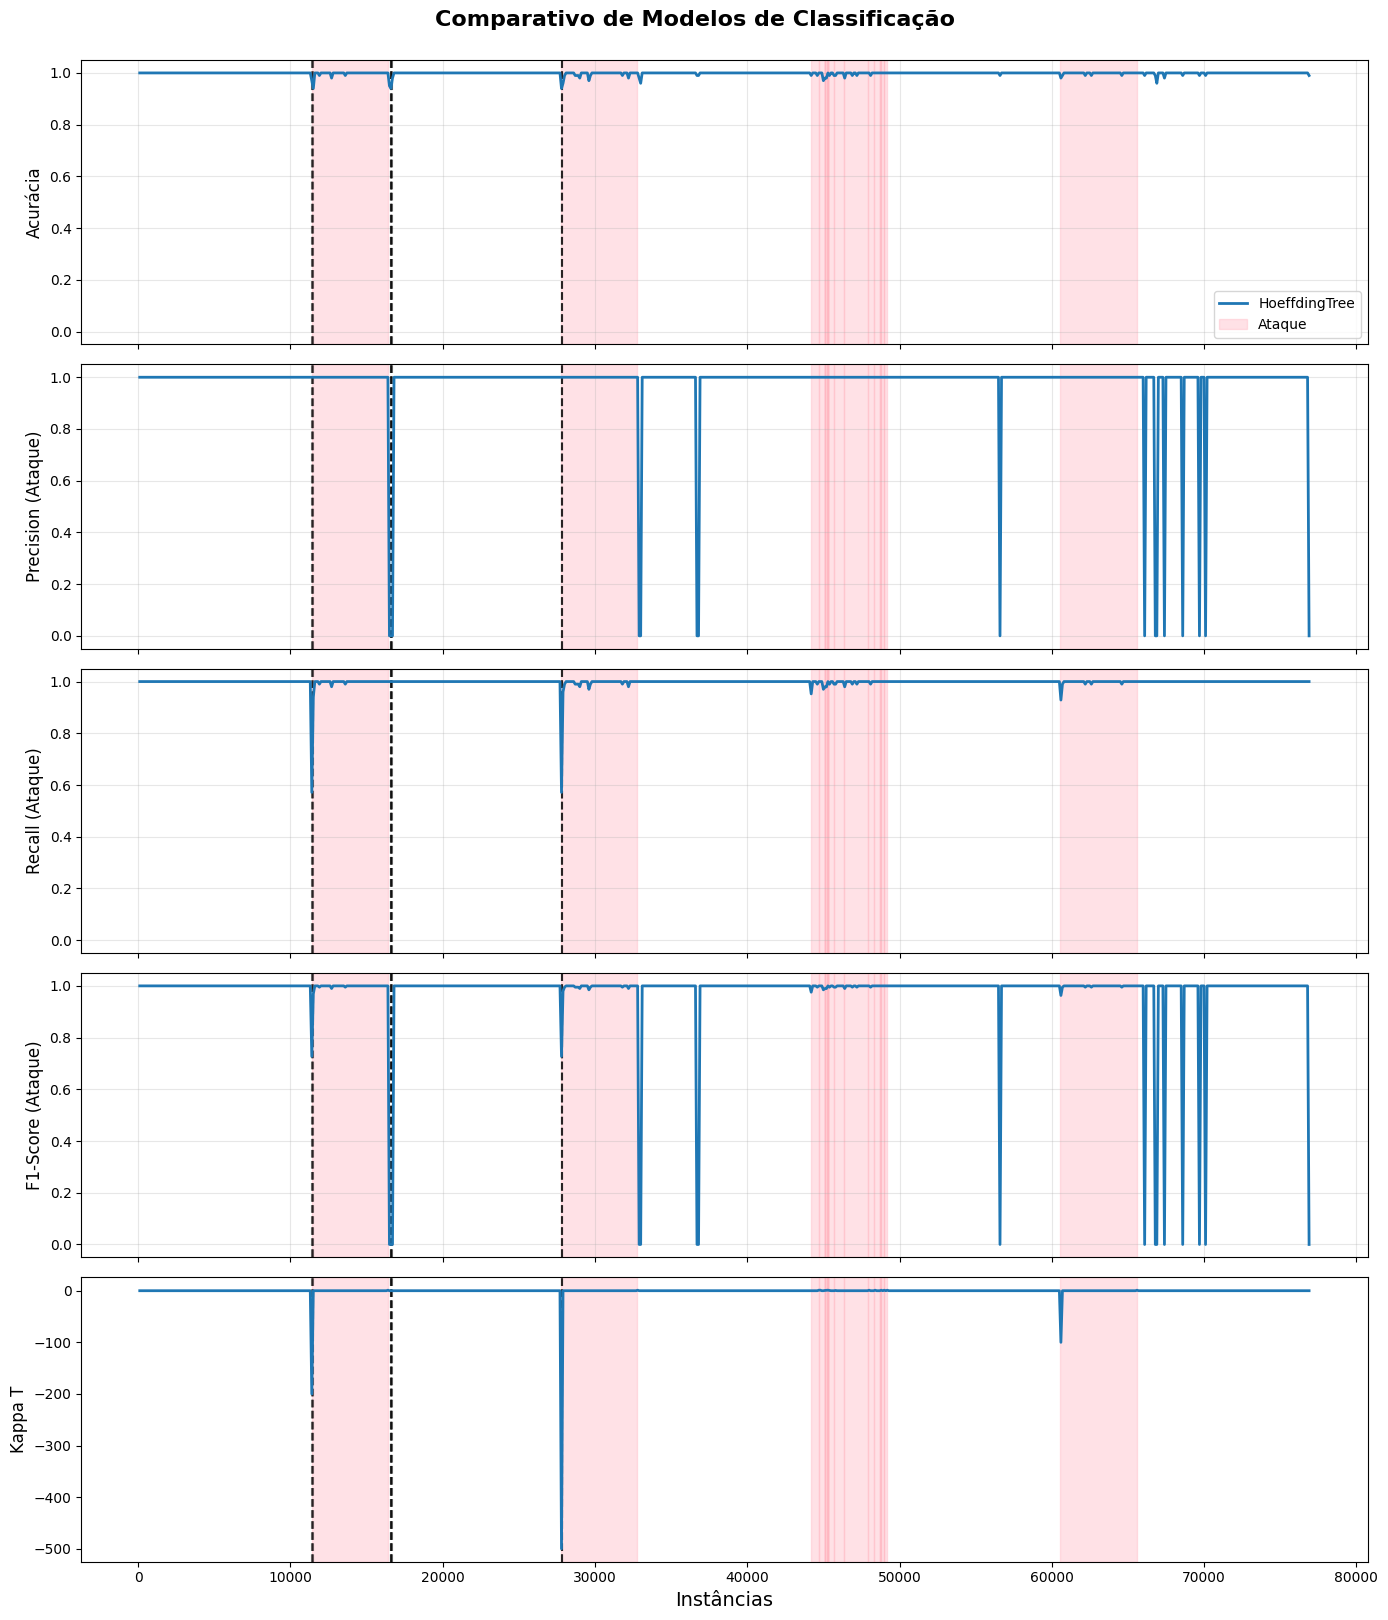

In [25]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['HT'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

### Cenário I

#### Inicialização

In [26]:
from py.ClassificationModels import get_classification_models
from py.ClassificationPipeline import ClassificationExperimentRunner
# from py.streams import newStream
from py.functions import criar_stream
import pandas as pd

INICIO = 0
FIM = 112965
TOTAL_AMOSTRAS = FIM - INICIO
MAX_INSTANCES = TOTAL_AMOSTRAS

df = pd.read_csv(
    'datasets/CICDDoS2019/data/01-12/Classification/CenarioI.csv',
)

# stream, target_names, feature_names = newStream(
#     df=df,
#     target_label_col='Label',  ## coluna de rótulo
#     binary_label=True, # transformar em binário (benigno vs ataque)
#     normalize_method="MinMaxScaler", # pode escoler entre "MinMaxScaler" (features entre 0 e 1), "StandardScaler", "RobustScaler" 
#     threshold_var=0.75, # variança de cada de coluna # os tres reduz a dimensionalidade do dataset (corta colunas com baixa variância, colunas altamente correlacionadas e seleciona as mais importantes)
#     threshold_corr=0.95, # semelhança entre as features
#     top_n_features=15, # random forest importance para selecionar as top n features mais importantes entre 15 e 20
#     stream=True
# ) # essa stream é um gerador que vai entregar os dados em tempo real, ou seja, ele vai entregar os dados em blocos, e a cada bloco ele vai atualizar o modelo e calcular as métricas de desempenho.

stream, target_names, feature_names = criar_stream(
    df=df,
    target_label_col='Label',
    binary_label=True,
    selected_features=None  # ou lista de features específicas
)

# Configurar Stream
schema = stream.get_schema()
# schema é o que vai entrar no modelo, ou seja, as colunas do dataset que vão ser usadas para treinar o modelo. Ele é criado a partir do DataFrame original, mas com as colunas selecionadas e normalizadas.


FileNotFoundError: [Errno 2] No such file or directory: 'datasets/CICDDoS2019/data/01-12/Classification/CenarioI.csv'

#### Adaptive Random Forest


                                    RELATÓRIO FINAL ACUMULATIVO                                     
NOTA: Precision, Recall e F1-Score são calculados para CLASSE ATAQUE (Binary, pos_label=1)
      zero_division=1.0: Em janelas sem ataques e sem erros, métrica = 1.0 (perfeito)
      Kappa T: Kappa Temporal - concordância ponderada por tempo (apenas Kappa T ativo)
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
AdaptiveRandomForest      | 0.9989   | 0.9956   | 0.9969   | 0.9962   | 0.8239
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  61,189 (85.03%)
  - Ataques: 10,776 (14.97%)
  - Razão Benign/Ataque: 5.68:1 



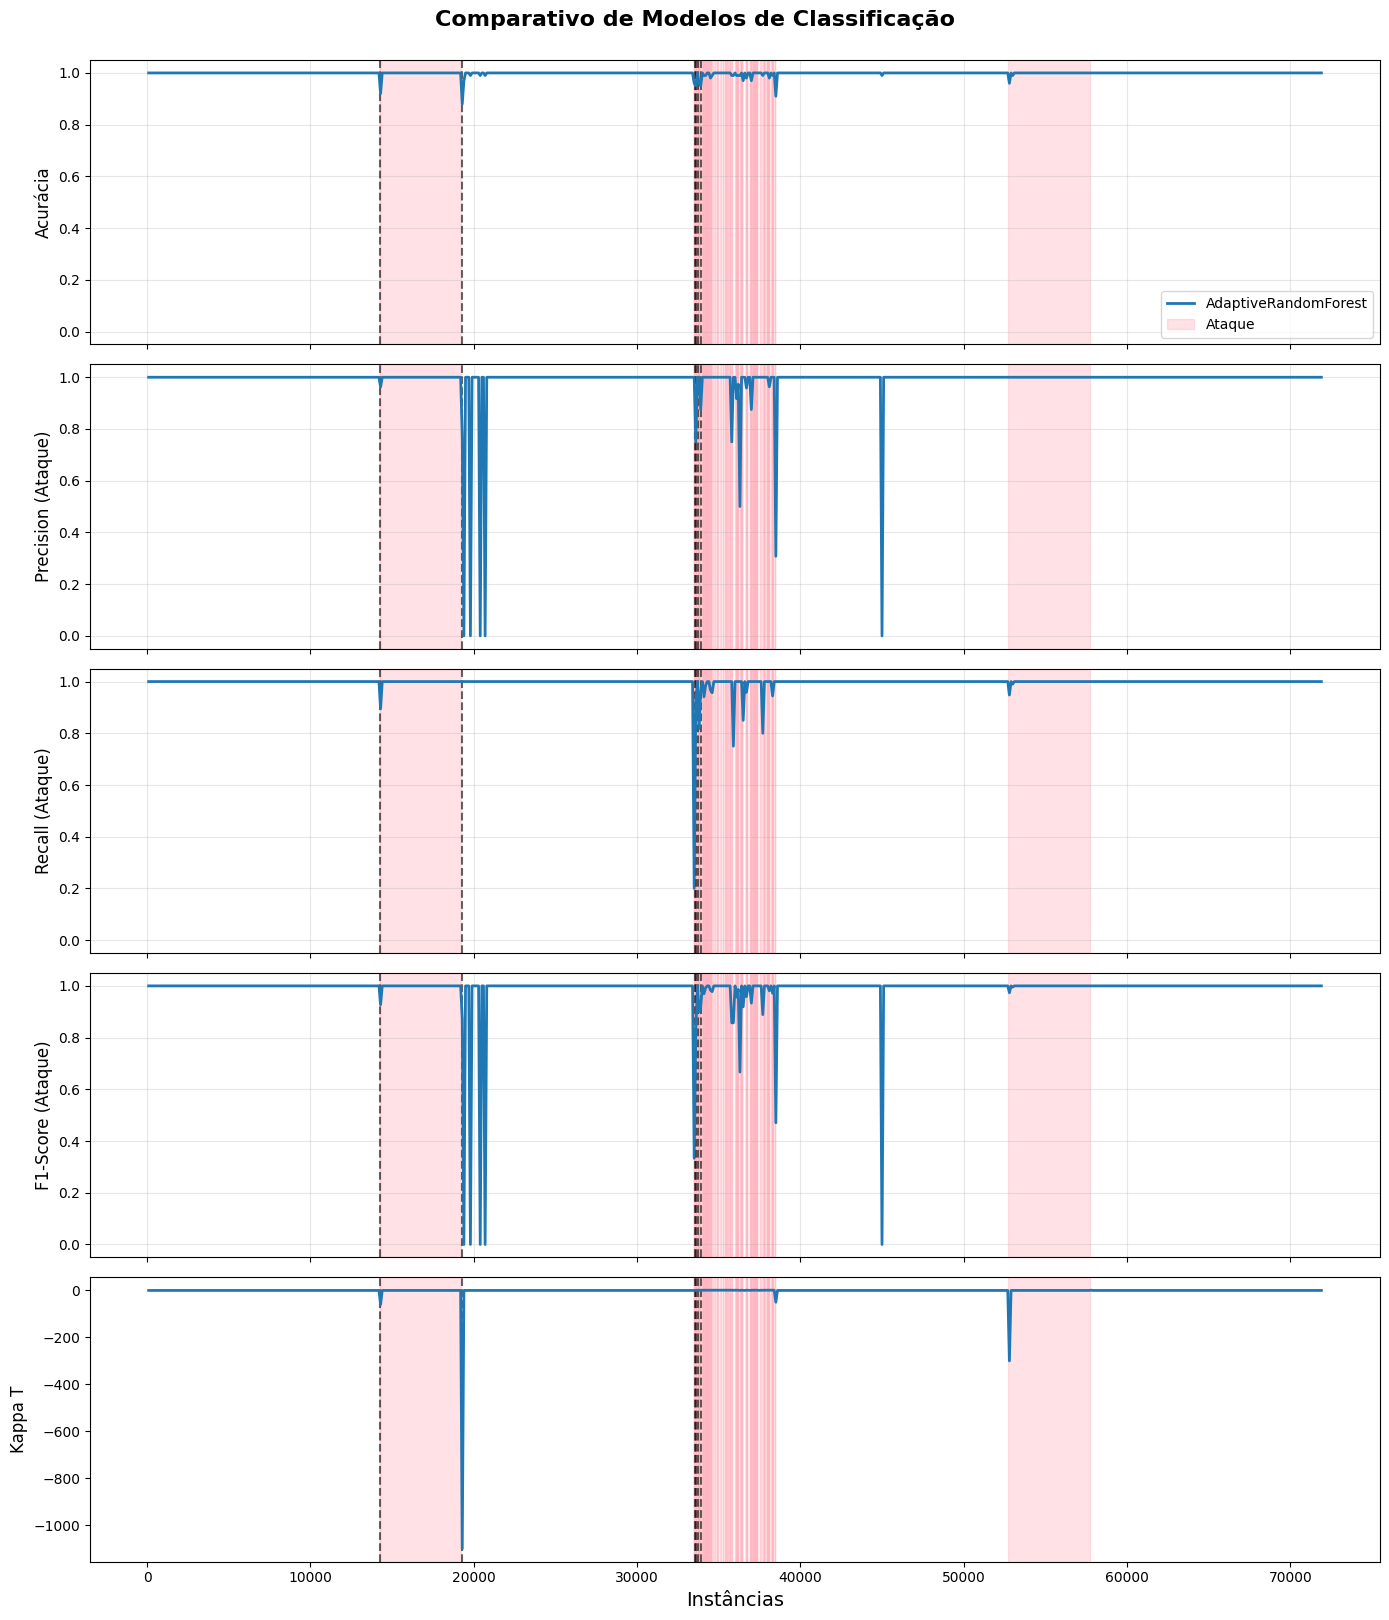

In [ ]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['ARF'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Leveraging Bagging


                                    RELATÓRIO FINAL ACUMULATIVO                                     
NOTA: Precision, Recall e F1-Score são calculados para CLASSE ATAQUE (Binary, pos_label=1)
      zero_division=1.0: Em janelas sem ataques e sem erros, métrica = 1.0 (perfeito)
      Kappa T: Kappa Temporal - concordância ponderada por tempo (apenas Kappa T ativo)
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
LeveragingBagging         | 0.9979   | 0.9907   | 0.9954   | 0.9930   | 0.6717
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  61,189 (85.03%)
  - Ataques: 10,776 (14.97%)
  - Razão Benign/Ataque: 5.68:1 



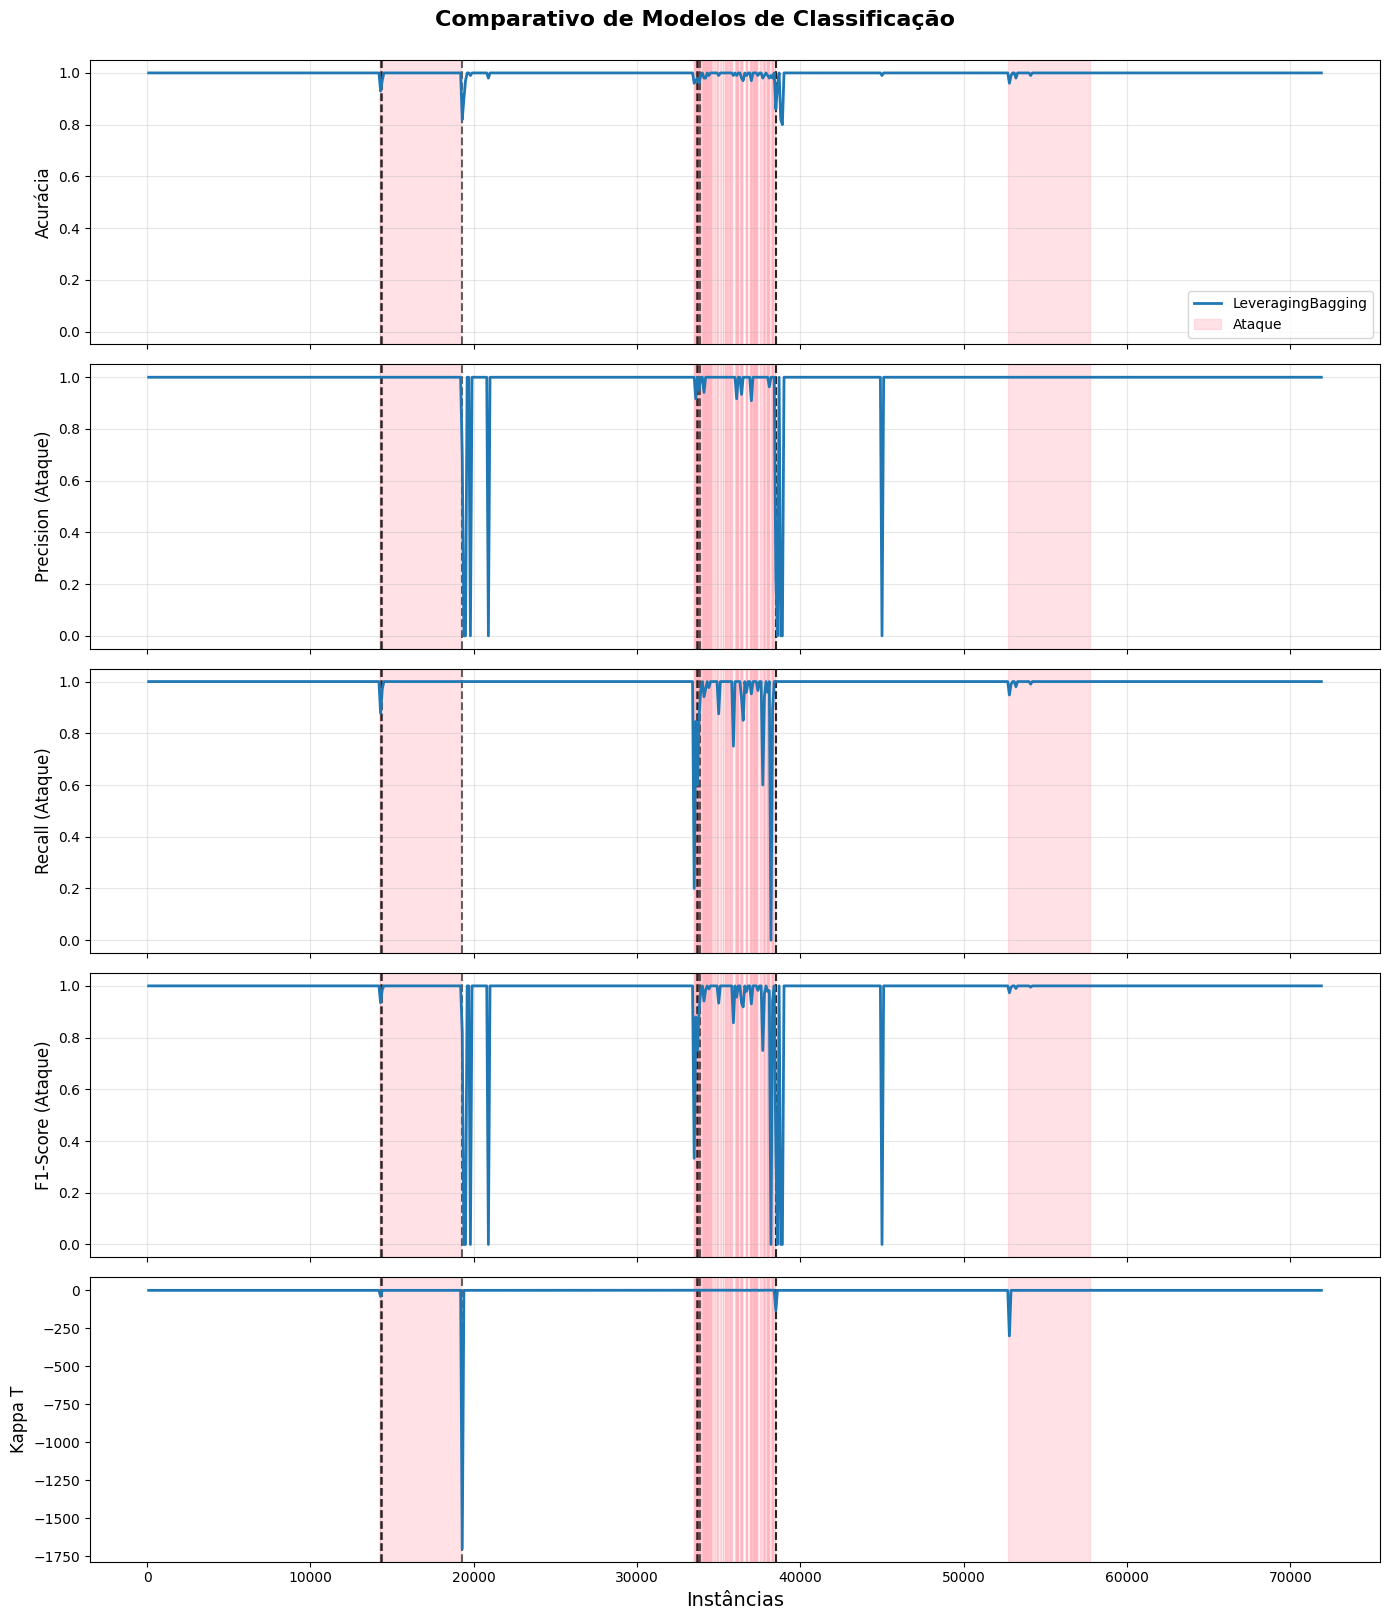

In [ ]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['LB'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Hoeffding Adaptive Tree


                                    RELATÓRIO FINAL ACUMULATIVO                                     
NOTA: Precision, Recall e F1-Score são calculados para CLASSE ATAQUE (Binary, pos_label=1)
      zero_division=1.0: Em janelas sem ataques e sem erros, métrica = 1.0 (perfeito)
      Kappa T: Kappa Temporal - concordância ponderada por tempo (apenas Kappa T ativo)
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
HoeffdingAdaptiveTree     | 0.9945   | 0.9813   | 0.9818   | 0.9815   | 0.1348
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  61,189 (85.03%)
  - Ataques: 10,776 (14.97%)
  - Razão Benign/Ataque: 5.68:1 



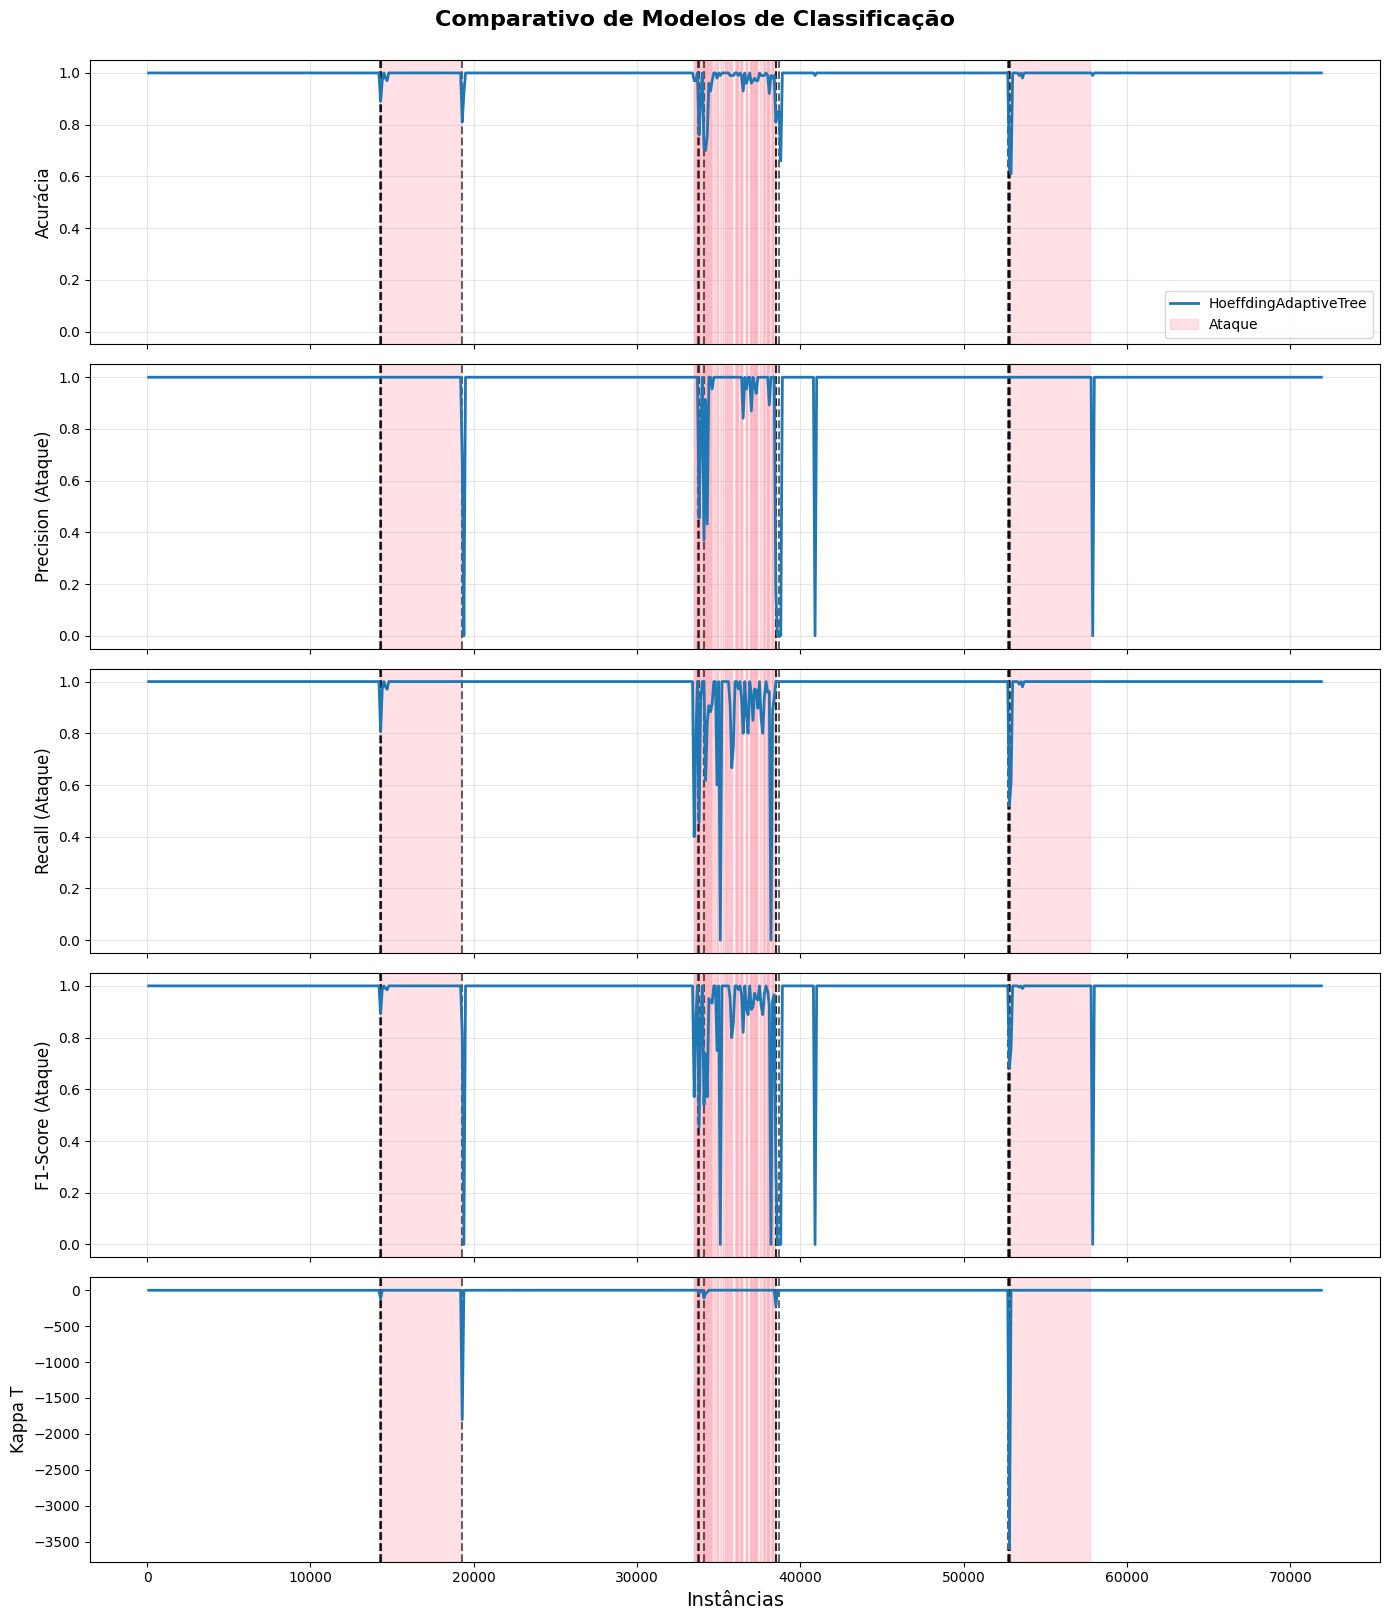

In [ ]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['HAT'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Hoeffding Tree


                                    RELATÓRIO FINAL ACUMULATIVO                                     
NOTA: Precision, Recall e F1-Score são calculados para CLASSE ATAQUE (Binary, pos_label=1)
      zero_division=1.0: Em janelas sem ataques e sem erros, métrica = 1.0 (perfeito)
      Kappa T: Kappa Temporal - concordância ponderada por tempo (apenas Kappa T ativo)
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
HoeffdingTree             | 0.9943   | 0.9784   | 0.9835   | 0.9809   | 0.1043
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  61,189 (85.03%)
  - Ataques: 10,776 (14.97%)
  - Razão Benign/Ataque: 5.68:1 



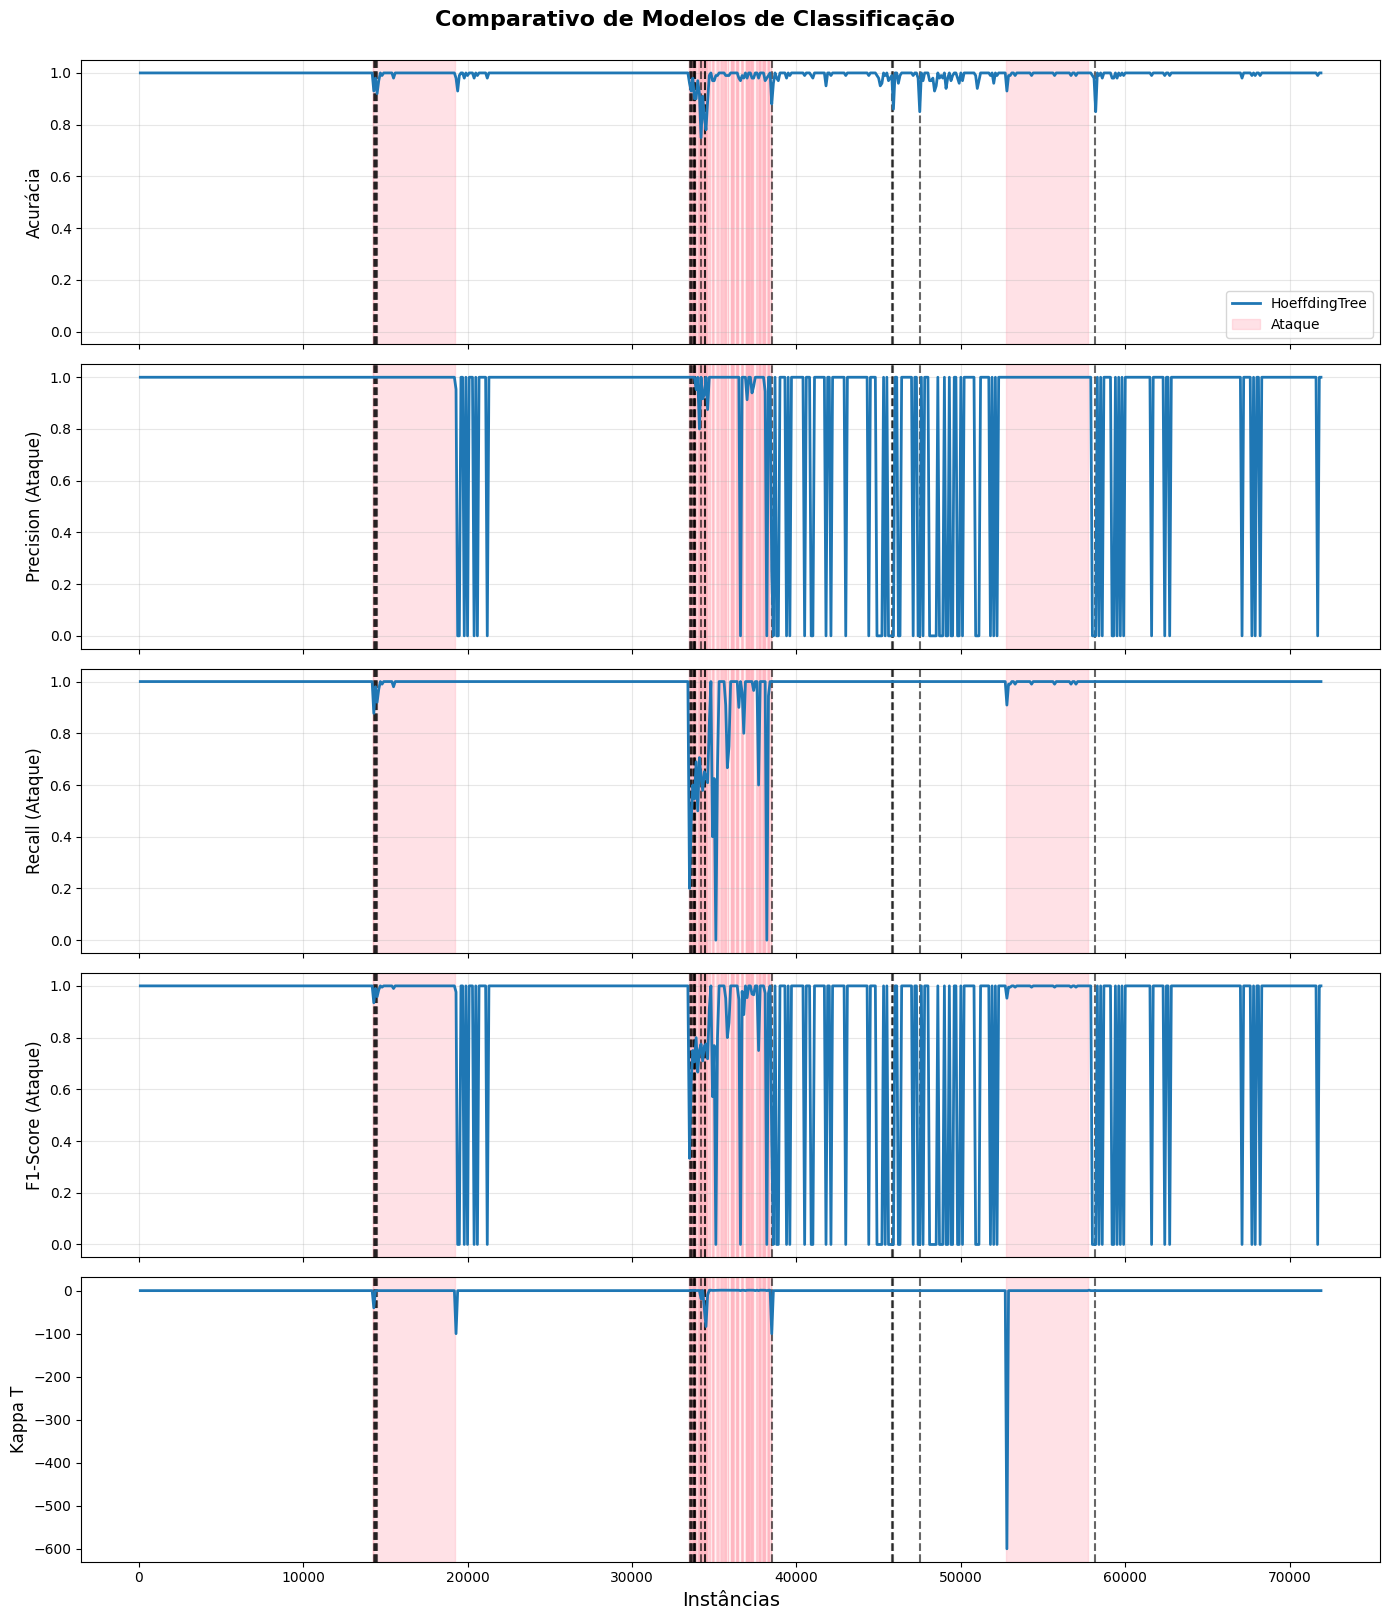

In [ ]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['HT'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

## Cenário de Heterogeneidade 2

- Ataques: Múltiplos ataques de grupos de similaridade distinto.
    - Sequência de 6 ataques e uma recorrência do primeiro ataque no fim.
- Objetivo: Analizar como os modelos respondem a muitas mudanças de conceito, e, após essas mudanças, a recorrência.

### Cenário J

#### Inicialização

In [ ]:
from py.ClassificationModels import get_classification_models
from py.ClassificationPipeline import ClassificationExperimentRunner
# from py.streams import newStream
from py.functions import criar_stream
import pandas as pd

INICIO = 0
FIM = 112965
TOTAL_AMOSTRAS = FIM - INICIO
MAX_INSTANCES = TOTAL_AMOSTRAS

df = pd.read_csv(
    'datasets/CICDDoS2019/data/01-12/Classification/CenarioJ.csv',
)

# stream, target_names, feature_names = newStream(
#     df=df,
#     target_label_col='Label',  ## coluna de rótulo
#     binary_label=True, # transformar em binário (benigno vs ataque)
#     normalize_method="MinMaxScaler", # pode escoler entre "MinMaxScaler" (features entre 0 e 1), "StandardScaler", "RobustScaler" 
#     threshold_var=0.75, # variança de cada de coluna # os tres reduz a dimensionalidade do dataset (corta colunas com baixa variância, colunas altamente correlacionadas e seleciona as mais importantes)
#     threshold_corr=0.95, # semelhança entre as features
#     top_n_features=15, # random forest importance para selecionar as top n features mais importantes entre 15 e 20
#     stream=True
# ) # essa stream é um gerador que vai entregar os dados em tempo real, ou seja, ele vai entregar os dados em blocos, e a cada bloco ele vai atualizar o modelo e calcular as métricas de desempenho.

stream, target_names, feature_names = criar_stream(
    df=df,
    target_label_col='Label',
    binary_label=True,
    selected_features=None  # ou lista de features específicas
)

# Configurar Stream
schema = stream.get_schema()
# schema é o que vai entrar no modelo, ou seja, as colunas do dataset que vão ser usadas para treinar o modelo. Ele é criado a partir do DataFrame original, mas com as colunas selecionadas e normalizadas.


#### Adaptive Random Forest


                                    RELATÓRIO FINAL ACUMULATIVO                                     
NOTA: Precision, Recall e F1-Score são calculados para CLASSE ATAQUE (Binary, pos_label=1)
      zero_division=1.0: Em janelas sem ataques e sem erros, métrica = 1.0 (perfeito)
      Kappa T: Kappa Temporal - concordância ponderada por tempo (apenas Kappa T ativo)
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
AdaptiveRandomForest      | 0.9989   | 0.9956   | 0.9969   | 0.9962   | 0.8239
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  61,189 (85.03%)
  - Ataques: 10,776 (14.97%)
  - Razão Benign/Ataque: 5.68:1 



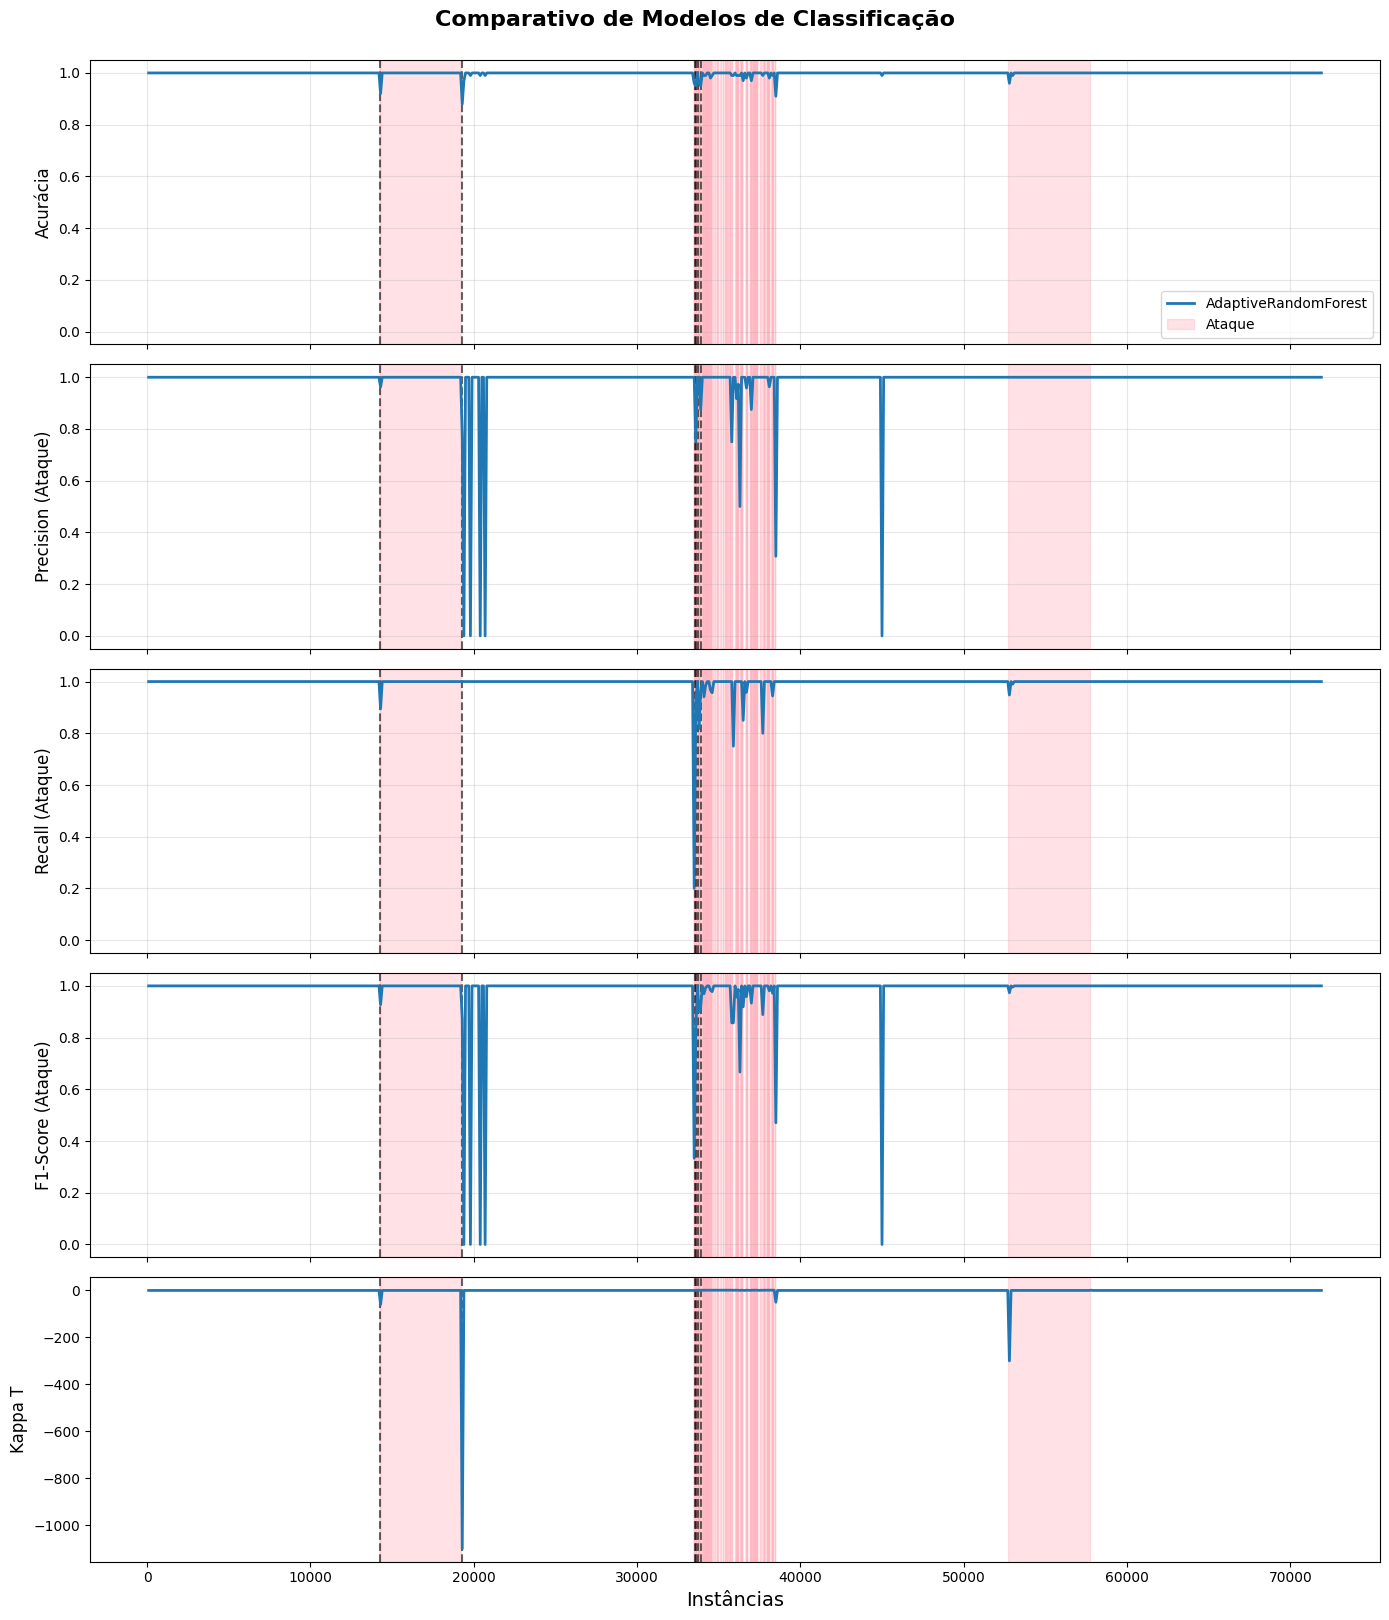

In [ ]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['ARF'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Leveraging Bagging


                                    RELATÓRIO FINAL ACUMULATIVO                                     
NOTA: Precision, Recall e F1-Score são calculados para CLASSE ATAQUE (Binary, pos_label=1)
      zero_division=1.0: Em janelas sem ataques e sem erros, métrica = 1.0 (perfeito)
      Kappa T: Kappa Temporal - concordância ponderada por tempo (apenas Kappa T ativo)
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
LeveragingBagging         | 0.9979   | 0.9907   | 0.9954   | 0.9930   | 0.6717
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  61,189 (85.03%)
  - Ataques: 10,776 (14.97%)
  - Razão Benign/Ataque: 5.68:1 



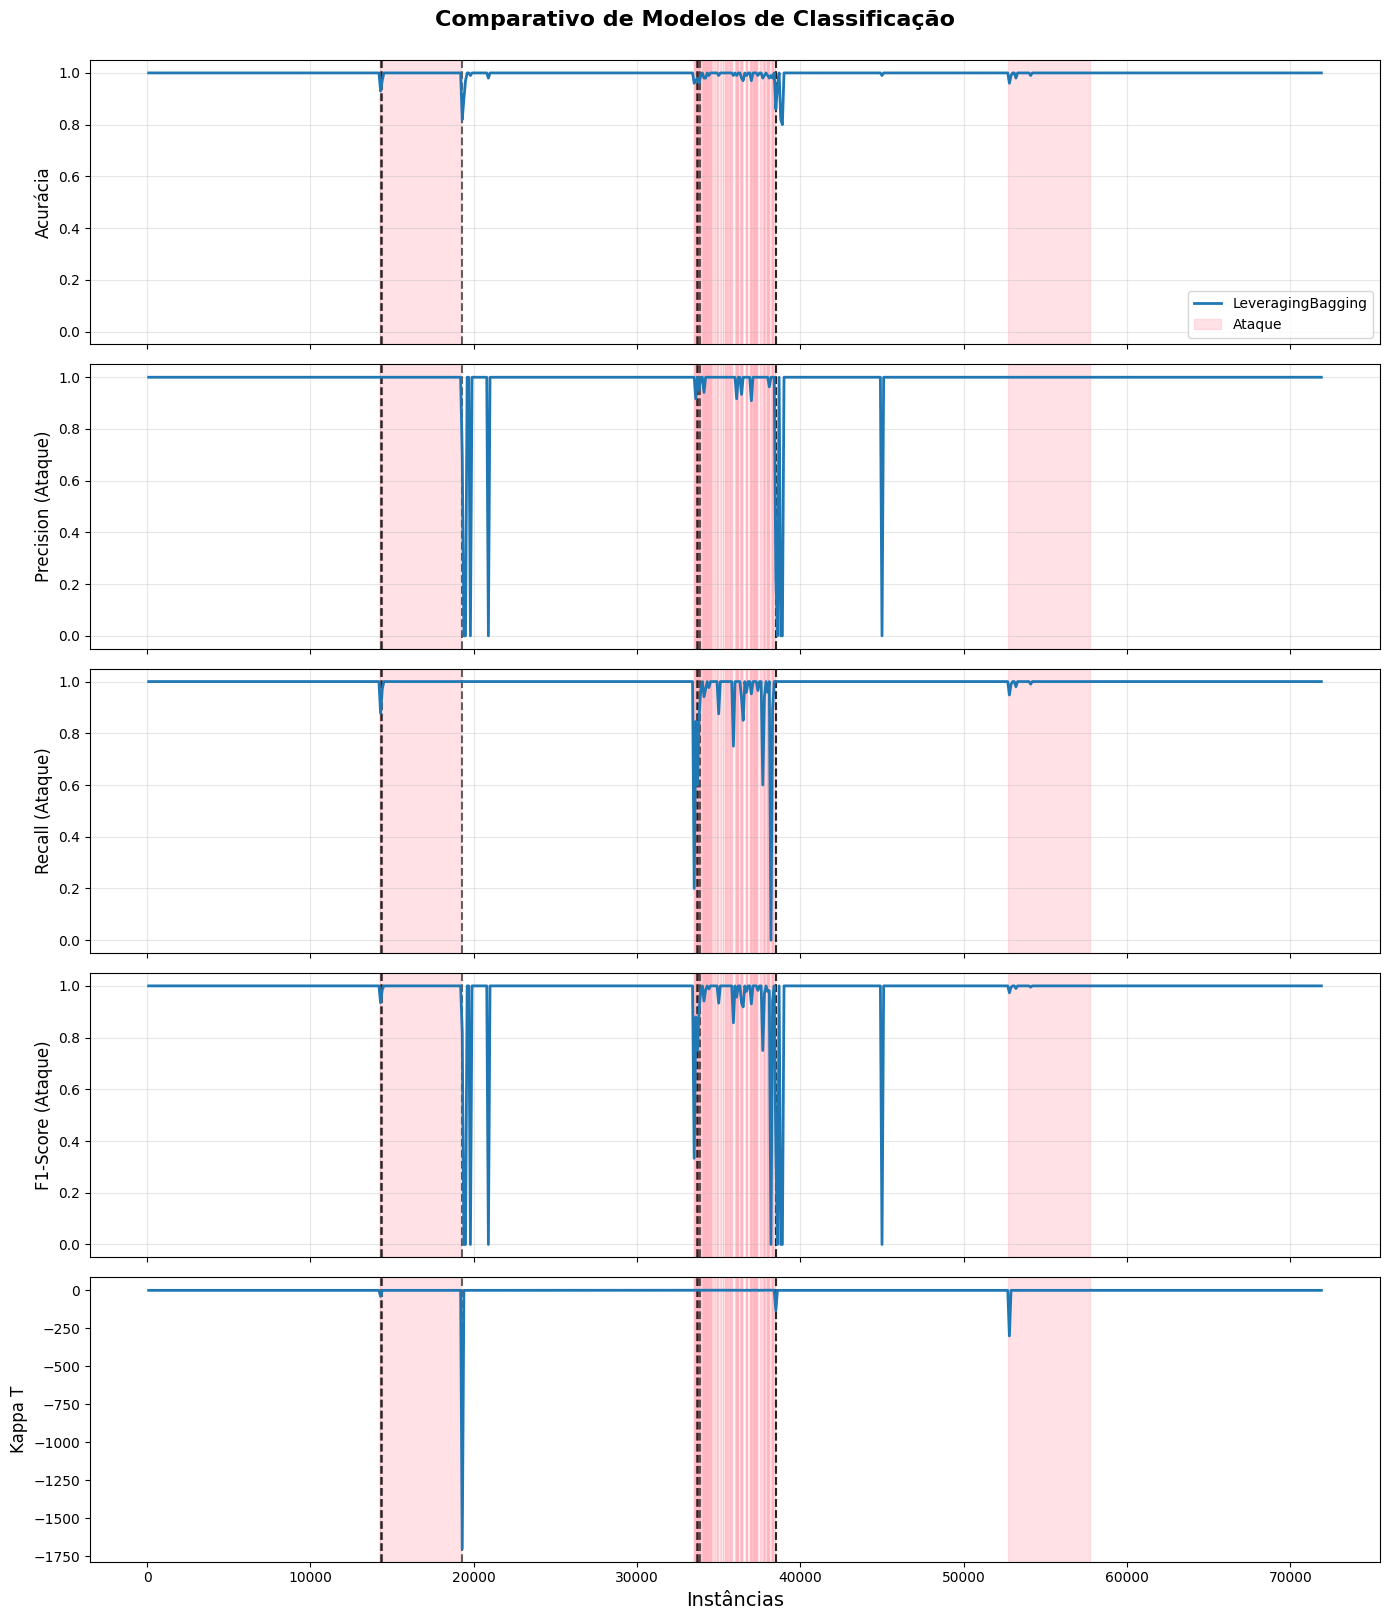

In [ ]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['LB'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Hoeffding Adaptive Tree


                                    RELATÓRIO FINAL ACUMULATIVO                                     
NOTA: Precision, Recall e F1-Score são calculados para CLASSE ATAQUE (Binary, pos_label=1)
      zero_division=1.0: Em janelas sem ataques e sem erros, métrica = 1.0 (perfeito)
      Kappa T: Kappa Temporal - concordância ponderada por tempo (apenas Kappa T ativo)
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
HoeffdingAdaptiveTree     | 0.9945   | 0.9813   | 0.9818   | 0.9815   | 0.1348
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  61,189 (85.03%)
  - Ataques: 10,776 (14.97%)
  - Razão Benign/Ataque: 5.68:1 



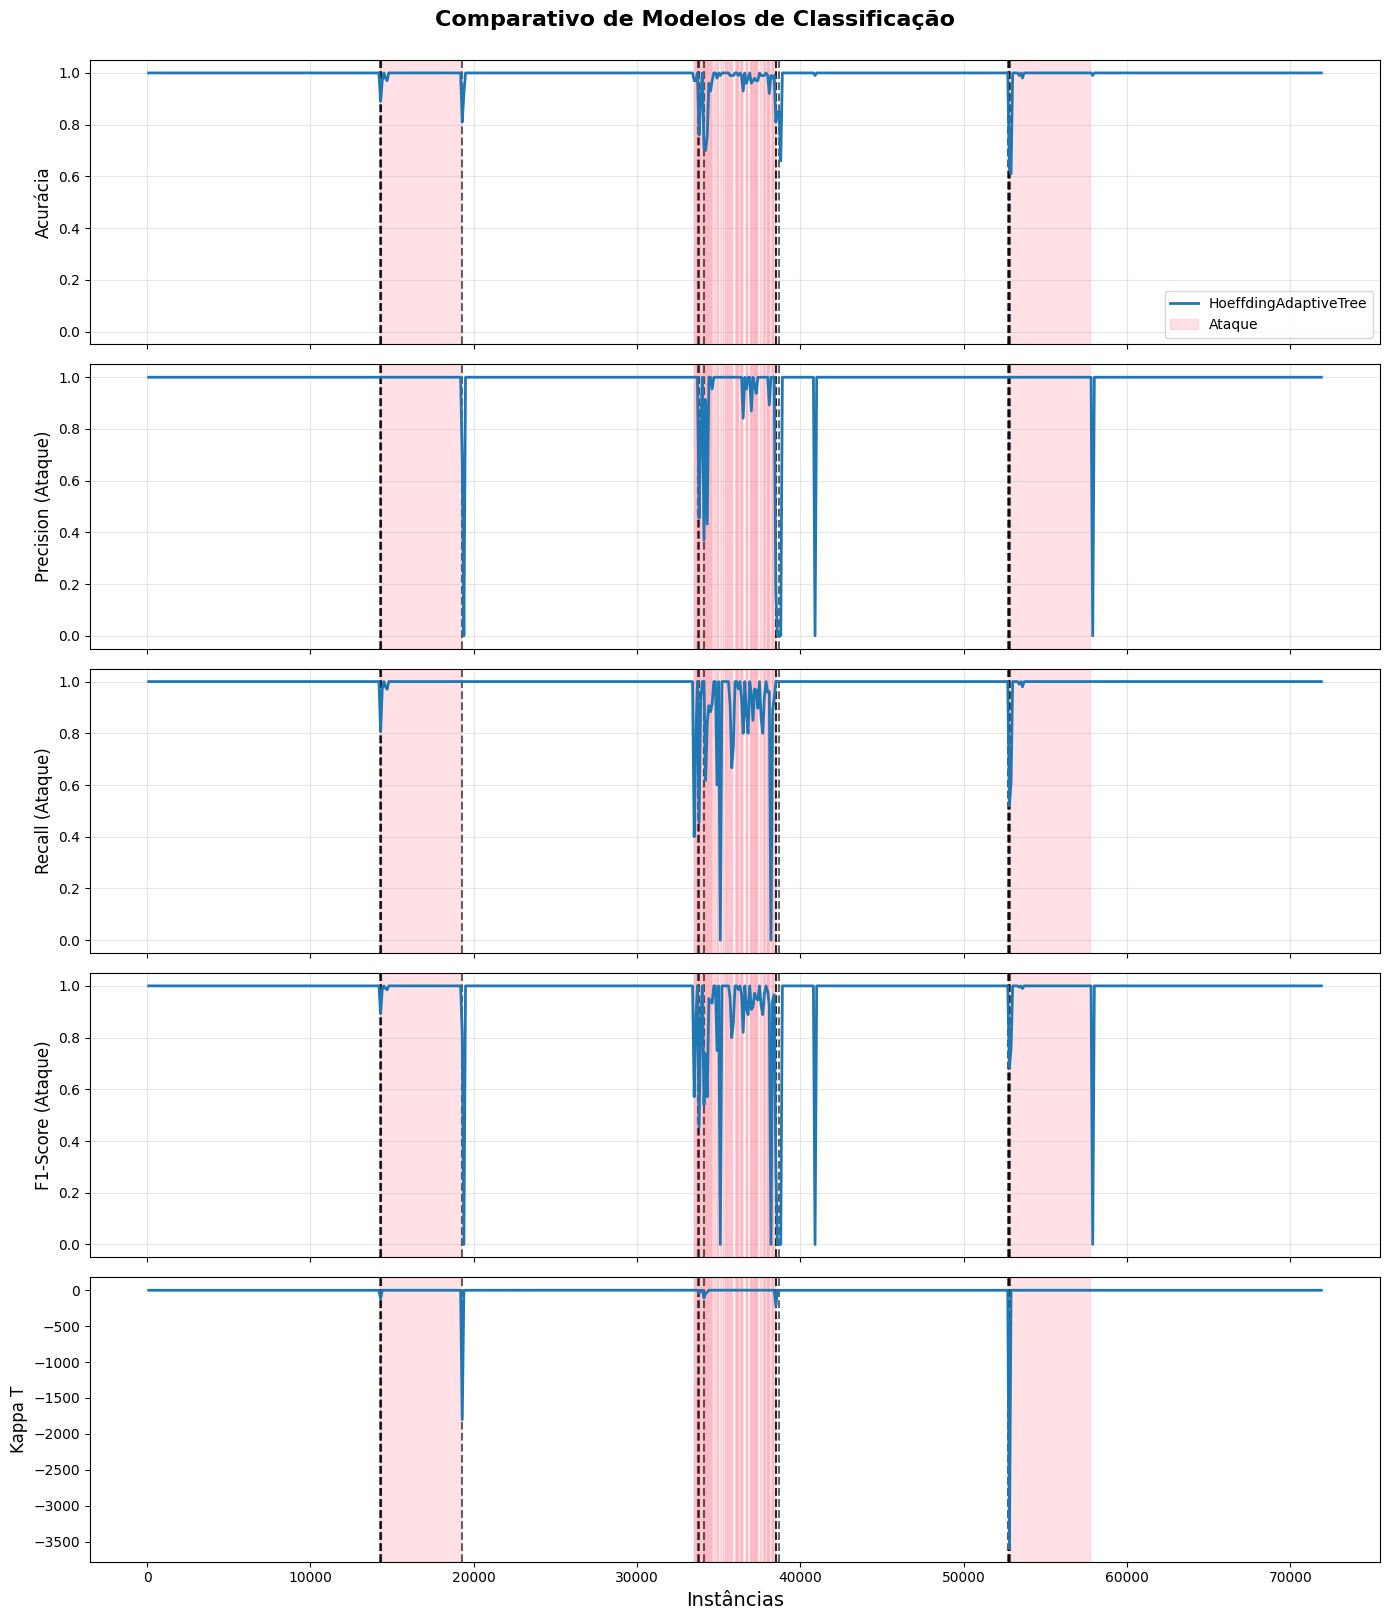

In [ ]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['HAT'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

#### Hoeffding Tree


                                    RELATÓRIO FINAL ACUMULATIVO                                     
NOTA: Precision, Recall e F1-Score são calculados para CLASSE ATAQUE (Binary, pos_label=1)
      zero_division=1.0: Em janelas sem ataques e sem erros, métrica = 1.0 (perfeito)
      Kappa T: Kappa Temporal - concordância ponderada por tempo (apenas Kappa T ativo)
Modelo                    | Acc      | Prec     | Recall   | F1       | KapT    
----------------------------------------------------------------------------------------------------
HoeffdingTree             | 0.9943   | 0.9784   | 0.9835   | 0.9809   | 0.1043
                                      ESTATÍSTICAS DO DATASET                                       
Total de instâncias: 71,965
  - Benign:  61,189 (85.03%)
  - Ataques: 10,776 (14.97%)
  - Razão Benign/Ataque: 5.68:1 



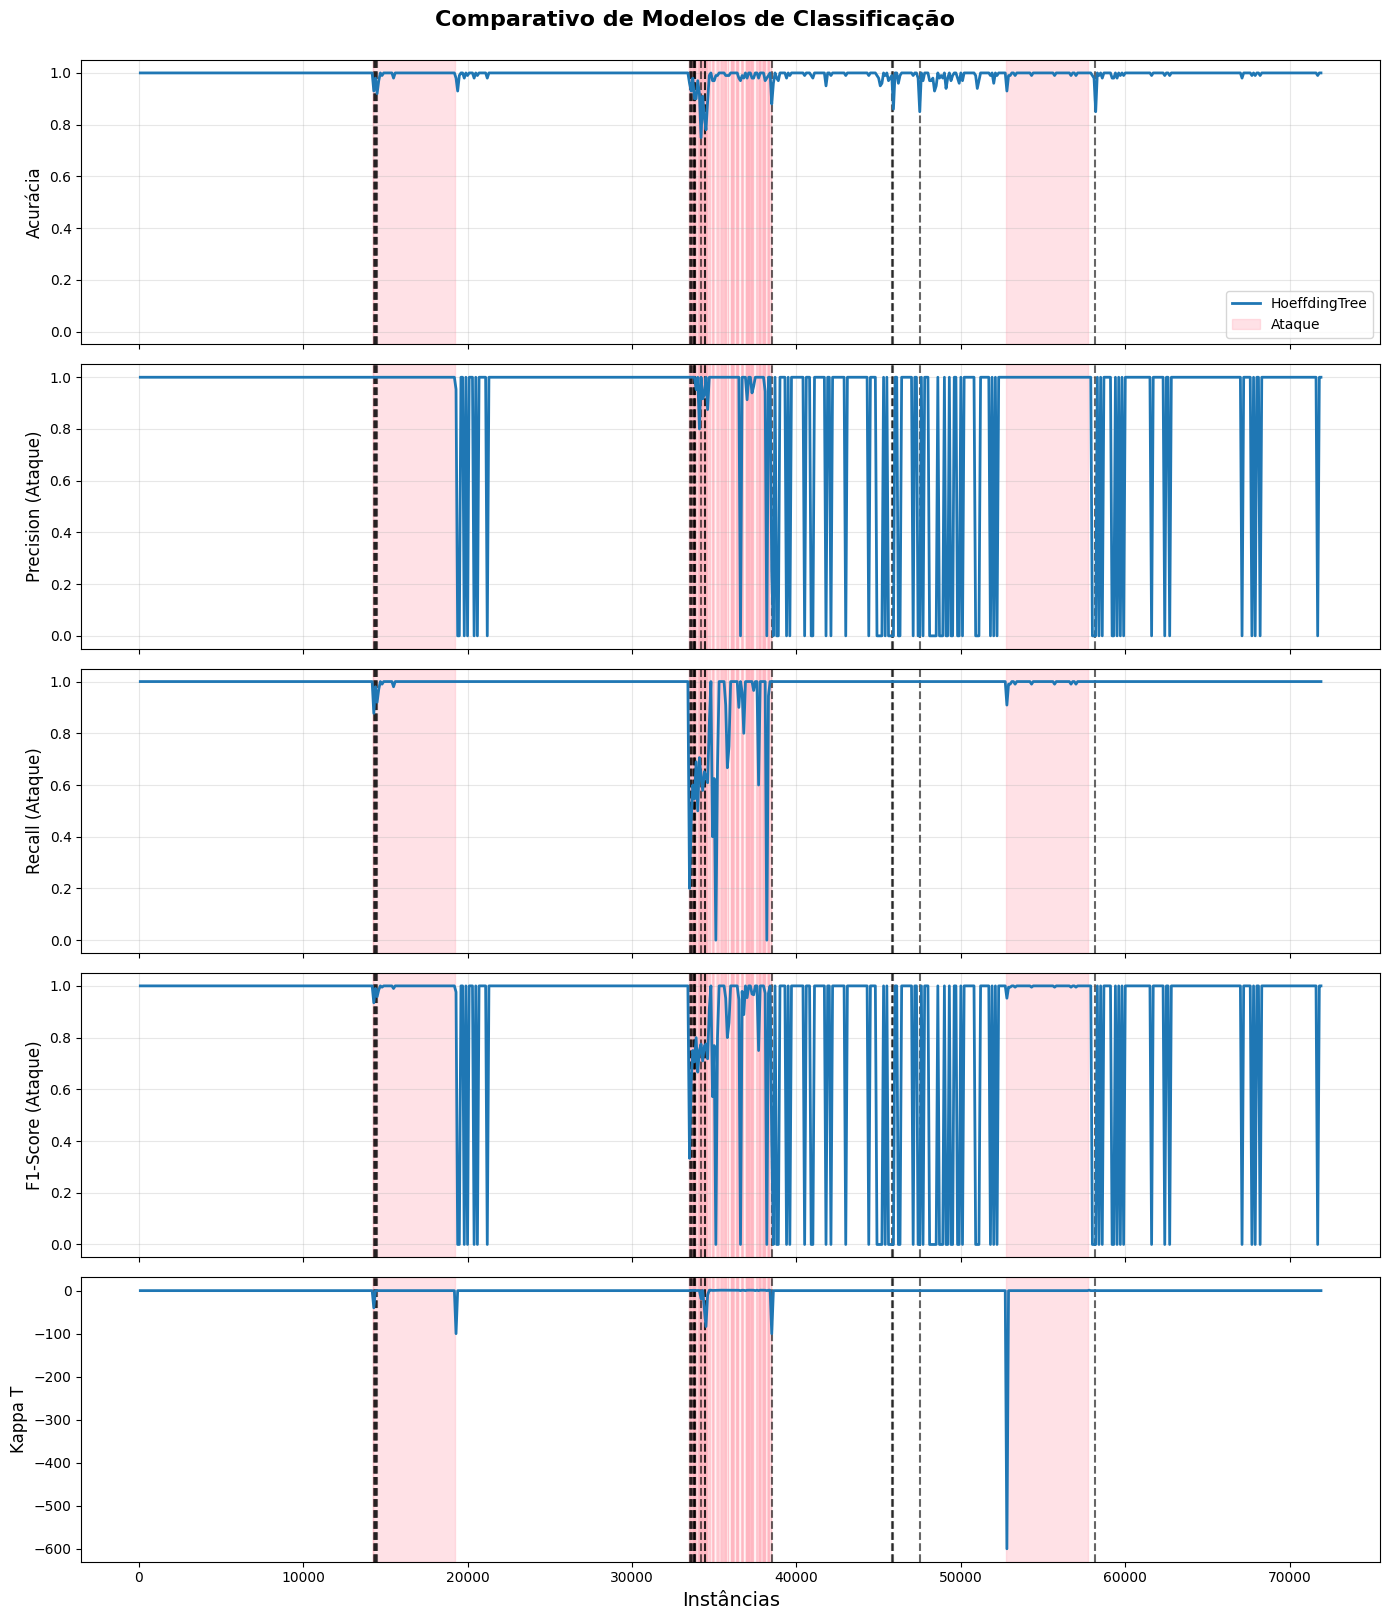

In [ ]:
# Obter modelos
modelos = get_classification_models(schema, selected_models=['HT'], ht_params={}) # seleciona os modelos e os parametros que eu quero.
# quando eu quiser mexer nos parametros do modelo, eu altero nesse get_classification_models

# Instanciar e Executar
runner = ClassificationExperimentRunner()

resultados = runner.pipeline(
    stream=stream,
    models=modelos,
    window_size=100,
    logging=False,
    title="Comparativo de Modelos de Classificação"
)

##

Limpeza: Removendo espaços, identificadores (Flow ID, Timestamp, Umma,ed: 0) e colunas vazias...
Pré-processamento: Convertendo infinitos e preenchendo valores nulos...
Target: Processando coluna 'Label' como Binário (0=Normal, 1=Attack)...
Seleção de Features: Iniciando pipeline de redução de dimensionalidade...

--- Iniciando Processo de Seleção de Features (Total: 81) ---
Variância: 20 features removidas. Restantes: 61
Correlação (>0.95): 22 features redundantes removidas. Restantes: 39
Random Forest: Pular.
Features Finais (39) - ['Source Port', 'Destination Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd

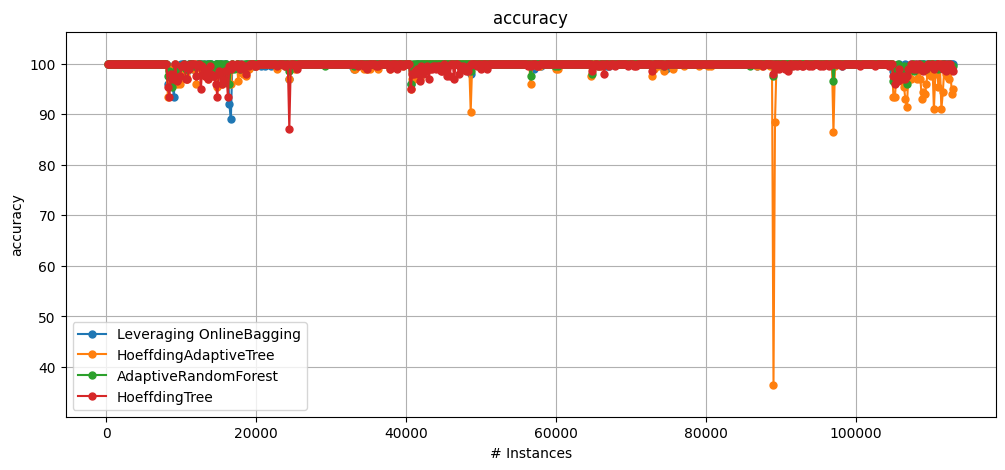

In [5]:
from capymoa.evaluation import prequential_evaluation_multiple_learners
from capymoa.evaluation.visualization import plot_windowed_results
from py.ClassificationModels import get_classification_models
from py.streams import newStream
import pandas as pd

INICIO = 0
FIM = 112965
TOTAL_AMOSTRAS = FIM - INICIO
MAX_INSTANCES = TOTAL_AMOSTRAS

df = pd.read_csv(
    'datasets/CICDDoS2019/data/Multiplos_Ataques.csv',
    skiprows=range(1, INICIO), 
    nrows=TOTAL_AMOSTRAS
)

stream, target_names, feature_names = newStream(
    df=df,
    target_label_col='Label',
    binary_label=True,
    normalize_method="MinMaxScaler",
    threshold_var=0.75,
    threshold_corr=0.95,
    top_n_features=None,
    stream=True
)

# Configurar Stream
schema = stream.get_schema()

# Obter modelos
modelos = get_classification_models(schema, selected_models=['LB', 'HAT', 'ARF', 'HT'])

# Executar avaliação prequential
results = prequential_evaluation_multiple_learners(stream, modelos, window_size=200, max_instances=len(df))

# Exibir resultados
if 'LeveragingBagging' in results:
    print(f"LB accuracy = {results['LeveragingBagging'].cumulative.accuracy()}")

if 'HoeffdingAdaptiveTree' in results:
    print(f"HAT accuracy = {results['HoeffdingAdaptiveTree'].cumulative.accuracy()}")

if 'AdaptiveRandomForest' in results:
    print(f"ARF accuracy = {results['AdaptiveRandomForest'].cumulative.accuracy()}")

if 'HoeffdingTree' in results:
    print(f"HT accuracy = {results['HoeffdingTree'].cumulative.accuracy()}")

plot_windowed_results(*results.values(), metric="accuracy", save_only=False)